In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
lap_data = pd.read_csv('../data/races_2024/lap_2024.csv')

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2043927525.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_data = pd.read_csv('../data/races_2024/lap_2024.csv')


In [3]:
lap_data_clean = lap_data[lap_data['IsAccurate']]

In [4]:
tire_colors = {
    "MEDIUM":"#e4d43d",
    "INTERMEDIATE":"#84dc84",
    "HARD": "#A9A9A9", #"#edede6",
    "WET":"#9ec5d4",
    "SOFT":"#c42d4d"
}

team_colors = {
    'Ferrari': '#DC0000', 
    'RB': '#1634cb', 
    'Red Bull Racing': '#fcd700',
    'McLaren': '#FF8700', 
    'Alpine': '#fe86bc', 
    'Haas F1 Team': '#B6BABD', 
    'Kick Sauber': '#00e701', 
    'Mercedes': '#00d2be', 
    'Williams': '#00a0dd', 
    'Aston Martin': '#006F62'
}

driver_colors = {
    'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 
    'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 
    'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 
    'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 
    'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 
    'IWA': '#1e6176', 'MAG': '#ffff6f', 'HUL': '#cacaca', 'BEA': '#c40000', 
    'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 
    'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 
    'OSU': '#1b3d97', 'COL': '#639aff'
}


# EDA
## Total Number of Pit Stops

In [5]:
lap_data_pit_stops = lap_data.dropna(subset=['PitInTime'])

# Group by driver and team, and count the number of pit stops
pit_stop_summary = lap_data_pit_stops.groupby(['Driver', 'Team']).size().reset_index(name='TotalPitStops')
race_counts = lap_data.groupby('Driver')['EventName'].nunique().reset_index(name='RacesParticipated')

normalized_pit_stops = pd.merge(pit_stop_summary, race_counts, on='Driver')

normalized_pit_stops['PitStopsPerRace'] = normalized_pit_stops['TotalPitStops'] / normalized_pit_stops['RacesParticipated']

normalized_pit_stops.sort_values(by='PitStopsPerRace', inplace=True)

In [6]:
normalized_pit_stops

Driver             Team  TotalPitStops  RacesParticipated  PitStopsPerRace
2     BEA          Ferrari              1                  1         1.000000
13    RIC               RB             23                 15         1.533333
18    TSU               RB             25                 15         1.666667
9     NOR          McLaren             26                 15         1.733333
4     GAS           Alpine             27                 15         1.800000
8     MAG     Haas F1 Team             27                 15         1.800000
19    VER  Red Bull Racing             27                 15         1.800000
12    PIA          McLaren             27                 15         1.800000
15    SAI          Ferrari             26                 14         1.857143
10    OCO           Alpine             28                 15         1.866667
3     BOT      Kick Sauber             28                 15         1.866667
5     HAM         Mercedes             28                 15         1.866667
6     HUL     Haas F1 Team             28                 15         1.866667
14    RUS         Mercedes             28                 15         1.866667
16    SAR         Williams             27                 14         1.928571
0     ALB         Williams             29                 15         1.933333
7     LEC          Ferrari             29                 15         1.933333
1     ALO     Aston Martin             29                 15         1.933333
17    STR     Aston Martin             30                 15         2.000000
11    PER  Red Bull Racing             31                 15         2.066667
20    ZHO      Kick Sauber             32                 15         2.133333

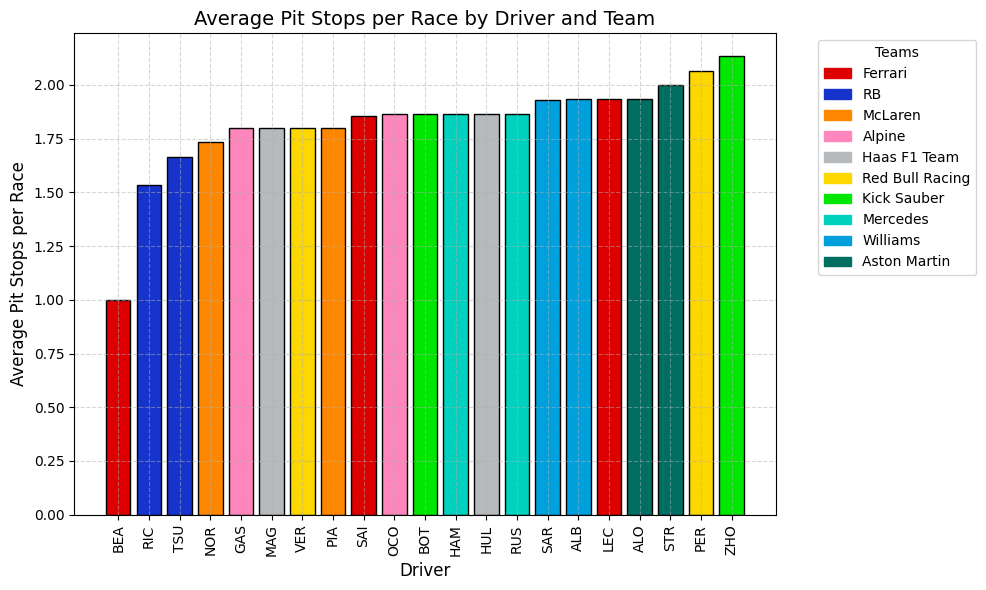

In [7]:
normalized_pit_stops['Color'] = normalized_pit_stops['Team'].map(team_colors)

# Plotting
plt.figure(figsize=(10, 6))

bars = plt.bar(normalized_pit_stops['Driver'], normalized_pit_stops['PitStopsPerRace'], color=normalized_pit_stops['Color'], edgecolor='black')

teams_unique = normalized_pit_stops['Team'].unique()
handles = [plt.Rectangle((0,0),1,1, color=team_colors[team]) for team in teams_unique]
plt.legend(handles, teams_unique, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Average Pit Stops per Race by Driver and Team', fontsize=14)
plt.xlabel('Driver', fontsize=12)
plt.ylabel('Average Pit Stops per Race', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [8]:
heatmap_data = lap_data_pit_stops.groupby(['Team', 'EventName']).size().unstack(fill_value=0)
heatmap_data

EventName        Australian Grand Prix  Austrian Grand Prix   
Team                                                          
Alpine                               5                    4  \
Aston Martin                         4                    5   
Ferrari                              4                    6   
Haas F1 Team                         4                    4   
Kick Sauber                          4                    4   
McLaren                              4                    5   
Mercedes                             3                    4   
RB                                   4                    4   
Red Bull Racing                      3                    5   
Williams                             2                    5   

EventName        Bahrain Grand Prix  Belgian Grand Prix  British Grand Prix   
Team                                                                          
Alpine                            5                   4                   4  \
Aston Martin                      4                   2                   4   
Ferrari                           4                   4                   6   
Haas F1 Team                      5                   3                   4   
Kick Sauber                       4                   3                   6   
McLaren                           4                   4                   4   
Mercedes                          4                   3                   4   
RB                                4                   3                   4   
Red Bull Racing                   4                   5                   6   
Williams                          5                   4                   4   

EventName        Canadian Grand Prix  Chinese Grand Prix  Dutch Grand Prix   
Team                                                                         
Alpine                             3                   5                 2  \
Aston Martin                       4                   7                 2   
Ferrari                            7                   2                 2   
Haas F1 Team                       7                   4                 2   
Kick Sauber                        4                   4                 4   
McLaren                            4                   3                 2   
Mercedes                           6                   4                 4   
RB                                 3                   4                 3   
Red Bull Racing                    5                   4                 2   
Williams                           2                   4                 3   

EventName        Emilia Romagna Grand Prix  Hungarian Grand Prix   
Team                                                               
Alpine                                   3                     5  \
Aston Martin                             4                     4   
Ferrari                                  2                     4   
Haas F1 Team                             2                     4   
Kick Sauber                              2                     4   
McLaren                                  2                     4   
Mercedes                                 3                     4   
RB                                       2                     3   
Red Bull Racing                          2                     4   
Williams                                 6                     5   

EventName        Japanese Grand Prix  Miami Grand Prix  Monaco Grand Prix   
Team                                                                        
Alpine                             6                 2                  1  \
Aston Martin                       7                 3                  4   
Ferrari                            5                 2                  2   
Haas F1 Team                       5                 5                  0   
Kick Sauber                        7                 3                  4   
M

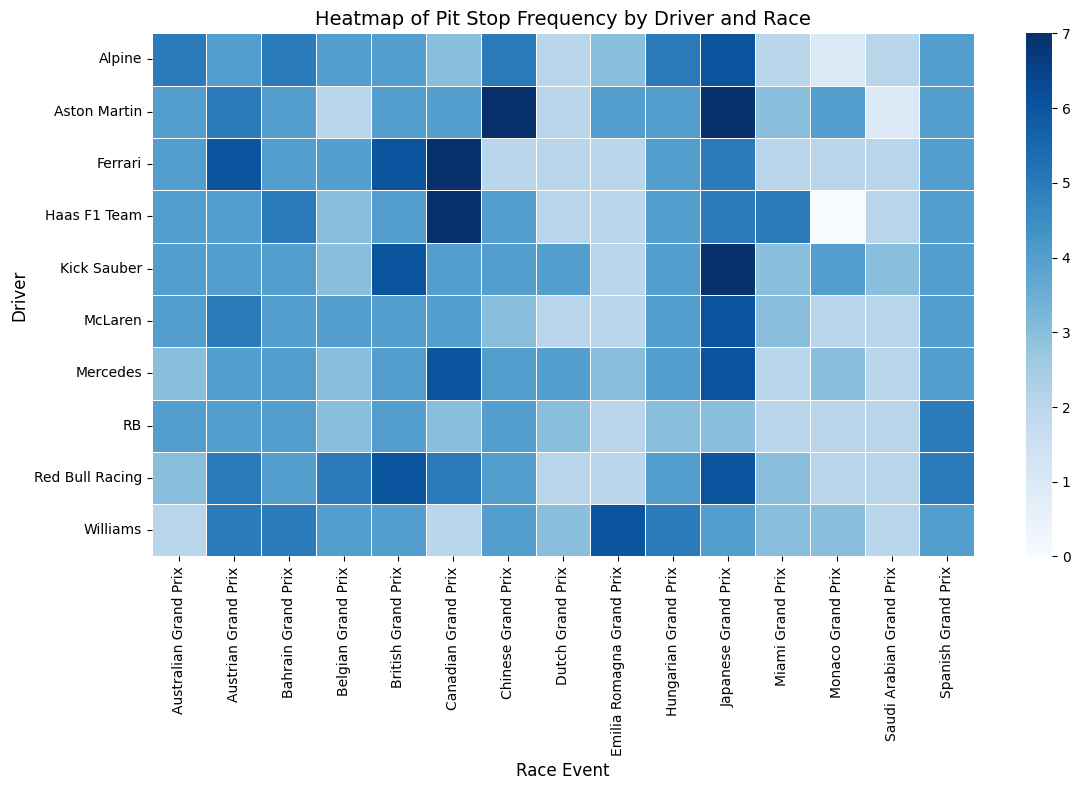

In [9]:
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, annot=False)

plt.title('Heatmap of Pit Stop Frequency by Driver and Race', fontsize=14)
plt.xlabel('Race Event', fontsize=12)
plt.ylabel('Driver', fontsize=12)

plt.tight_layout()
plt.show()

## Tire Compounds Used During the Race

In [10]:
tire_data = lap_data[['EventName', 'Driver', 'LapNumber', 'Stint', 'Compound', 'TyreLife', 'FreshTyre', 'Team']]

team_compound_usage = tire_data.groupby(['Team', 'Compound']).size().unstack(fill_value=0)
team_compound_usage.sort_values(by=['HARD', 'MEDIUM'], inplace=True)

In [11]:
team_compound_usage

Compound         HARD  INTERMEDIATE  MEDIUM  SOFT  WET
Team                                                  
Red Bull Racing   722           118     674   169    0
Aston Martin      755           112     718   193    0
Mercedes          826           105     655   186    0
Alpine            855            98     556    96    0
Williams          897            90     457   156    0
McLaren           906           113     674   134    0
Kick Sauber       913           115     423   240    0
Haas F1 Team      952            89     520    88   19
Ferrari           965           112     604   106    0
RB                993           109     447   163    0

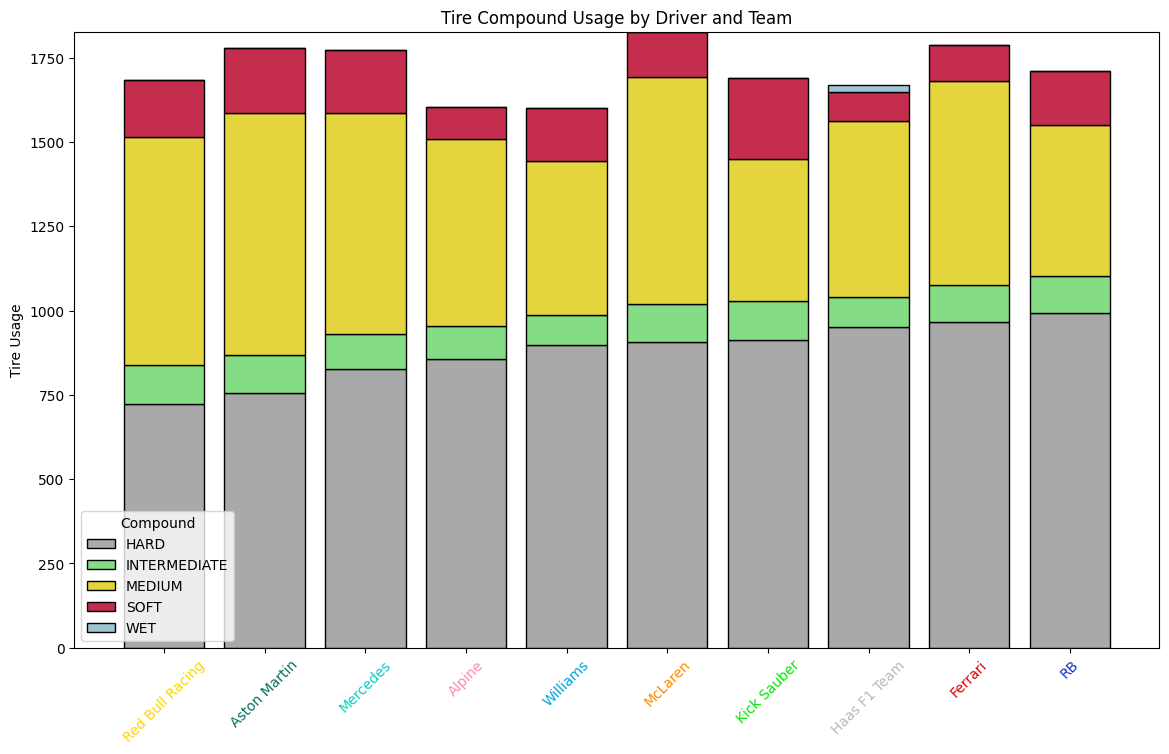

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))
bottom = None

for compound in ["HARD", "INTERMEDIATE", "MEDIUM", "SOFT", "WET"]:
    ax.bar(team_compound_usage.index, team_compound_usage[compound], bottom=bottom, color=tire_colors[compound], label=compound, edgecolor='black')
    bottom = team_compound_usage[compound] if bottom is None else bottom + team_compound_usage[compound]

for team, color in team_colors.items():
    if team in team_compound_usage.index:
        ax.get_xticklabels()[team_compound_usage.index.tolist().index(team)].set_color(color)

ax.set_ylabel("Tire Usage")
ax.set_title("Tire Compound Usage by Driver and Team")
ax.legend(title="Compound")

plt.xticks(rotation=45)
plt.show()

In [13]:
driver_compound_usage = tire_data.groupby(['Driver', 'Compound']).size().unstack(fill_value=0)

In [14]:
driver_compound_usage.sort_values(by=['HARD', 'MEDIUM'], inplace=True)

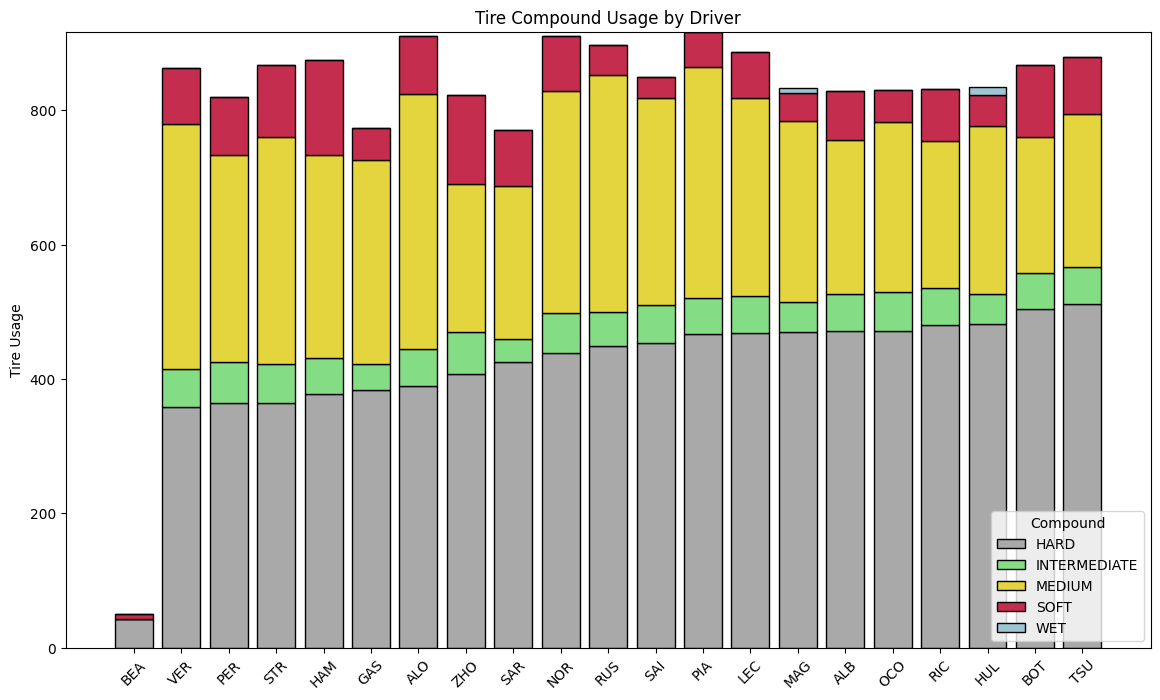

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
bottom = None

for compound in ["HARD", "INTERMEDIATE", "MEDIUM", "SOFT", "WET"]:
    ax.bar(driver_compound_usage.index, driver_compound_usage[compound], bottom=bottom, color=tire_colors[compound], label=compound, edgecolor='black')
    bottom = driver_compound_usage[compound] if bottom is None else bottom + driver_compound_usage[compound]

for team, color in team_colors.items():
    if team in driver_compound_usage.index:
        ax.get_xticklabels()[driver_compound_usage.index.tolist().index(team)].set_color(color)

ax.set_ylabel("Tire Usage")
ax.set_title("Tire Compound Usage by Driver")
ax.legend(title="Compound")

plt.xticks(rotation=45)
plt.show()

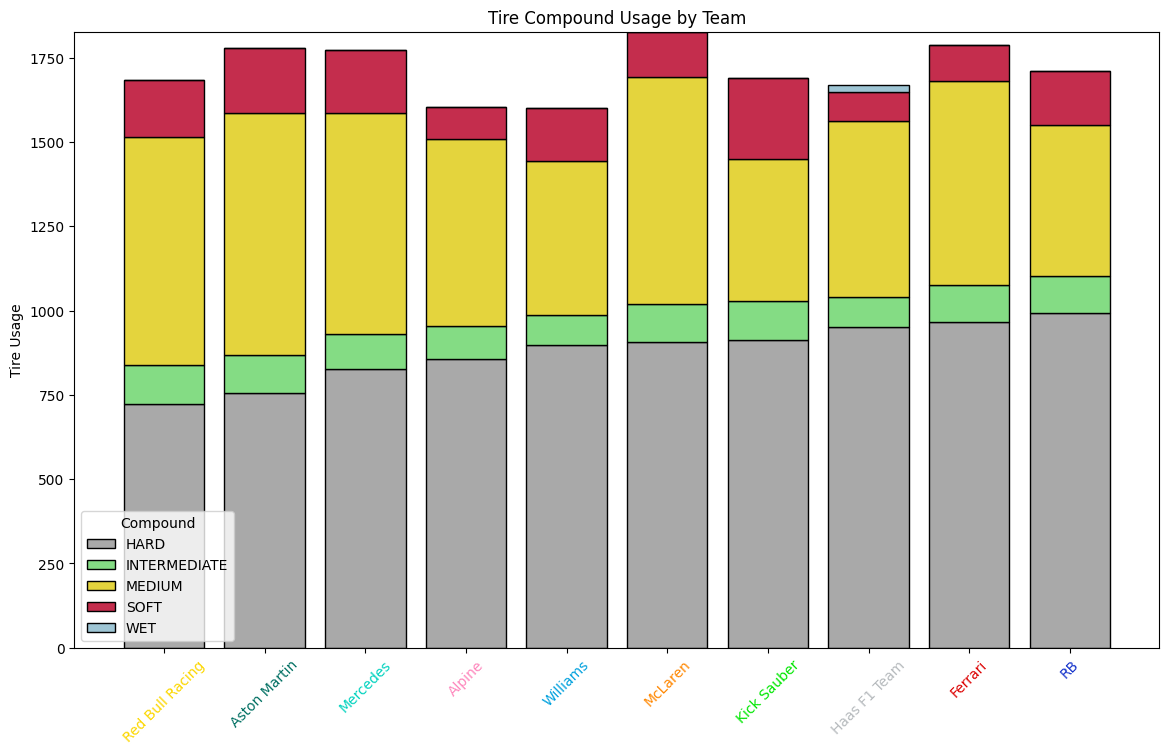

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
bottom = None

for compound in ["HARD", "INTERMEDIATE", "MEDIUM", "SOFT", "WET"]:
    ax.bar(team_compound_usage.index, team_compound_usage[compound], bottom=bottom, color=tire_colors[compound], label=compound, edgecolor='black')
    bottom = team_compound_usage[compound] if bottom is None else bottom + team_compound_usage[compound]

for team, color in team_colors.items():
    if team in team_compound_usage.index:
        ax.get_xticklabels()[team_compound_usage.index.tolist().index(team)].set_color(color)

ax.set_ylabel("Tire Usage")
ax.set_title("Tire Compound Usage by Team")
ax.legend(title="Compound")

plt.xticks(rotation=45)
plt.show()


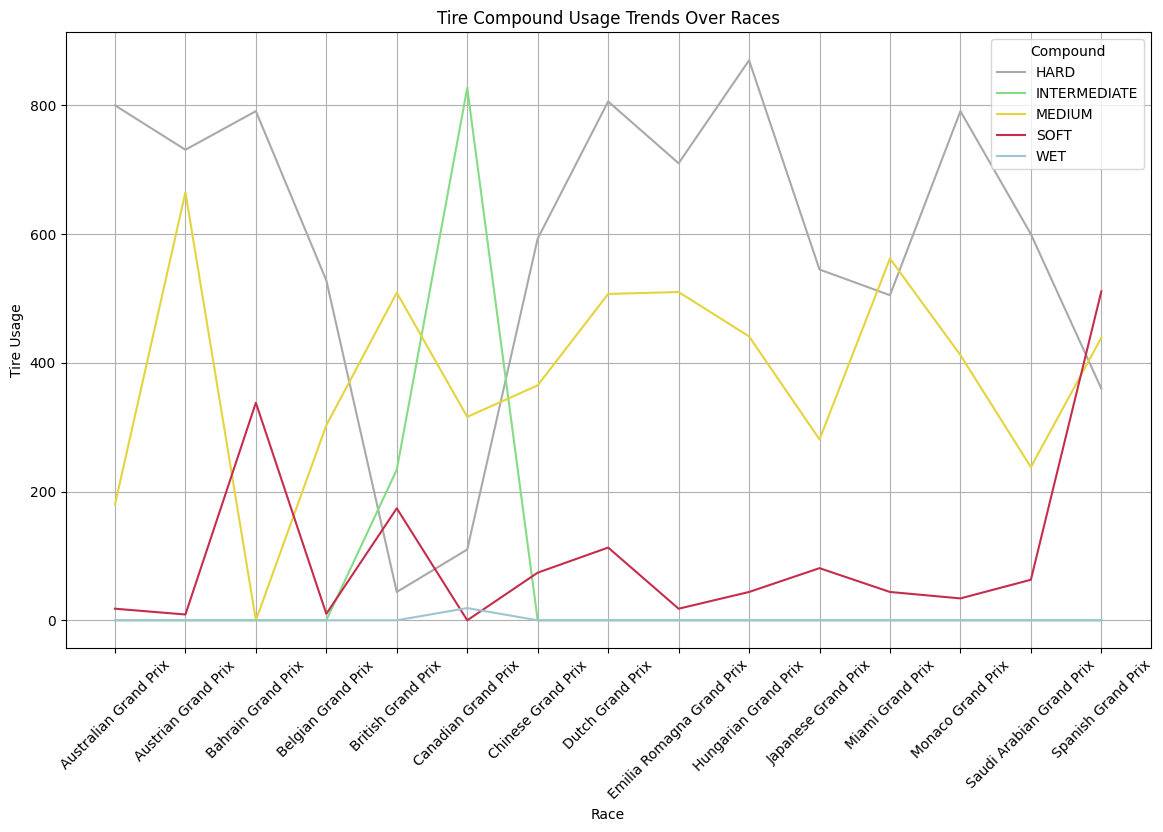

In [17]:
race_compound_trend = tire_data.groupby(['EventName', 'Compound']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
for compound in ["HARD", "INTERMEDIATE", "MEDIUM", "SOFT", "WET"]:
    plt.plot(race_compound_trend.index, race_compound_trend[compound], label=compound, color=tire_colors[compound])

plt.title('Tire Compound Usage Trends Over Races')
plt.ylabel('Tire Usage')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.legend(title="Compound")
plt.grid(True)
plt.show()

## Number of Laps Completed on Each Tire Compound

In [18]:
stint_compound_data = lap_data.groupby(['EventName', 'Driver', 'Team', 'Stint', 'Compound'])['LapNumber'].count().reset_index()

compounds = stint_compound_data['Compound'].unique()
num_compounds = len(compounds)

In [19]:
stint_compound_data_driver_mean = stint_compound_data.groupby(['Driver', 'Team', 'Stint', 'Compound'])['LapNumber'].mean().reset_index()
stint_compound_data_team_mean = stint_compound_data.groupby(['Team', 'Stint', 'Compound'])['LapNumber'].mean().reset_index()

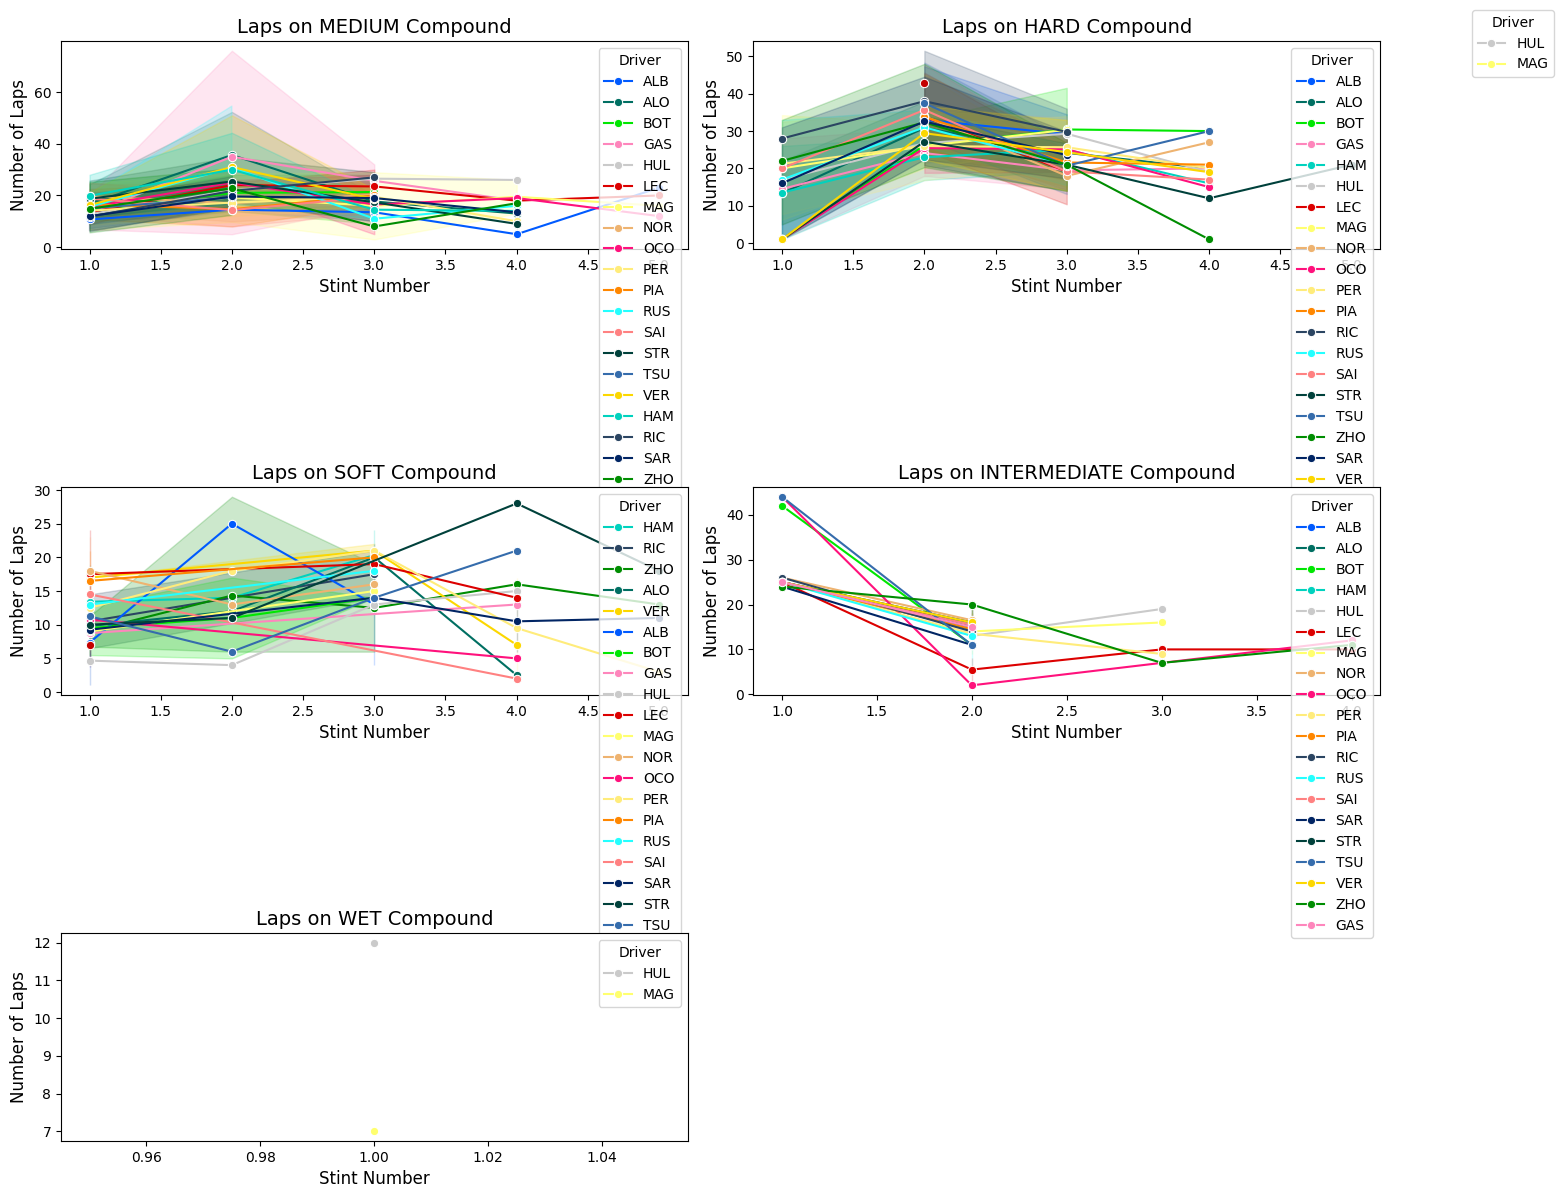

In [20]:
plt.figure(figsize=(14, 12))

for i, compound in enumerate(compounds, 1):
    plt.subplot(3, 2, i)
    compound_data = stint_compound_data[stint_compound_data['Compound'] == compound]
    
    sns.lineplot(
        data=compound_data, 
        x='Stint', 
        y='LapNumber', 
        hue='Driver', 
        marker="o", 
        palette=driver_colors,
        # legend=False  # Disable legend in subplots
    )
    
    plt.title(f"Laps on {compound} Compound", fontsize=14)
    plt.xlabel("Stint Number", fontsize=12)
    plt.ylabel("Number of Laps", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title="Driver", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


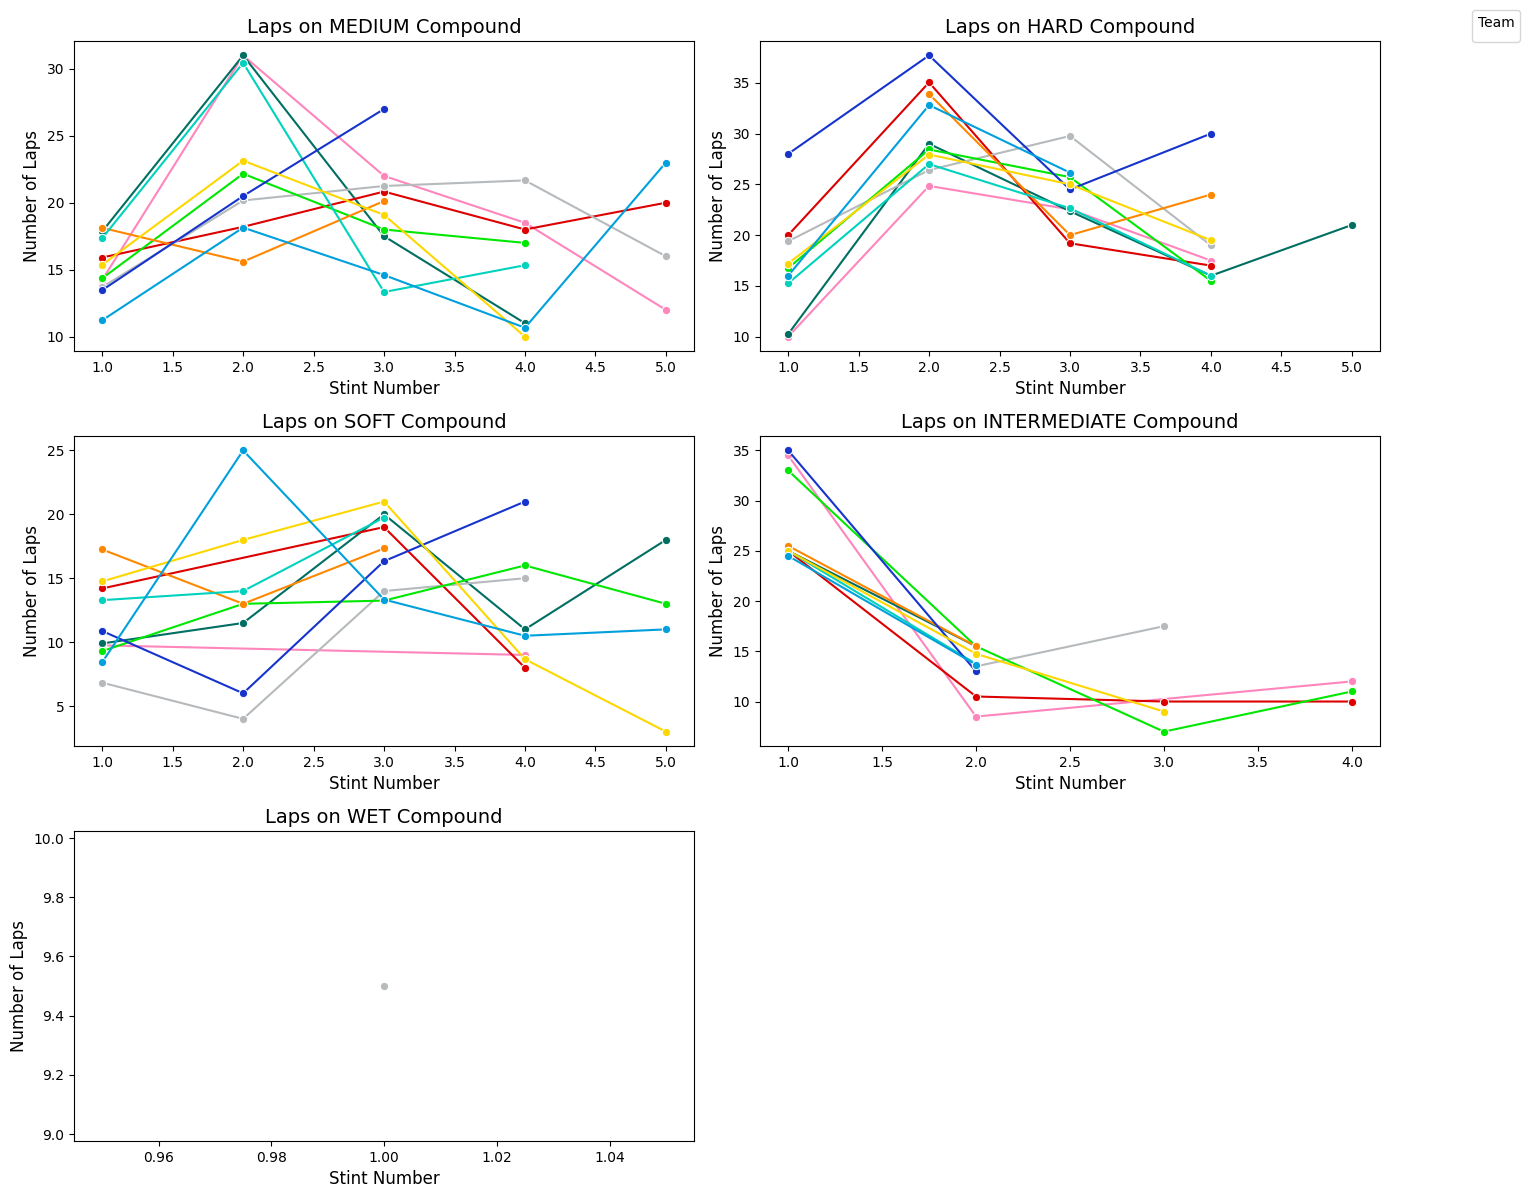

In [21]:
plt.figure(figsize=(14, 12))

for i, compound in enumerate(compounds, 1):
    plt.subplot(3, 2, i)
    compound_data = stint_compound_data_team_mean[stint_compound_data_team_mean['Compound'] == compound]
    
    sns.lineplot(
        data=compound_data, 
        x='Stint', 
        y='LapNumber', 
        hue='Team', 
        marker="o", 
        palette=team_colors,
        legend=False 
    )
    
    plt.title(f"Laps on {compound} Compound", fontsize=14)
    plt.xlabel("Stint Number", fontsize=12)
    plt.ylabel("Number of Laps", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/3394474402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stint_compound_data_driver_mean, x='Compound', y='LapNumber', palette=tire_colors)


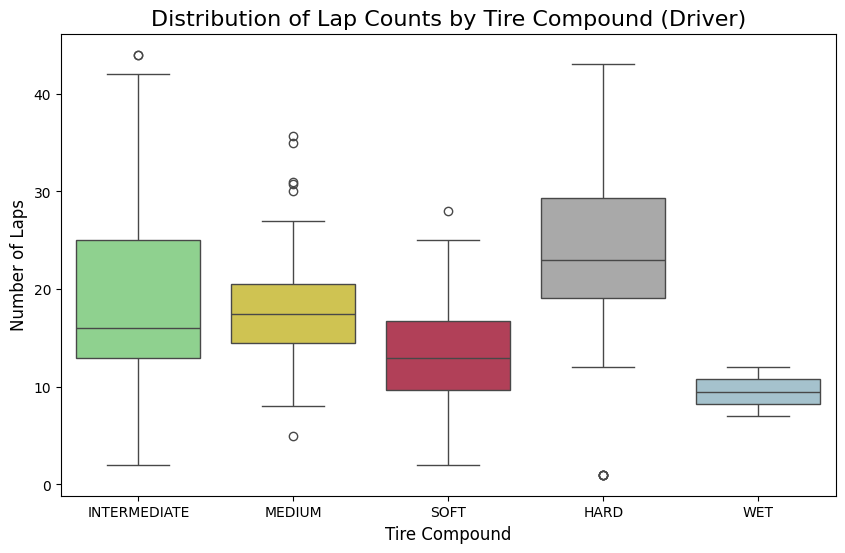

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stint_compound_data_driver_mean, x='Compound', y='LapNumber', palette=tire_colors)

plt.title("Distribution of Lap Counts by Tire Compound (Driver)", fontsize=16)
plt.xlabel("Tire Compound", fontsize=12)
plt.ylabel("Number of Laps", fontsize=12)
plt.show() 

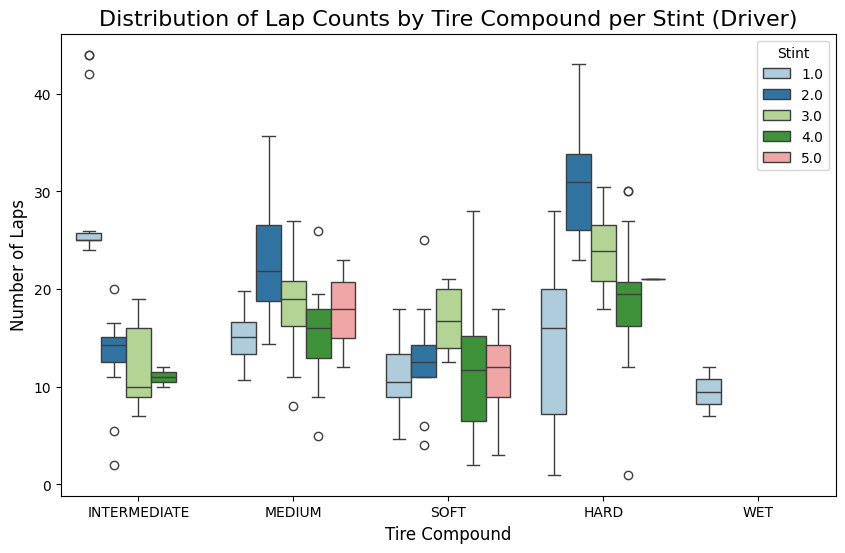

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stint_compound_data_driver_mean, x='Compound', y='LapNumber', hue='Stint', palette='Paired')

plt.title("Distribution of Lap Counts by Tire Compound per Stint (Driver)", fontsize=16)
plt.xlabel("Tire Compound", fontsize=12)
plt.ylabel("Number of Laps", fontsize=12)
plt.show() 

In [24]:
stint_compound_data_team_mean

Team  Stint      Compound  LapNumber
0      Alpine    1.0          HARD  10.000000
1      Alpine    1.0  INTERMEDIATE  34.500000
2      Alpine    1.0        MEDIUM  14.235294
3      Alpine    1.0          SOFT   9.750000
4      Alpine    2.0          HARD  24.850000
..        ...    ...           ...        ...
142  Williams    3.0          SOFT  13.333333
143  Williams    4.0        MEDIUM  10.666667
144  Williams    4.0          SOFT  10.500000
145  Williams    5.0        MEDIUM  23.000000
146  Williams    5.0          SOFT  11.000000

[147 rows x 4 columns]

In [25]:
stint_compound_data_team_mean.sort_values(["Compound", 'LapNumber'], inplace=True)

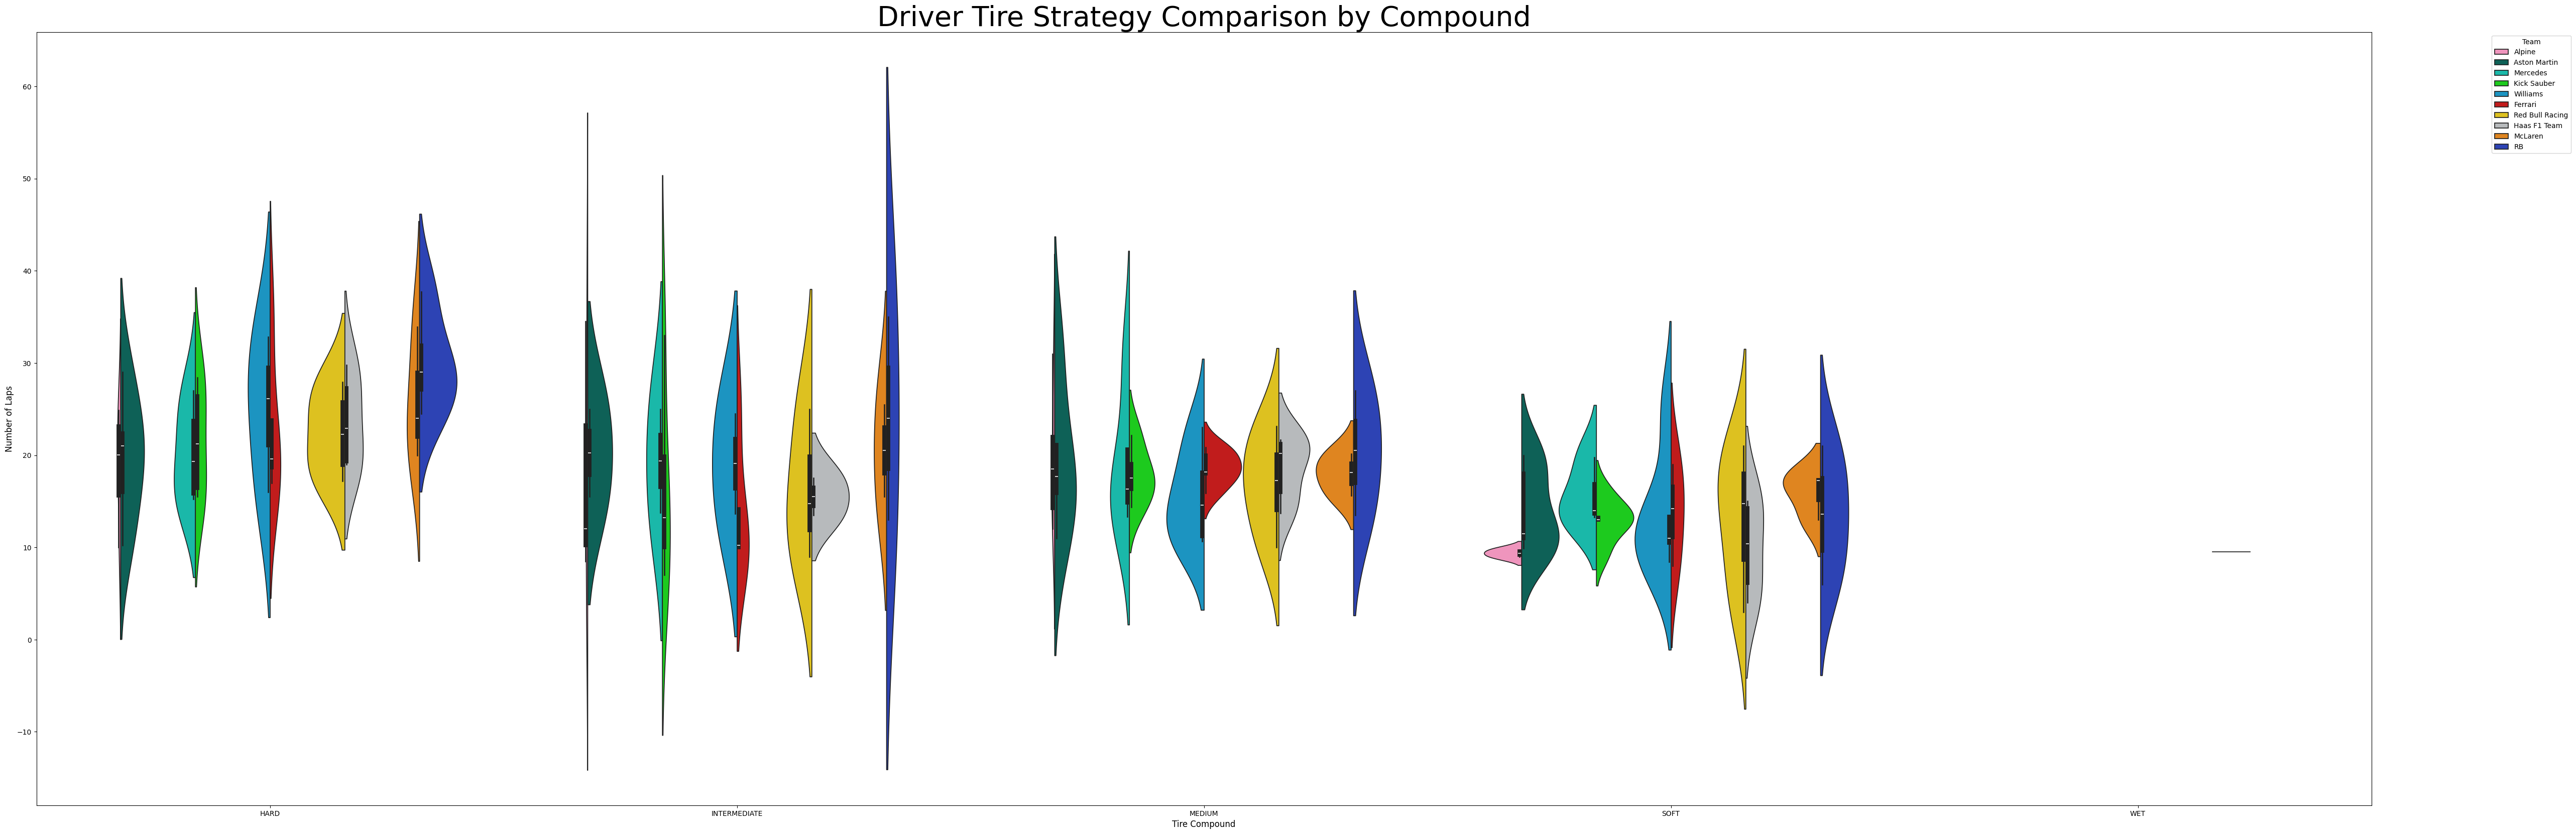

In [26]:
plt.figure(figsize=(60, 20))
sns.violinplot(data=stint_compound_data_team_mean, x='Compound', y='LapNumber', hue='Team', split=True, palette=team_colors)

plt.title("Driver Tire Strategy Comparison by Compound", fontsize=40)
plt.xlabel("Tire Compound", fontsize=12)
plt.ylabel("Number of Laps", fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Average Lap Time per Stint and Delta Time per Tire Compound

In [27]:
lap_data_time = lap_data_clean.copy(deep=True)

In [28]:
lap_data_time['LapTime'] = pd.to_timedelta(lap_data_time['LapTime'])
lap_data_time['LapTimeSeconds'] = lap_data_time['LapTime'].dt.total_seconds()
# Calculate delta time per lap, grouped by Event, Driver, Stint, and Compound
lap_data_time['LapDelta'] = lap_data_time.groupby(['EventName', 'Driver', 'Stint', 'Compound'])['LapTime'].diff()


# Calculate the average lap time per stint and compound, grouped by Event and Driver
complete_avg_lap_time_per_stint_compound = lap_data_time.groupby(['Stint', 'Compound'])['LapTime'].mean().reset_index()
# Calculate the average lap delta per stint and tire compound, grouped by Event and Driver
complete_avg_delta_by_compound_stint = lap_data_time.groupby(['Stint', 'Compound'])['LapDelta'].mean().reset_index()
complete_avg_delta_by_compound_stint = complete_avg_delta_by_compound_stint[complete_avg_delta_by_compound_stint['Compound']!="WET"]

In [29]:
complete_avg_lap_time_per_stint_compound['LapTime'] = complete_avg_lap_time_per_stint_compound['LapTime'].dt.total_seconds()

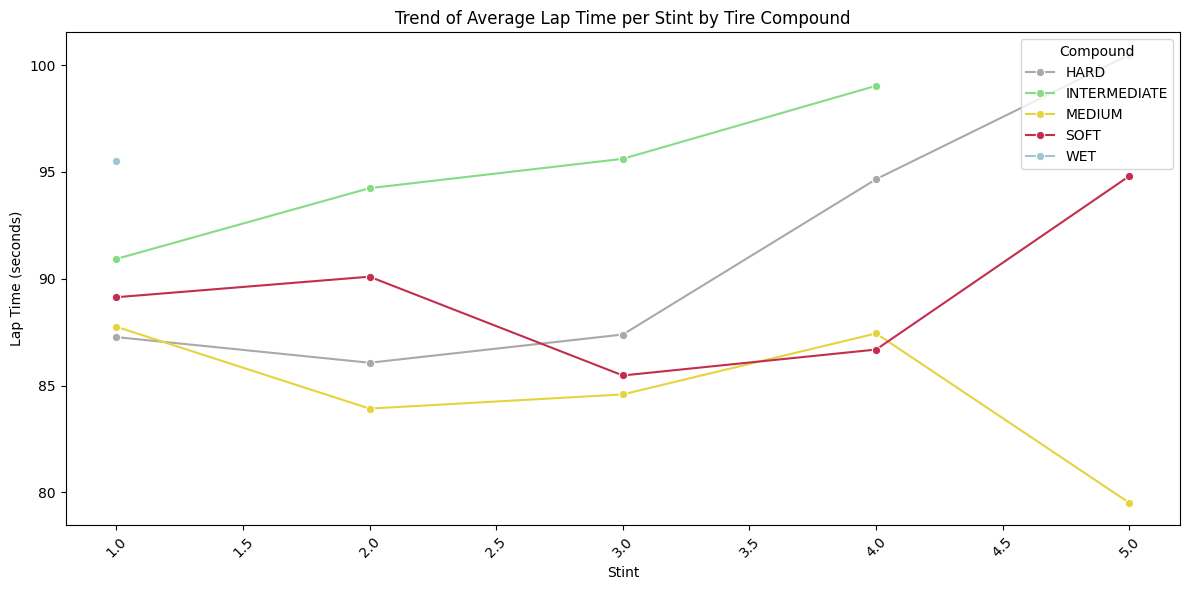

In [30]:
plt.figure(figsize=(12, 6))

lap_time_line_plot = sns.lineplot(
    data=complete_avg_lap_time_per_stint_compound, 
    x='Stint', y='LapTime', hue='Compound', 
    palette=tire_colors, marker='o'
)

lap_time_line_plot.set_title('Trend of Average Lap Time per Stint by Tire Compound')
lap_time_line_plot.set_ylabel('Lap Time (seconds)')
lap_time_line_plot.set_xlabel('Stint')
plt.xticks(rotation=45)
plt.legend(title="Compound", loc='upper right')

plt.tight_layout()
plt.show()

In [31]:
lap_data_time['LapDelta'] = lap_data_time['LapDelta'].dt.total_seconds()

In [32]:
# Calculate IQR to filter out outliers
Q1 = lap_data_time['LapDelta'].quantile(0.25)
Q3 = lap_data_time['LapDelta'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_lap_data_time = lap_data_time[(lap_data_time['LapDelta'] >= lower_bound) & (lap_data_time['LapDelta'] <= upper_bound)]

In [33]:
lap_data_time.groupby(['Compound', 'Stint']).describe(
)[["LapTimeSeconds", "LapDelta"]]

LapTimeSeconds                                             
                            count        mean        std     min        25%   
Compound     Stint                                                            
HARD         1.0            411.0   87.269273   8.710258  71.660   82.79200  \
             2.0           4788.0   86.068031  10.283618  69.400   78.21475   
             3.0           2540.0   87.388618  10.871252  69.164   79.92250   
             4.0            247.0   94.659522   5.304509  74.856   94.99300   
             5.0             20.0  100.485100   0.633220  99.444  100.09700   
INTERMEDIATE 1.0            451.0   90.925836   4.648829  84.429   87.34800   
             2.0            354.0   94.239410   8.036285  83.272   87.18975   
             3.0             45.0   95.613089   8.263387  85.789   87.86000   
             4.0             27.0   99.032296   7.400966  86.012   91.09300   
MEDIUM       1.0           2396.0   87.752645  10.946813  69.813   77.74450   
             2.0           1461.0   83.921277   8.904014  69.563   79.57600   
             3.0            891.0   84.585918  10.694522  68.016   76.41600   
             4.0            206.0   87.439646  10.591569  69.894   77.84475   
             5.0             62.0   79.509032   7.559310  69.584   70.57200   
SOFT         1.0            620.0   89.134763   8.861290  76.489   81.52075   
             2.0            139.0   90.096237   9.184260  79.608   81.52800   
             3.0            371.0   85.472070   8.150485  73.878   78.17650   
             4.0            150.0   86.685173   9.126714  67.694   79.03025   
             5.0             41.0   94.808024   2.442376  89.707   92.50400   
WET          1.0             15.0   95.512400   1.289324  93.993   94.60000   

                                                 LapDelta                       
                         50%        75%      max    count      mean       std   
Compound     Stint                                                              
HARD         1.0     85.0920   93.98100  112.376    393.0 -0.017608  0.826459  \
             2.0     82.9585   93.92325  140.237   4618.0 -0.042621  1.197852   
             3.0     83.8100   96.78225  109.611   2424.0  0.023269  0.792196   
             4.0     95.8960   97.21650  100.961    234.0  0.002103  0.754587   
             5.0    100.4635  100.79900  101.571     19.0  0.108316  0.252765   
INTERMEDIATE 1.0     89.5200   93.49250  118.326    433.0 -0.608360  1.902798   
             2.0     90.5625  102.79550  112.538    322.0 -0.171124  1.312162   
             3.0     92.2020  103.53400  110.248     40.0 -0.046625  2.102024   
             4.0    102.3620  104.16750  108.010     24.0 -0.023292  1.955026   
MEDIUM       1.0     85.4330   94.27550  112.479   2241.0  0.042135  1.225551   
             2.0     81.1980   84.32800  132.996   1392.0 -0.052889  1.432744   
             3.0     82.5080   92.45850  110.433    839.0 -0.028072  0.907711   
             4.0     92.2545   96.24550  102.969    190.0 -0.073111  1.184915   
             5.0     81.3505   81.85275   95.931     58.0 -0.106086  1.063505   
SOFT         1.0     83.7875   98.17475  111.541    560.0  0.010157  0.472054   
             2.0     92.2080   93.23250  148.991    126.0 -0.550794  5.129400   
             3.0     89.6050   92.38800  100.819    347.0  0.028640  1.155256   
             4.0     82.5010   95.51100  104.701    135.0  0.013644  1.137966   
             5.0     95.7780   96.38100   99.818     37.0 -0.052432  1.581172   
WET          1.0     95.0530   96.16800   98.640     13.0 -0.468308  1.088581   

                                                              
                       min      25%     50%      75%     max  
Compound     Stint                                            
HARD         1.0    -7.103 -0.29300  0.0120  0.25300   5.979  
             2.0   -40.696 -0.22800 -0.0025  0.22000  10.458  
             3.0    -4

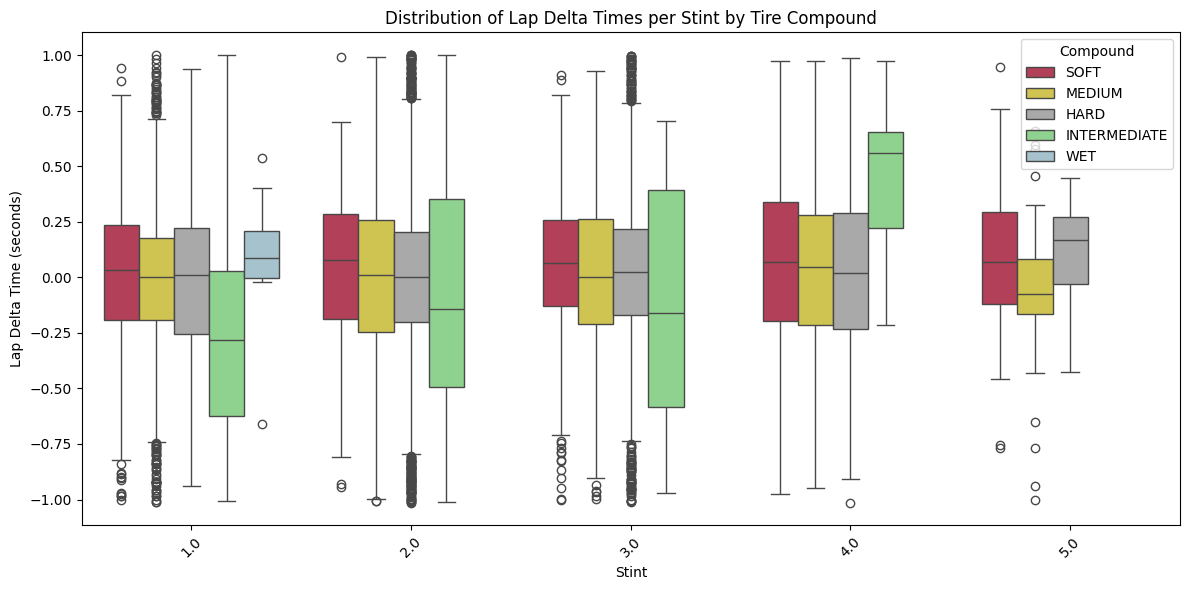

In [34]:
plt.figure(figsize=(12, 6))

lap_delta_plot = sns.boxplot(
    data=filtered_lap_data_time, 
    x='Stint', y='LapDelta', hue='Compound', 
    palette=tire_colors
)

lap_delta_plot.set_title('Distribution of Lap Delta Times per Stint by Tire Compound')
lap_delta_plot.set_ylabel('Lap Delta Time (seconds)')
lap_delta_plot.set_xlabel('Stint')
plt.xticks(rotation=45)
plt.legend(title="Compound", loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()

## Time Spent in Pits

In [35]:
lap_data_pits = lap_data.copy(deep=True)

In [36]:
lap_data_pits['PitInTime']  = pd.to_timedelta(lap_data_pits['PitInTime'], errors='coerce')
lap_data_pits['PitOutTime'] = pd.to_timedelta(lap_data_pits['PitOutTime'], errors='coerce')

lap_data_pits['PitStopDuration'] = lap_data_pits['PitOutTime'].shift(-1) - lap_data_pits['PitInTime']

In [37]:
lap_data_pits['PitStopDurationSeconds'] = lap_data_pits['PitStopDuration'].dt.total_seconds()

In [38]:
def remove_outliers_iqr(df, column):
    # Q1 = df[column].quantile(0.999)
    Q3 = df[column].quantile(0.9)
    print(df[column].min())
    print(Q3)
    print(len(df))
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] <= Q3)]

# Remove outliers in LapTimeSeconds
lap_data_pits = remove_outliers_iqr(lap_data_pits, 'PitStopDurationSeconds')

17.174
32.077799999999996
17123


In [39]:
my_order_driver = lap_data_pits.groupby(by=["Driver"])["PitStopDurationSeconds"].median().sort_values(ascending=False).iloc[::-1].index

In [40]:
lap_data_pits.groupby(by=["Team"])["PitStopDurationSeconds"].describe()

count       mean       std     min       25%      50%   
Team                                                                     
Alpine            49.0  23.916143  3.292949  17.575  21.94200  23.0250  \
Aston Martin      52.0  23.774692  3.239444  17.750  22.30300  23.0080   
Ferrari           49.0  23.559184  3.481391  17.174  21.63500  23.0280   
Haas F1 Team      52.0  24.313635  3.442250  18.078  22.36625  23.4715   
Kick Sauber       48.0  24.273438  3.039623  18.870  22.16675  23.2530   
McLaren           48.0  23.226125  3.188307  17.274  21.51950  22.6135   
Mercedes          50.0  23.417440  3.021475  17.543  21.43100  22.7285   
RB                43.0  23.327302  3.384159  17.478  21.43500  22.5480   
Red Bull Racing   51.0  23.458608  2.818856  17.190  22.02900  22.7160   
Williams          47.0  23.753468  3.059045  17.573  22.08950  23.1790   

                      75%     max  
Team                               
Alpine           25.10700  30.670  
Aston Martin     24.53050  31.355  
Ferrari          24.26500  31.935  
Haas F1 Team     25.97175  31.311  
Kick Sauber      25.61075  31.512  
McLaren          24.00875  30.361  
Mercedes         24.60850  30.037  
RB               24.59450  30.355  
Red Bull Racing  24.31100  30.289  
Williams         24.70100  31.705

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2871842556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pit_stop_plot = sns.boxplot(


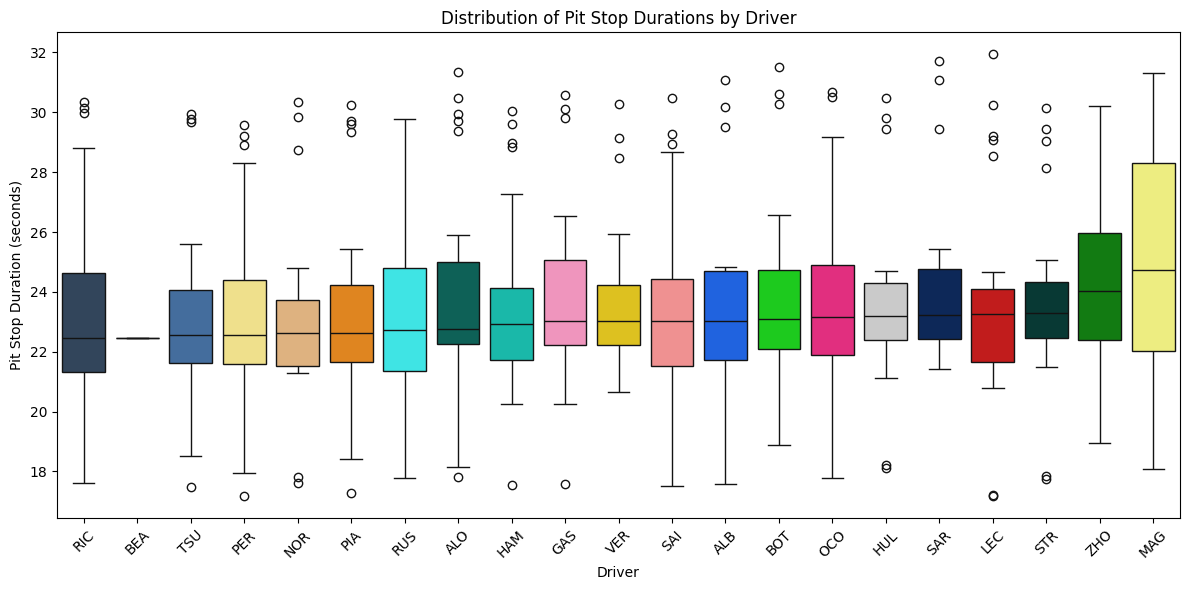

In [41]:
plt.figure(figsize=(12, 6))

pit_stop_plot = sns.boxplot(
    data=lap_data_pits, 
    x='Driver', y='PitStopDurationSeconds', order=my_order_driver, palette=driver_colors
)

pit_stop_plot.set_title('Distribution of Pit Stop Durations by Driver')
pit_stop_plot.set_ylabel('Pit Stop Duration (seconds)')
pit_stop_plot.set_xlabel('Driver')
plt.xticks(rotation=45)

plt.legend([],[], frameon=False)  # Remove any unnecessary legends

plt.tight_layout()
plt.show()

In [42]:
my_order_team = lap_data_pits.groupby(by=["Team"])["PitStopDurationSeconds"].median().sort_values(ascending=False).iloc[::-1].index

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/3091248996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pit_stop_violin_plot = sns.violinplot(


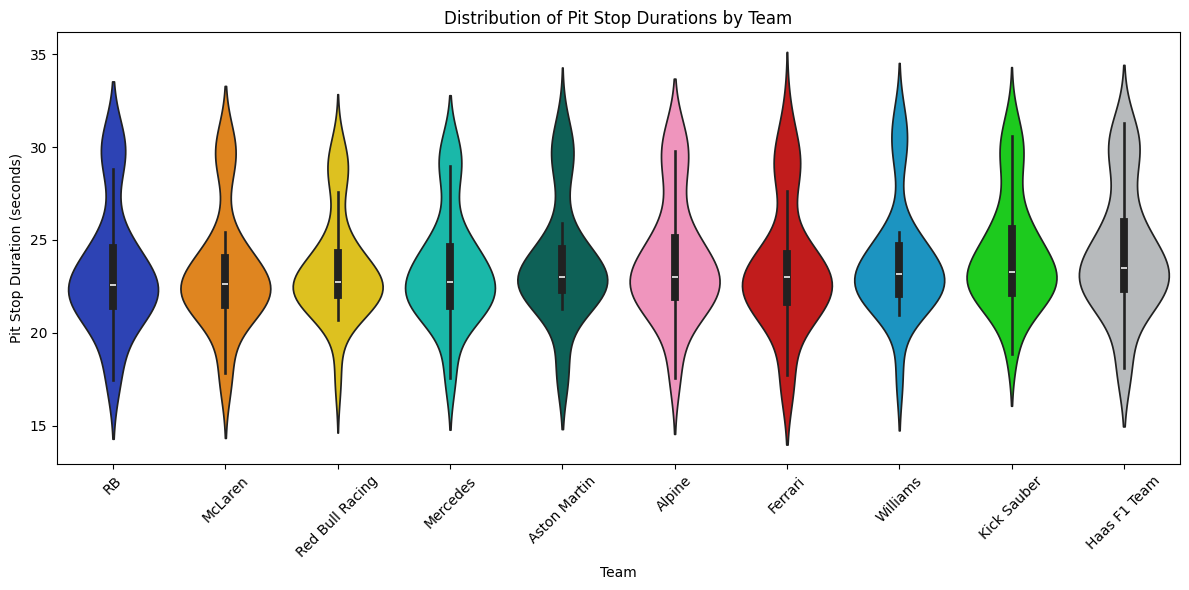

In [43]:
plt.figure(figsize=(12, 6))

pit_stop_violin_plot = sns.violinplot(
    data=lap_data_pits, 
    x='Team', y='PitStopDurationSeconds', order=my_order_team, palette=team_colors
)

pit_stop_violin_plot.set_title('Distribution of Pit Stop Durations by Team')
pit_stop_violin_plot.set_ylabel('Pit Stop Duration (seconds)')
pit_stop_violin_plot.set_xlabel('Team')
plt.xticks(rotation=45)

plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

In [44]:
my_order_race = lap_data_pits.groupby(by=["EventName"])["PitStopDurationSeconds"].median().sort_values(ascending=False).iloc[::-1].index

In [45]:
lap_data_pits.groupby(by=["EventName"])["PitStopDurationSeconds"].describe()

count       mean       std     min       25%   
EventName                                                                 
Australian Grand Prix       34.0  18.309265  2.235654  17.174  17.58125  \
Austrian Grand Prix         44.0  22.539705  2.512587  20.693  21.42650   
Bahrain Grand Prix          40.0  24.938825  0.978531  23.886  24.47550   
Belgian Grand Prix          34.0  23.077147  0.408410  22.231  22.72375   
British Grand Prix          40.0  29.376925  0.669472  28.303  28.97350   
Canadian Grand Prix         39.0  25.257051  1.879226  22.324  24.15200   
Chinese Grand Prix          37.0  22.977622  0.807304  21.957  22.54900   
Dutch Grand Prix            26.0  21.334077  0.575136  20.686  20.97000   
Emilia Romagna Grand Prix   25.0  30.251200  0.522447  29.571  29.80700   
Hungarian Grand Prix        40.0  21.826775  0.561860  21.060  21.38950   
Japanese Grand Prix         36.0  23.658056  0.973058  22.646  23.10875   
Miami Grand Prix            28.0  23.406607  2.436916  21.742  22.33075   
Monaco Grand Prix            7.0  24.722143  1.522504  23.666  24.08400   
Saudi Arabian Grand Prix    17.0  21.999353  0.972011  20.236  21.37900   
Spanish Grand Prix          42.0  22.589119  1.344830  21.276  21.91075   

                               50%       75%     max  
EventName                                             
Australian Grand Prix      17.8190  18.19525  30.508  
Austrian Grand Prix        21.6605  22.32125  31.935  
Bahrain Grand Prix         24.7675  25.09275  29.802  
Belgian Grand Prix         23.0520  23.38975  24.244  
British Grand Prix         29.2360  29.76025  31.512  
Canadian Grand Prix        24.6720  25.66100  30.582  
Chinese Grand Prix         22.9130  23.17700  25.849  
Dutch Grand Prix           21.1630  21.61150  22.992  
Emilia Romagna Grand Prix  30.1730  30.47500  31.355  
Hungarian Grand Prix       21.7910  22.09475  23.581  
Japanese Grand Prix        23.3200  23.81450  26.788  
Miami Grand Prix           22.6480  23.03875  30.673  
Monaco Grand Prix          24.2670  24.41450  28.125  
Saudi Arabian Grand Prix   22.2400  22.52500  23.717  
Spanish Grand Prix         22.2930  22.64150  28.754

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/932361383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pit_stop_event_plot = sns.boxplot(


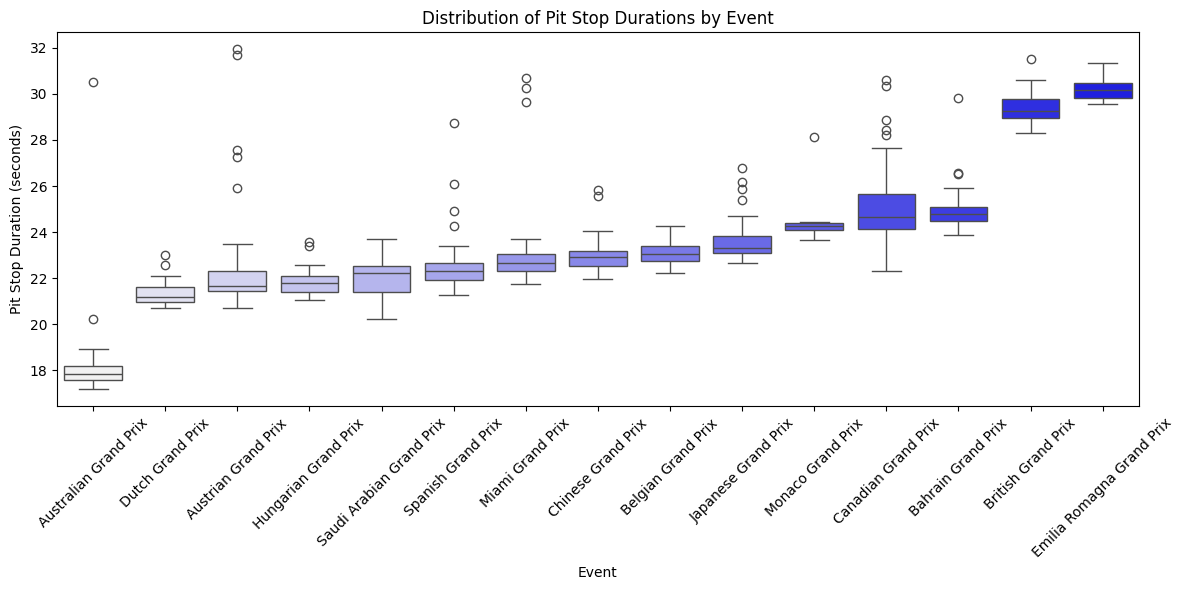

In [46]:
plt.figure(figsize=(12, 6))

pit_stop_event_plot = sns.boxplot(
    data=lap_data_pits, 
    x='EventName', y='PitStopDurationSeconds', order=my_order_race, palette="light:b"
)

pit_stop_event_plot.set_title('Distribution of Pit Stop Durations by Event')
pit_stop_event_plot.set_ylabel('Pit Stop Duration (seconds)')
pit_stop_event_plot.set_xlabel('Event')
plt.xticks(rotation=45)

plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

# Reliationship
## Tire Compound Choice vs Lap Time

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/1494846017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faceted_lap_times_data['LapTimeSeconds'] = pd.to_timedelta(faceted_lap_times_data['LapTime']).dt.total_seconds()


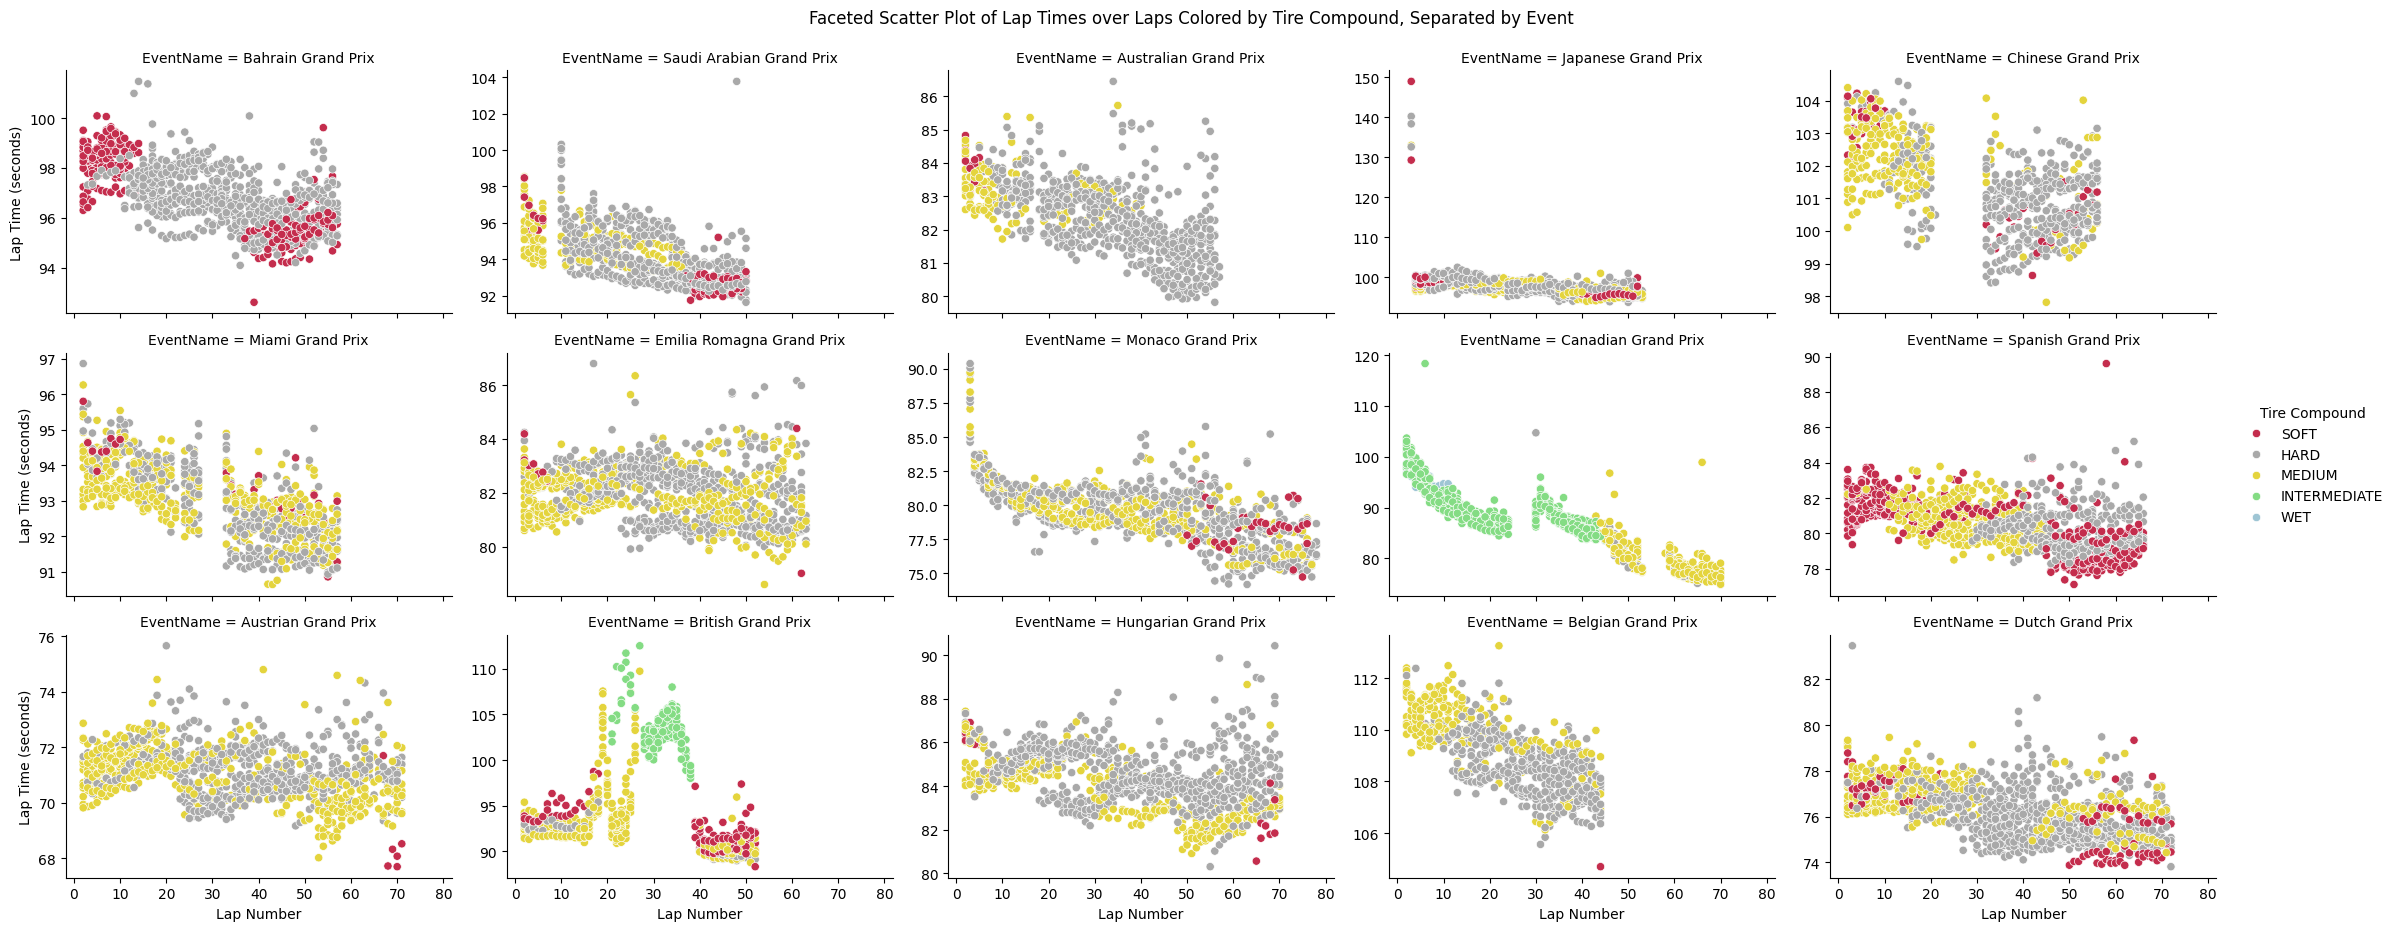

In [47]:
# Extract relevant columns for faceted plotting and include the EventName
faceted_lap_times_data = lap_data[['EventName', 'LapNumber', 'LapTime', 'Compound', 'IsAccurate', 'Driver', 'Team']]

# Convert 'LapTime' to seconds for easier plotting and filter out inaccurate laps
faceted_lap_times_data['LapTimeSeconds'] = pd.to_timedelta(faceted_lap_times_data['LapTime']).dt.total_seconds()

# Filter out inaccurate laps
faceted_lap_times_data = faceted_lap_times_data[faceted_lap_times_data['IsAccurate'] == True]

# Plot faceted scatter plot: Lap Times over Laps colored by tire compound, separated by event
g = sns.FacetGrid(faceted_lap_times_data, col="EventName", col_wrap=5, height=3, aspect=1.5, sharey=False)
g.map_dataframe(
    sns.scatterplot, 
    x="LapNumber", 
    y="LapTimeSeconds", 
    hue="Compound", 
    palette=tire_colors
)

g.add_legend(title="Tire Compound")
g.set_axis_labels("Lap Number", "Lap Time (seconds)")
g.fig.suptitle("Faceted Scatter Plot of Lap Times over Laps Colored by Tire Compound, Separated by Event", y=1.03)

plt.show()

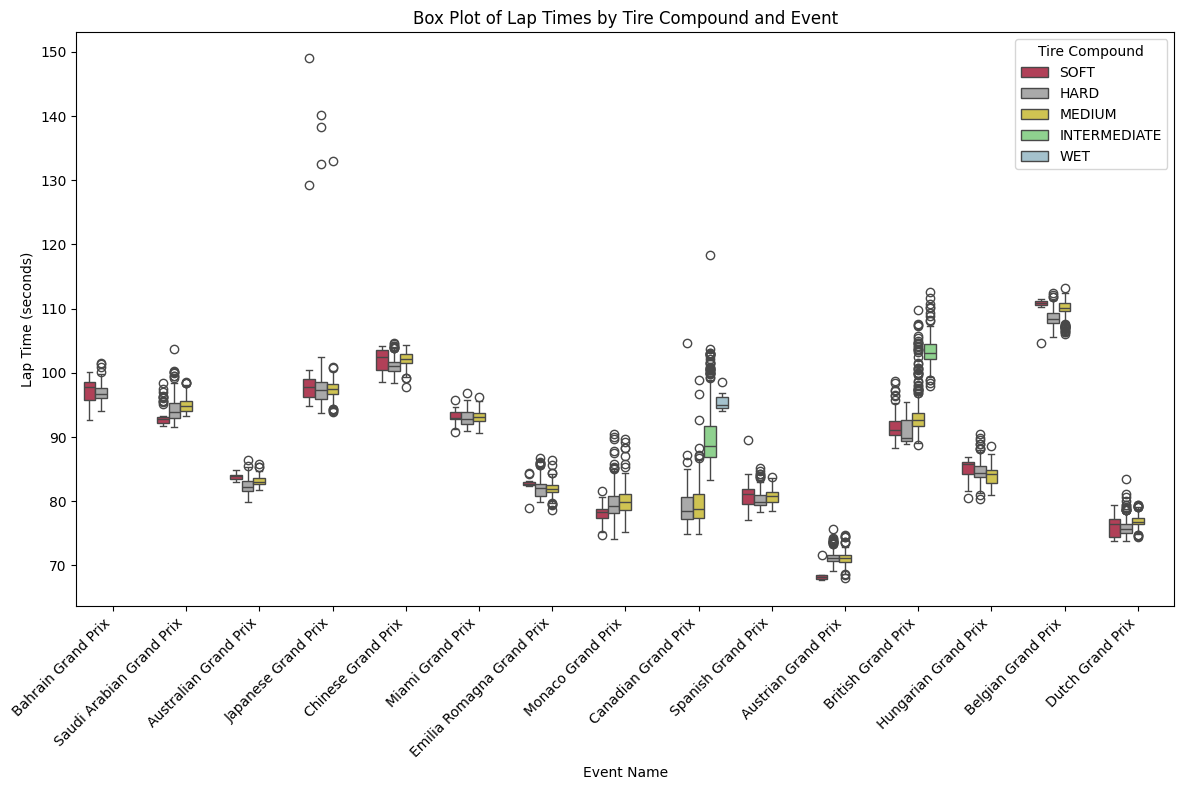

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=faceted_lap_times_data, 
    x='EventName', 
    y='LapTimeSeconds', 
    hue='Compound',
    palette=tire_colors
)

plt.title('Box Plot of Lap Times by Tire Compound and Event')
plt.xlabel('Event Name')
plt.ylabel('Lap Time (seconds)')
plt.legend(title='Tire Compound')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


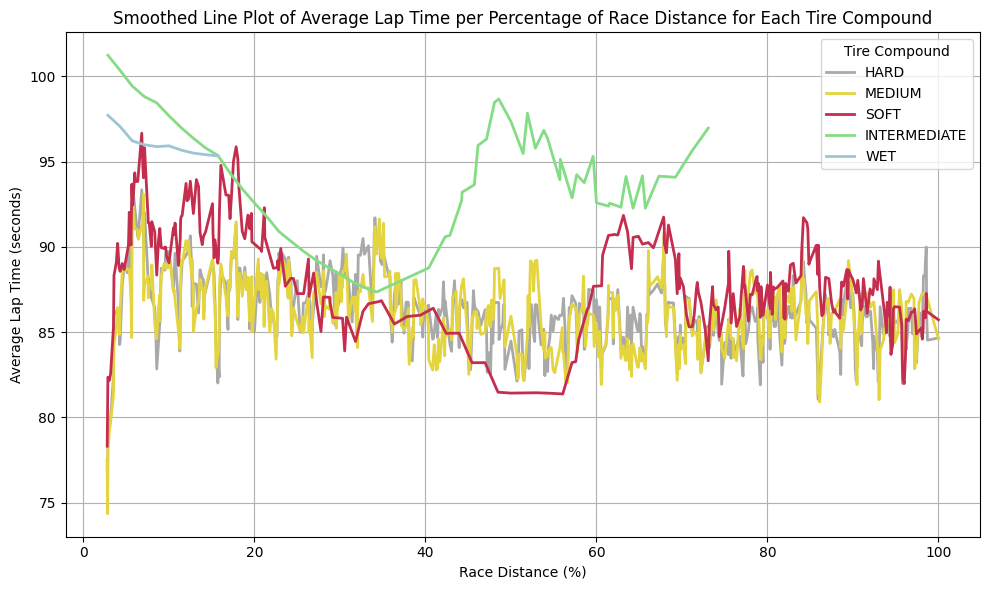

In [49]:
faceted_lap_times_data['RaceDistancePercentage'] = faceted_lap_times_data.groupby('EventName')['LapNumber'].transform(lambda x: (x / x.max()) * 100)

# Group data by RaceDistancePercentage and Compound to calculate average lap time
avg_lap_times_by_distance = faceted_lap_times_data.groupby(['RaceDistancePercentage', 'Compound']).agg({'LapTimeSeconds': 'mean'}).reset_index()

# Adding a moving average to smooth the data

# Define a window for the moving average (e.g., over 5% of the race distance)
window_size = 10

# Compute the moving average for each tire compound
avg_lap_times_by_distance['LapTimeMovingAvg'] = avg_lap_times_by_distance.groupby('Compound')['LapTimeSeconds'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())


plt.figure(figsize=(10, 6))

sns.lineplot(
    data=avg_lap_times_by_distance, 
    x='RaceDistancePercentage', 
    y='LapTimeMovingAvg', 
    hue='Compound',
    palette=tire_colors,
    linewidth=2
)

plt.title('Smoothed Line Plot of Average Lap Time per Percentage of Race Distance for Each Tire Compound')
plt.xlabel('Race Distance (%)')
plt.ylabel('Average Lap Time (seconds)')
plt.legend(title='Tire Compound')
plt.grid(True)
plt.tight_layout()
plt.show()



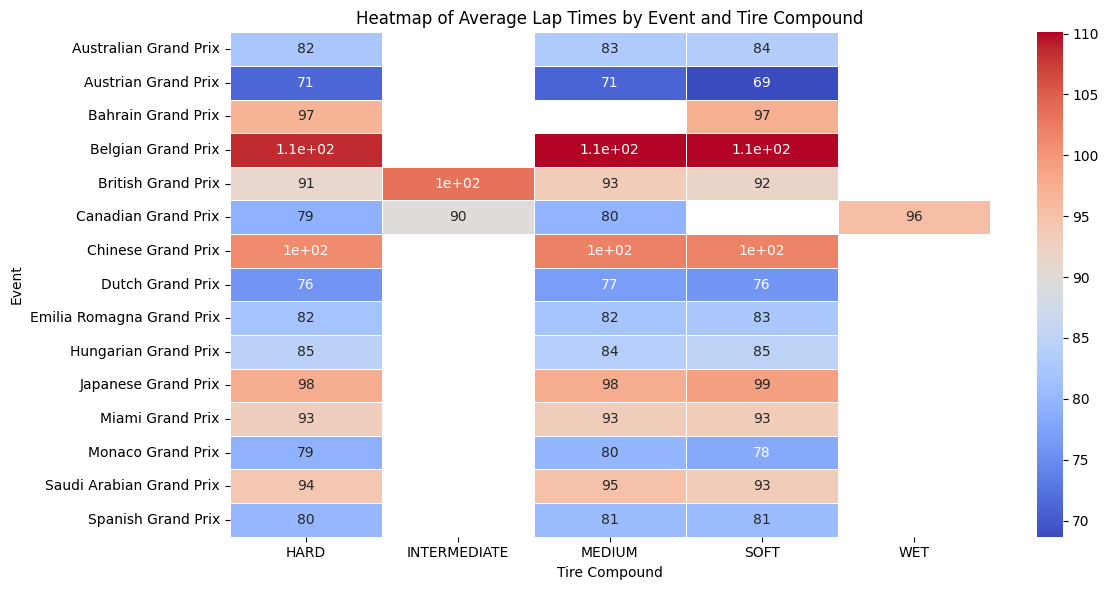

In [50]:
# Prepare data for the heatmap by calculating the average lap time for each tire compound per event
heatmap_data = faceted_lap_times_data.groupby(['EventName', 'Compound']).agg({'LapTimeSeconds': 'mean'}).reset_index()

# Adjust the heatmap to display tire compounds horizontally (columns) and events vertically (rows)
heatmap_pivot_horizontal = heatmap_data.pivot(index='EventName', columns='Compound', values='LapTimeSeconds')

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot_horizontal, 
    annot=True, 
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor="white"
)

plt.title('Heatmap of Average Lap Times by Event and Tire Compound')
plt.xlabel('Tire Compound')
plt.ylabel('Event')
plt.tight_layout()
plt.show()



/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/1450170094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/Users/lucaordronneau/miniconda3/envs/general/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lucaordronneau/miniconda3/envs/general/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lucaordronneau/miniconda3/envs/general/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use

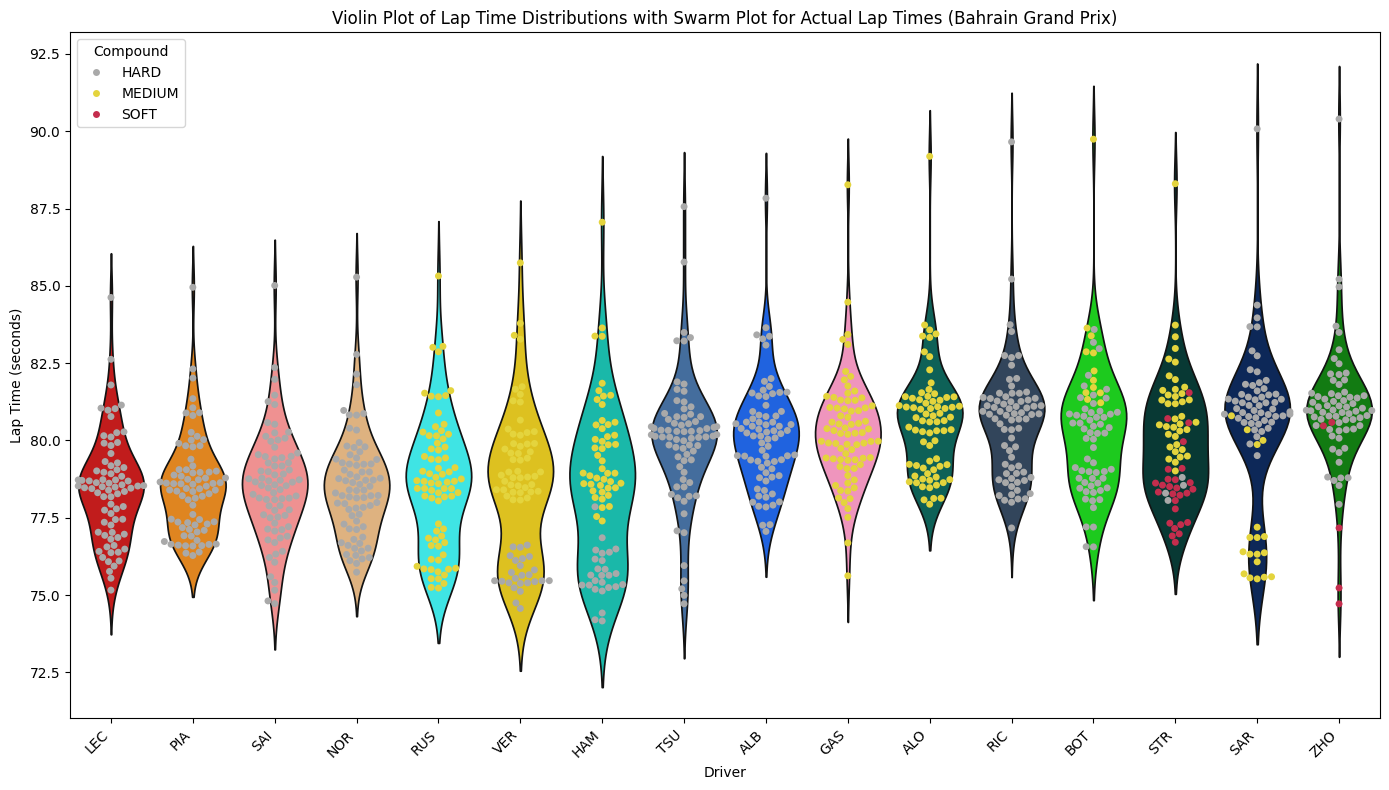

In [51]:
specific_race_data = faceted_lap_times_data[faceted_lap_times_data['EventName'] == 'Monaco Grand Prix']

plt.figure(figsize=(14, 8))

sns.violinplot(
    data=specific_race_data, 
    x='Driver', 
    y='LapTimeSeconds',
    palette=driver_colors, 
    inner=None
)

sns.swarmplot(
    data=specific_race_data, 
    x='Driver', 
    y='LapTimeSeconds', 
    color='k',
    hue="Compound",
    palette=tire_colors, 
    alpha=1
)

plt.title('Violin Plot of Lap Time Distributions with Swarm Plot for Actual Lap Times (Bahrain Grand Prix)')
plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Starting Tire Type vs Final Classification

In [52]:
result_data = pd.read_csv('../data/races_2024/result_2024.csv')
lap_data = pd.read_csv('../data/races_2024/lap_2024.csv')

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2150277909.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_data = pd.read_csv('../data/races_2024/lap_2024.csv')


In [53]:
result_data.columns

Index(['EventName', 'DriverNumber', 'BroadcastName', 'Abbreviation',
       'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName',
       'FullName', 'HeadshotUrl', 'CountryCode', 'Position',
       'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time',
       'Status', 'Points'],
      dtype='object')

In [54]:
first_stint_data = lap_data.loc[lap_data.groupby(['EventName', 'Driver'])['LapNumber'].idxmin()]

merged_data = pd.merge(result_data, first_stint_data[['EventName', 'Driver', 'Compound']], 
                       left_on=['EventName', 'Abbreviation'], right_on=['EventName', 'Driver'], how='left')

merged_data = merged_data.dropna(subset=['Compound', 'ClassifiedPosition'])

valid_tire_compounds = ['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE']
merged_data = merged_data[merged_data['Compound'].isin(valid_tire_compounds)]

merged_data['ClassifiedPosition'] = pd.to_numeric(merged_data['ClassifiedPosition'], errors='coerce')
merged_data = merged_data.dropna(subset=['ClassifiedPosition'])

<Figure size 1600x1000 with 0 Axes>

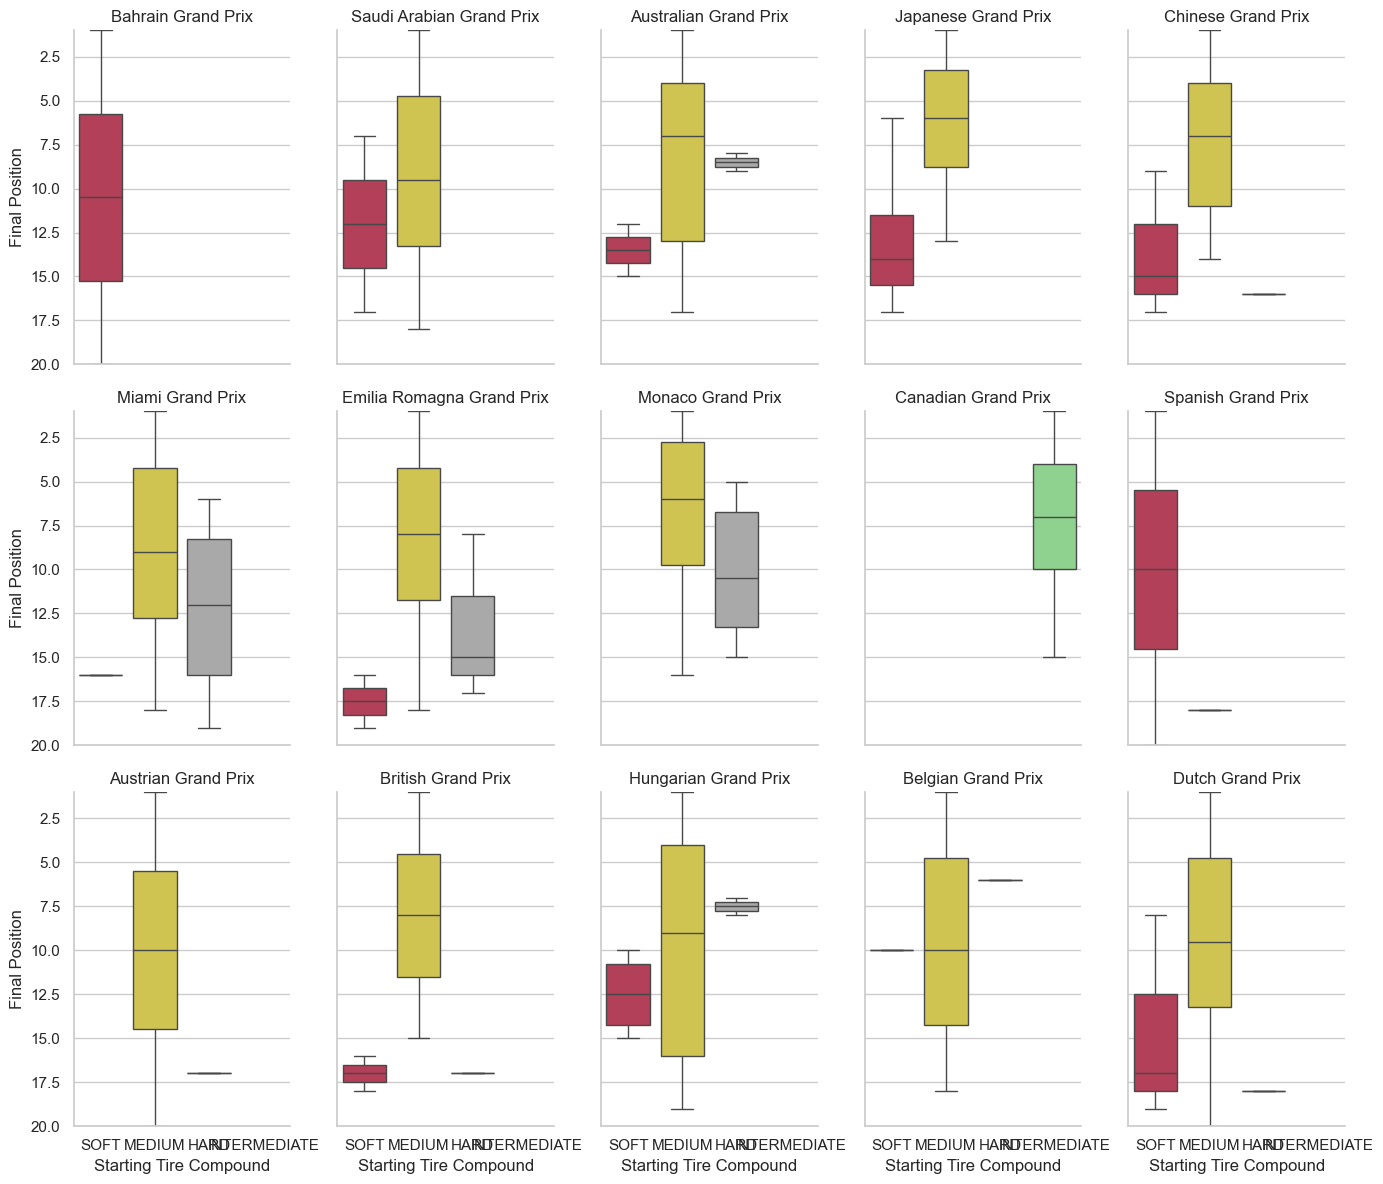

In [55]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

g = sns.catplot(
    data=merged_data,
    x='Compound', y='ClassifiedPosition', col='EventName', hue="Compound", palette=tire_colors,
    kind='box', height=4, aspect=0.7, col_wrap=5,
    order=valid_tire_compounds
)

g.set(ylim=(20, 1))
g.set_axis_labels("Starting Tire Compound", "Final Position")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()

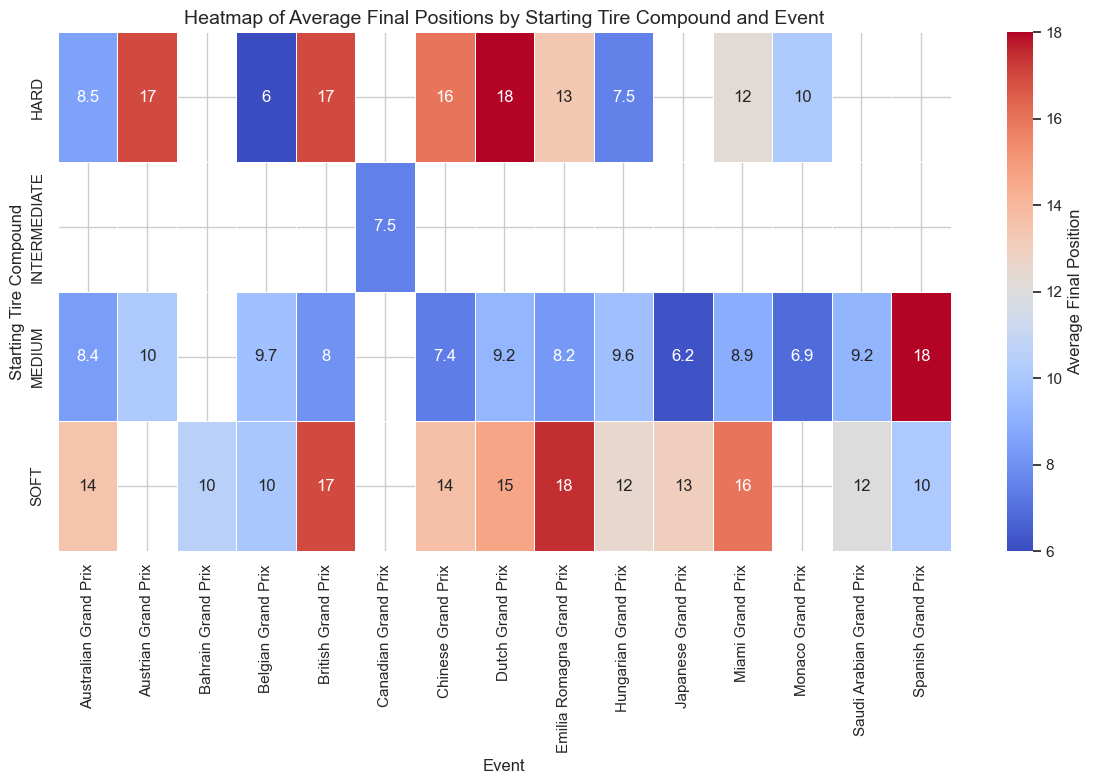

In [56]:
heatmap_data = merged_data.pivot_table(
    index='Compound', columns='EventName', values='ClassifiedPosition', aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Average Final Position'})

plt.title('Heatmap of Average Final Positions by Starting Tire Compound and Event', fontsize=14)
plt.xlabel('Event')
plt.ylabel('Starting Tire Compound')

plt.tight_layout()
plt.show()


In [57]:
scatter_data = merged_data.dropna(subset=['GridPosition', 'ClassifiedPosition'])
scatter_data = scatter_data[scatter_data["GridPosition"] != 0]

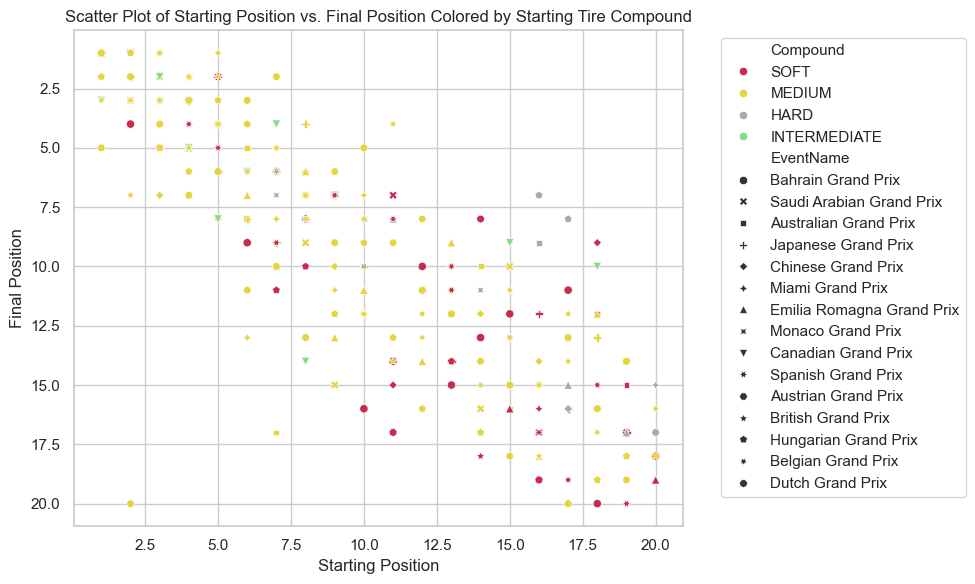

In [58]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

g = sns.scatterplot(
    data=scatter_data,
    x='GridPosition', y='ClassifiedPosition', hue='Compound', style='EventName', palette=tire_colors
)

plt.gca().invert_yaxis()

# Set labels and title
plt.title('Scatter Plot of Starting Position vs. Final Position Colored by Starting Tire Compound')
plt.xlabel('Starting Position')
plt.ylabel('Final Position')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

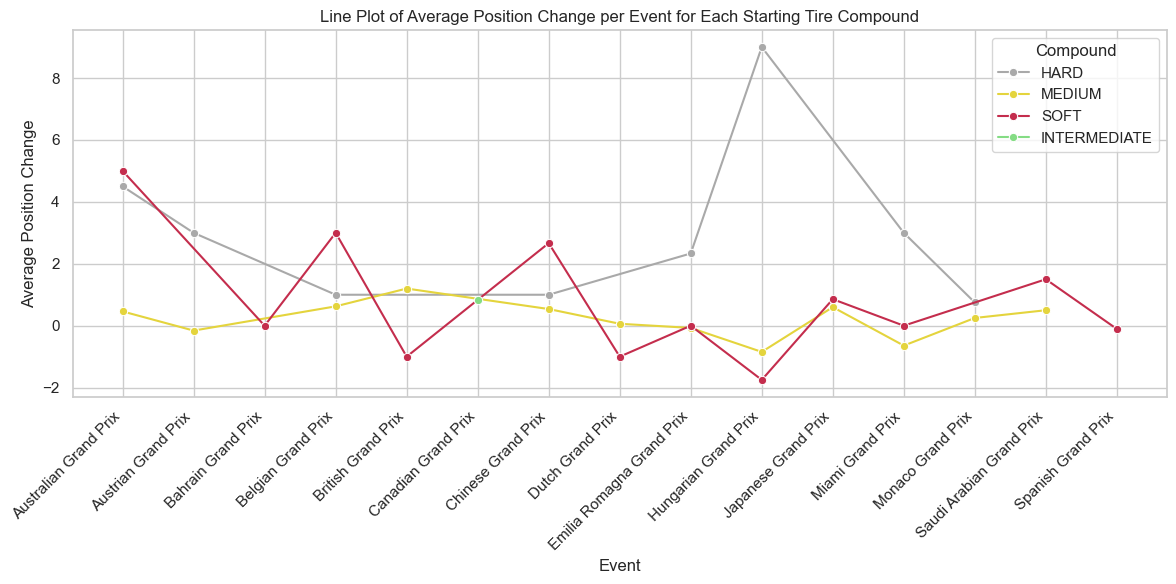

In [59]:
scatter_data['PositionChange'] = scatter_data['GridPosition'] - scatter_data['ClassifiedPosition']

position_change_data = scatter_data.groupby(['EventName', 'Compound'])['PositionChange'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

g = sns.lineplot(
    data=position_change_data,
    x='EventName', y='PositionChange', hue='Compound', marker='o', palette=tire_colors
)

plt.title('Line Plot of Average Position Change per Event for Each Starting Tire Compound')
plt.xlabel('Event')
plt.ylabel('Average Position Change')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/34551408.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Compound', y='PodiumFinishes', data=podium_normalized, palette=tire_colors)


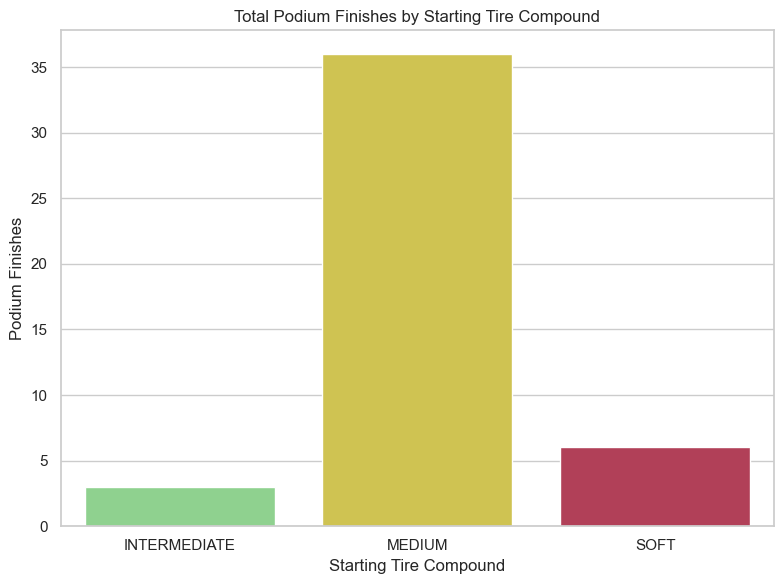

In [60]:
# Filter the data for podium finishes (top 3 positions)
podium_data = scatter_data[scatter_data['ClassifiedPosition'] <= 3]

# Count the number of podium finishes per tire compound
podium_counts = podium_data.groupby('Compound')['ClassifiedPosition'].count().reset_index()
podium_counts.columns = ['Compound', 'PodiumFinishes']

# Normalize the counts by the total number of drivers starting on each tire compound
total_starters = scatter_data.groupby('Compound')['DriverNumber'].count().reset_index()
total_starters.columns = ['Compound', 'TotalStarters']

podium_normalized = pd.merge(podium_counts, total_starters, on='Compound')
podium_normalized['NormalizedPodiumFinishes'] = podium_normalized['PodiumFinishes'] / podium_normalized['TotalStarters']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(x='Compound', y='PodiumFinishes', data=podium_normalized, palette=tire_colors)

plt.title('Total Podium Finishes by Starting Tire Compound')
plt.xlabel('Starting Tire Compound')
plt.ylabel('Podium Finishes')

plt.tight_layout()
plt.show()

## Number of Laps on a Compound vs Delta Time

In [61]:
lap_data

EventName                    Time Driver  DriverNumber   
0      Bahrain Grand Prix  0 days 01:01:37.510000    VER             1  \
1      Bahrain Grand Prix  0 days 01:03:13.806000    VER             1   
2      Bahrain Grand Prix  0 days 01:04:50.559000    VER             1   
3      Bahrain Grand Prix  0 days 01:06:27.206000    VER             1   
4      Bahrain Grand Prix  0 days 01:08:04.379000    VER             1   
...                   ...                     ...    ...           ...   
17118    Dutch Grand Prix  0 days 02:23:52.192000    ZHO            24   
17119    Dutch Grand Prix  0 days 02:25:07.916000    ZHO            24   
17120    Dutch Grand Prix  0 days 02:26:25.673000    ZHO            24   
17121    Dutch Grand Prix  0 days 02:27:41.538000    ZHO            24   
17122    Dutch Grand Prix  0 days 02:28:57.336000    ZHO            24   

                      LapTime  LapNumber  Stint PitOutTime PitInTime   
0      0 days 00:01:37.284000        1.0    1.0        NaN       NaN  \
1      0 days 00:01:36.296000        2.0    1.0        NaN       NaN   
2      0 days 00:01:36.753000        3.0    1.0        NaN       NaN   
3      0 days 00:01:36.647000        4.0    1.0        NaN       NaN   
4      0 days 00:01:37.173000        5.0    1.0        NaN       NaN   
...                       ...        ...    ...        ...       ...   
17118  0 days 00:01:15.737000       66.0    3.0        NaN       NaN   
17119  0 days 00:01:15.724000       67.0    3.0        NaN       NaN   
17120  0 days 00:01:17.757000       68.0    3.0        NaN       NaN   
17121  0 days 00:01:15.865000       69.0    3.0        NaN       NaN   
17122  0 days 00:01:15.798000       70.0    3.0        NaN       NaN   

                  Sector1Time  ... FreshTyre             Team   
0                         NaN  ...     False  Red Bull Racing  \
1      0 days 00:00:30.916000  ...     False  Red Bull Racing   
2      0 days 00:00:30.999000  ...     False  Red Bull Racing   
3      0 days 00:00:30.931000  ...     False  Red Bull Racing   
4      0 days 00:00:31.255000  ...     False  Red Bull Racing   
...                       ...  ...       ...              ...   
17118  0 days 00:00:25.857000  ...      True      Kick Sauber   
17119  0 days 00:00:25.746000  ...      True      Kick Sauber   
17120  0 days 00:00:26.736000  ...      True      Kick Sauber   
17121  0 days 00:00:25.980000  ...      True      Kick Sauber   
17122  0 days 00:00:25.776000  ...      True      Kick Sauber   

                 LapStartTime             LapStartDate TrackStatus  Position   
0      0 days 00:59:59.911000  2024-03-02 15:03:42.342          12       1.0  \
1      0 days 01:01:37.510000  2024-03-02 15:05:19.941           1       1.0   
2      0 days 01:03:13.806000  2024-03-02 15:06:56.237           1       1.0   
3      0 days 01:04:50.559000  2024-03-02 15:08:32.990           1       1.0   
4      0 days 01:06:27.206000  2024-03-02 15:10:09.637           1       1.0   
...                       ...                      ...         ...       ...   
17118  0 days 02:22:36.455000  2024-08-25 14:28:13.093           1      20.0   
17119  0 days 02:23:52.192000  2024-08-25 14:29:28.830           1      20.0   
17120  0 days 02:25:07.916000  2024-08-25 14:30:44.554           1      20.0   
17121  0 days 02:26:25.673000  2024-08-25 14:32:02.311           1      20.0   
17122  0 days 02:27:41.538000  2024-08-25 14:33:18.176           1      20.0   

       Deleted  DeletedReason  FastF1Generated IsAccurate  
0        False            NaN            False      False  
1        False            NaN            False       True  
2        False            NaN            False       True  
3        False            NaN            False       True  
4        False            NaN            False       True  
...        ...            ...              ...        ...  
17118    False            NaN            False       True  
17119    False            NaN           

In [62]:
# Filter data for relevant tire compounds and columns
tire_data = lap_data.copy(deep=True)

tire_data = tire_data[tire_data['IsAccurate']]

# Convert LapTime to seconds for easy averaging
tire_data['LapTime'] = pd.to_timedelta(tire_data['LapTime']).dt.total_seconds()

compounds = tire_data["Compound"].unique().tolist()
tire_data_filtered = tire_data[tire_data['Compound'].isin(compounds)]

# Group by compound and lap number to calculate the average lap time
avg_lap_time = tire_data_filtered.groupby(['Compound', 'LapNumber', 'EventName'])['LapTime'].mean().reset_index()


In [63]:
tire_data_filtered

EventName                    Time Driver  DriverNumber   
1      Bahrain Grand Prix  0 days 01:03:13.806000    VER             1  \
2      Bahrain Grand Prix  0 days 01:04:50.559000    VER             1   
3      Bahrain Grand Prix  0 days 01:06:27.206000    VER             1   
4      Bahrain Grand Prix  0 days 01:08:04.379000    VER             1   
5      Bahrain Grand Prix  0 days 01:09:41.471000    VER             1   
...                   ...                     ...    ...           ...   
17118    Dutch Grand Prix  0 days 02:23:52.192000    ZHO            24   
17119    Dutch Grand Prix  0 days 02:25:07.916000    ZHO            24   
17120    Dutch Grand Prix  0 days 02:26:25.673000    ZHO            24   
17121    Dutch Grand Prix  0 days 02:27:41.538000    ZHO            24   
17122    Dutch Grand Prix  0 days 02:28:57.336000    ZHO            24   

       LapTime  LapNumber  Stint PitOutTime PitInTime             Sector1Time   
1       96.296        2.0    1.0        NaN       NaN  0 days 00:00:30.916000  \
2       96.753        3.0    1.0        NaN       NaN  0 days 00:00:30.999000   
3       96.647        4.0    1.0        NaN       NaN  0 days 00:00:30.931000   
4       97.173        5.0    1.0        NaN       NaN  0 days 00:00:31.255000   
5       97.092        6.0    1.0        NaN       NaN  0 days 00:00:31.041000   
...        ...        ...    ...        ...       ...                     ...   
17118   75.737       66.0    3.0        NaN       NaN  0 days 00:00:25.857000   
17119   75.724       67.0    3.0        NaN       NaN  0 days 00:00:25.746000   
17120   77.757       68.0    3.0        NaN       NaN  0 days 00:00:26.736000   
17121   75.865       69.0    3.0        NaN       NaN  0 days 00:00:25.980000   
17122   75.798       70.0    3.0        NaN       NaN  0 days 00:00:25.776000   

       ... FreshTyre             Team            LapStartTime   
1      ...     False  Red Bull Racing  0 days 01:01:37.510000  \
2      ...     False  Red Bull Racing  0 days 01:03:13.806000   
3      ...     False  Red Bull Racing  0 days 01:04:50.559000   
4      ...     False  Red Bull Racing  0 days 01:06:27.206000   
5      ...     False  Red Bull Racing  0 days 01:08:04.379000   
...    ...       ...              ...                     ...   
17118  ...      True      Kick Sauber  0 days 02:22:36.455000   
17119  ...      True      Kick Sauber  0 days 02:23:52.192000   
17120  ...      True      Kick Sauber  0 days 02:25:07.916000   
17121  ...      True      Kick Sauber  0 days 02:26:25.673000   
17122  ...      True      Kick Sauber  0 days 02:27:41.538000   

                  LapStartDate TrackStatus  Position  Deleted  DeletedReason   
1      2024-03-02 15:05:19.941           1       1.0    False            NaN  \
2      2024-03-02 15:06:56.237           1       1.0    False            NaN   
3      2024-03-02 15:08:32.990           1       1.0    False            NaN   
4      2024-03-02 15:10:09.637           1       1.0    False            NaN   
5      2024-03-02 15:11:46.810           1       1.0    False            NaN   
...                        ...         ...       ...      ...            ...   
17118  2024-08-25 14:28:13.093           1      20.0    False            NaN   
17119  2024-08-25 14:29:28.830           1      20.0    False            NaN   
17120  2024-08-25 14:30:44.554           1      20.0    False            NaN   
17121  2024-08-25 14:32:02.311           1      20.0    False            NaN   
17122  2024-08-25 14:33:18.176           1      20.0    False            NaN   

       FastF1Generated IsAccurate  
1                False       True  
2                False       True  
3                False       True  
4                False       True  
5                False       True  
...                ...        ...  
17118            False       True  
17119            False       True  
17120            False       True  
17121            False       True  
17122           

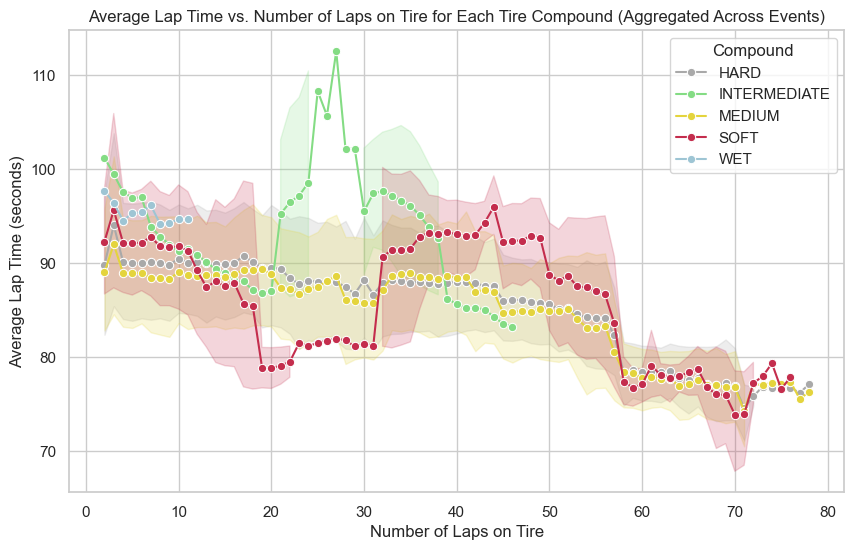

In [64]:
plt.figure(figsize=(10,6))

sns.lineplot(data=avg_lap_time, x='LapNumber', y='LapTime', hue='Compound', marker="o", palette=tire_colors)

plt.xlabel('Number of Laps on Tire')
plt.ylabel('Average Lap Time (seconds)')
plt.title('Average Lap Time vs. Number of Laps on Tire for Each Tire Compound (Aggregated Across Events)')
plt.grid(True)

plt.show()

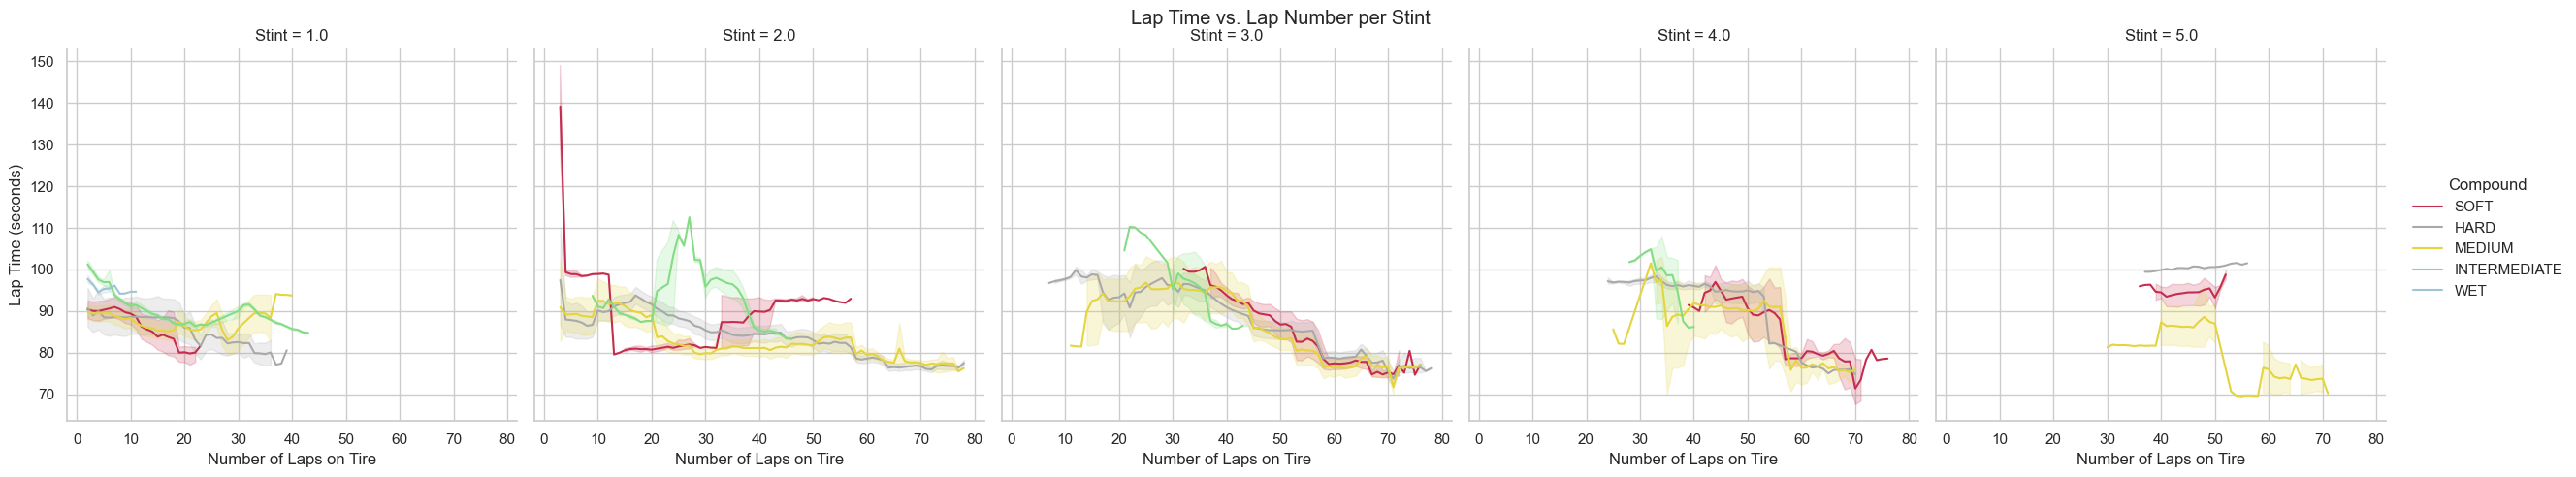

In [65]:
# Plotting with FacetGrid
g = sns.FacetGrid(
    tire_data_filtered,
    col='Stint',
    hue='Compound',
    col_wrap=5,
    height=5,
    palette=tire_colors,
    sharex=True,
    sharey=True
)
g.map(sns.lineplot, 'LapNumber', 'LapTime')
g.add_legend(title='Compound')
g.set_axis_labels('Number of Laps on Tire', 'Lap Time (seconds)')
g.fig.suptitle('Lap Time vs. Lap Number per Stint')
g.fig.subplots_adjust(top=0.9)
plt.show()

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/3075549372.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


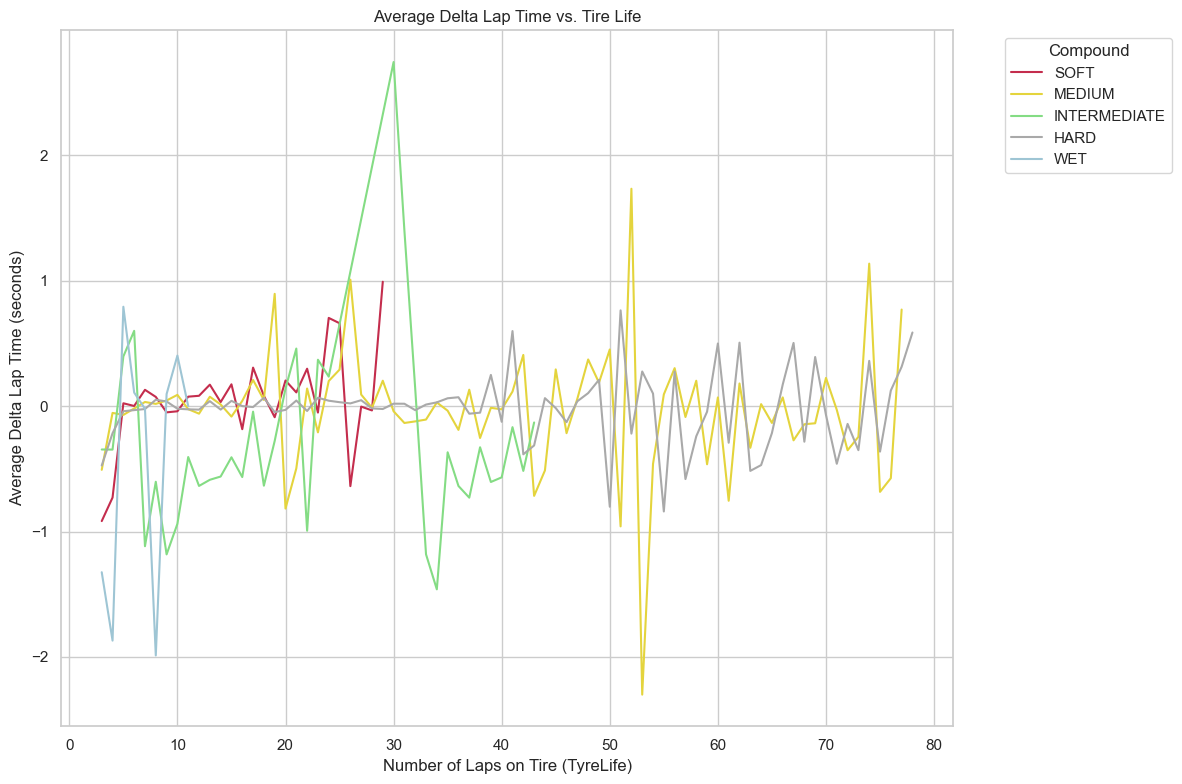

In [66]:
# Continue from the starter code and previous setup
tire_data_sorted = tire_data_filtered.sort_values(by=['Driver', 'Stint', 'LapNumber'])

# Calculate lap-to-lap difference in lap times within each stint
tire_data_sorted['DeltaLapTime'] = tire_data_sorted.groupby(['EventName', 'Driver', 'Stint'])['LapTime'].diff()

# Remove the first lap of each stint since it has no previous lap to compare
tire_data_sorted = tire_data_sorted.dropna(subset=['DeltaLapTime'])

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=tire_data_sorted,
    x='TyreLife',
    y='DeltaLapTime',
    hue='Compound',
    estimator='mean',
    ci=None,
    palette=tire_colors
)
plt.title('Average Delta Lap Time vs. Tire Life')
plt.xlabel('Number of Laps on Tire (TyreLife)')
plt.ylabel('Average Delta Lap Time (seconds)')
plt.legend(title='Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [67]:
# Continue from the starter code and previous setup
tire_data_sorted = tire_data_filtered.sort_values(by=['EventName', 'Driver', 'Stint', 'LapNumber'])

# Convert 'Stint' to string for plotting purposes
tire_data_sorted['Stint'] = tire_data_sorted['Stint'].astype(str)

# Calculate lap-to-lap difference in lap times within each stint
tire_data_sorted['DeltaLapTime'] = tire_data_sorted.groupby(['EventName', 'Driver', 'Stint'])['LapTime'].diff()

# Remove the first lap of each stint since it has no previous lap to compare
tire_data_sorted = tire_data_sorted.dropna(subset=['DeltaLapTime'])

# Remove outliers from 'DeltaLapTime' using the IQR method

# Calculate Q1 and Q3 for 'DeltaLapTime'
Q1 = tire_data_sorted['DeltaLapTime'].quantile(0.25)
Q3 = tire_data_sorted['DeltaLapTime'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range for 'DeltaLapTime'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
tire_data_no_outliers = tire_data_sorted[
    (tire_data_sorted['DeltaLapTime'] >= lower_bound) &
    (tire_data_sorted['DeltaLapTime'] <= upper_bound)
]

tire_data_no_outliers = tire_data_no_outliers.sort_values(by=['EventName', 'Driver', 'Stint', 'LapNumber'])

# Define the window size for the moving average (e.g., 3 laps)
window_size = 3

# Compute the moving average within each group
tire_data_no_outliers['DeltaLapTime_MA'] = tire_data_no_outliers.groupby(['EventName', 'Driver', 'Stint'])['DeltaLapTime'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

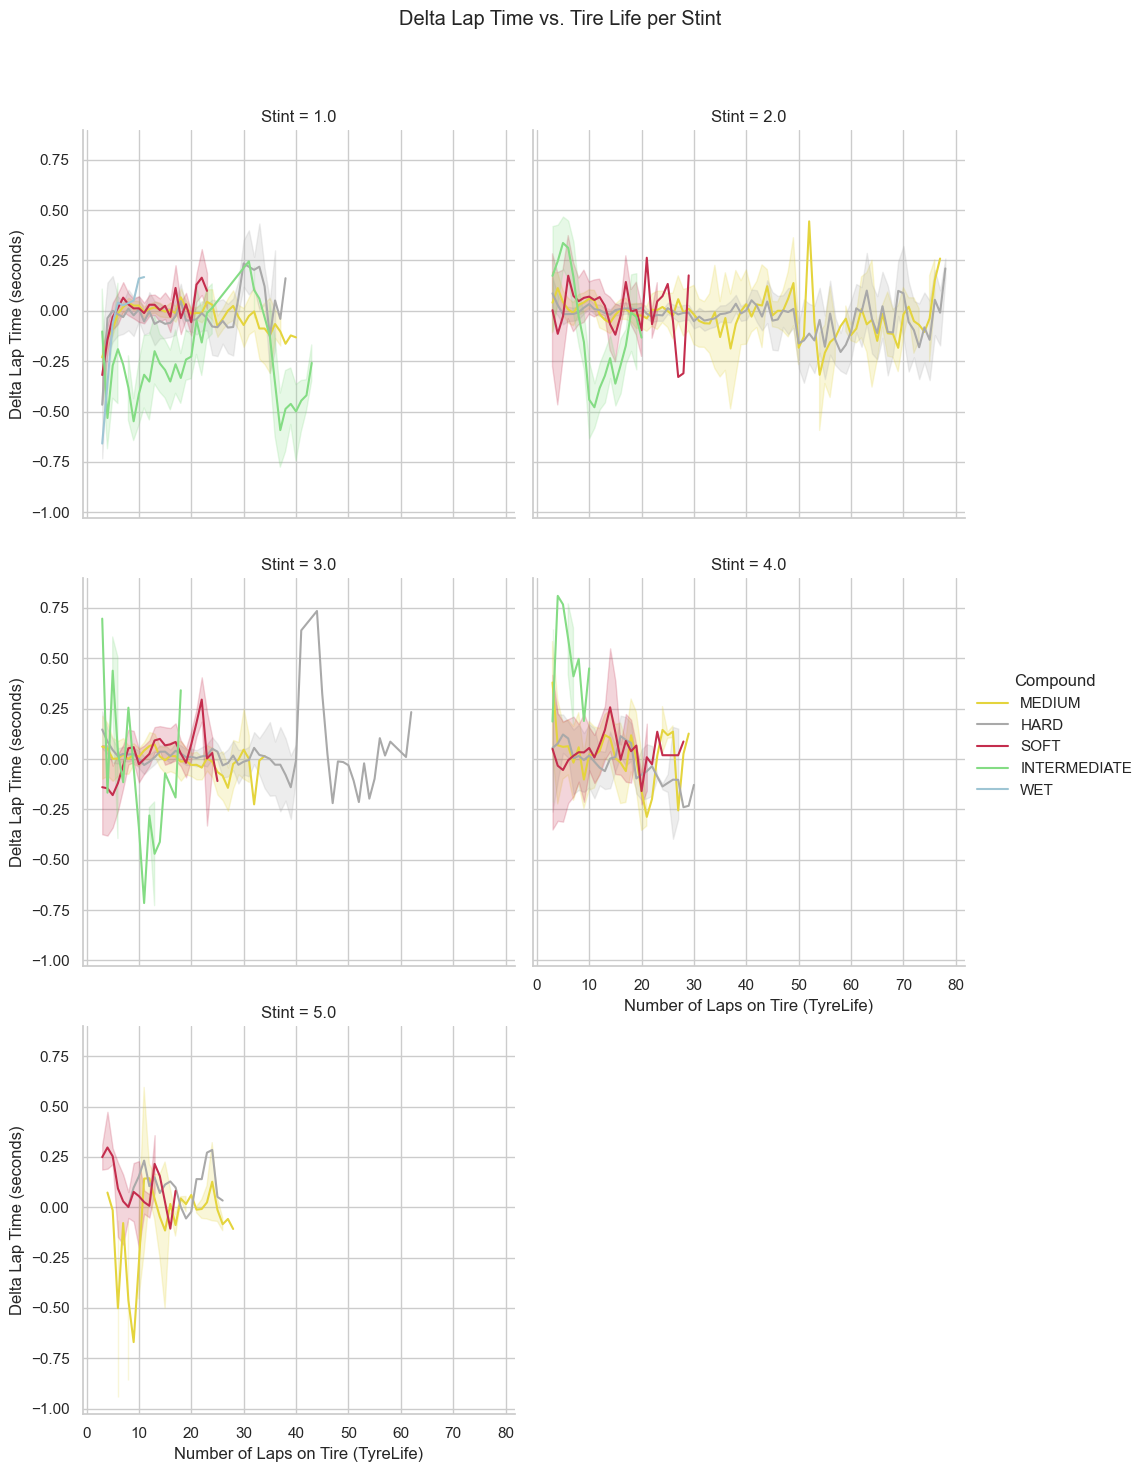

In [68]:
# Plotting with FacetGrid
g = sns.FacetGrid(
    tire_data_no_outliers,
    col='Stint',
    hue='Compound',
    col_wrap=2,
    height=5,
    palette=tire_colors,
    sharex=True,
    sharey=True
)
g.map(sns.lineplot, 'TyreLife', 'DeltaLapTime_MA')
g.add_legend(title='Compound')
g.set_axis_labels('Number of Laps on Tire (TyreLife)', 'Delta Lap Time (seconds)')
g.fig.suptitle('Delta Lap Time vs. Tire Life per Stint')
g.fig.subplots_adjust(top=0.9)
plt.show()

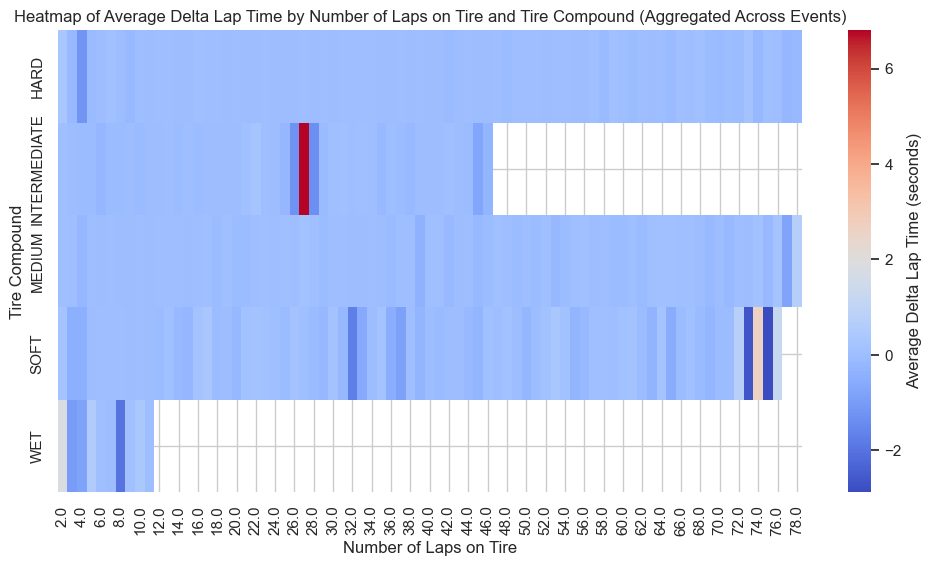

In [69]:
# Sort the data by Event and LapNumber to compute delta lap time
tire_data_filtered = tire_data_filtered.sort_values(by=['EventName', 'Compound', 'LapNumber'])

# Compute the delta lap time (difference from the previous lap)
tire_data_filtered['DeltaLapTime'] = tire_data_filtered.groupby(['EventName', 'Compound'])['LapTime'].diff()

# Group by compound and lap number to calculate the average delta lap time
avg_delta_lap_time = tire_data_filtered.groupby(['Compound', 'LapNumber'])['DeltaLapTime'].mean().reset_index()

heatmap_data = avg_delta_lap_time.pivot(index='Compound', columns='LapNumber', values='DeltaLapTime')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Average Delta Lap Time (seconds)'})

plt.xlabel('Number of Laps on Tire')
plt.ylabel('Tire Compound')
plt.title('Heatmap of Average Delta Lap Time by Number of Laps on Tire and Tire Compound (Aggregated Across Events)')

plt.show()

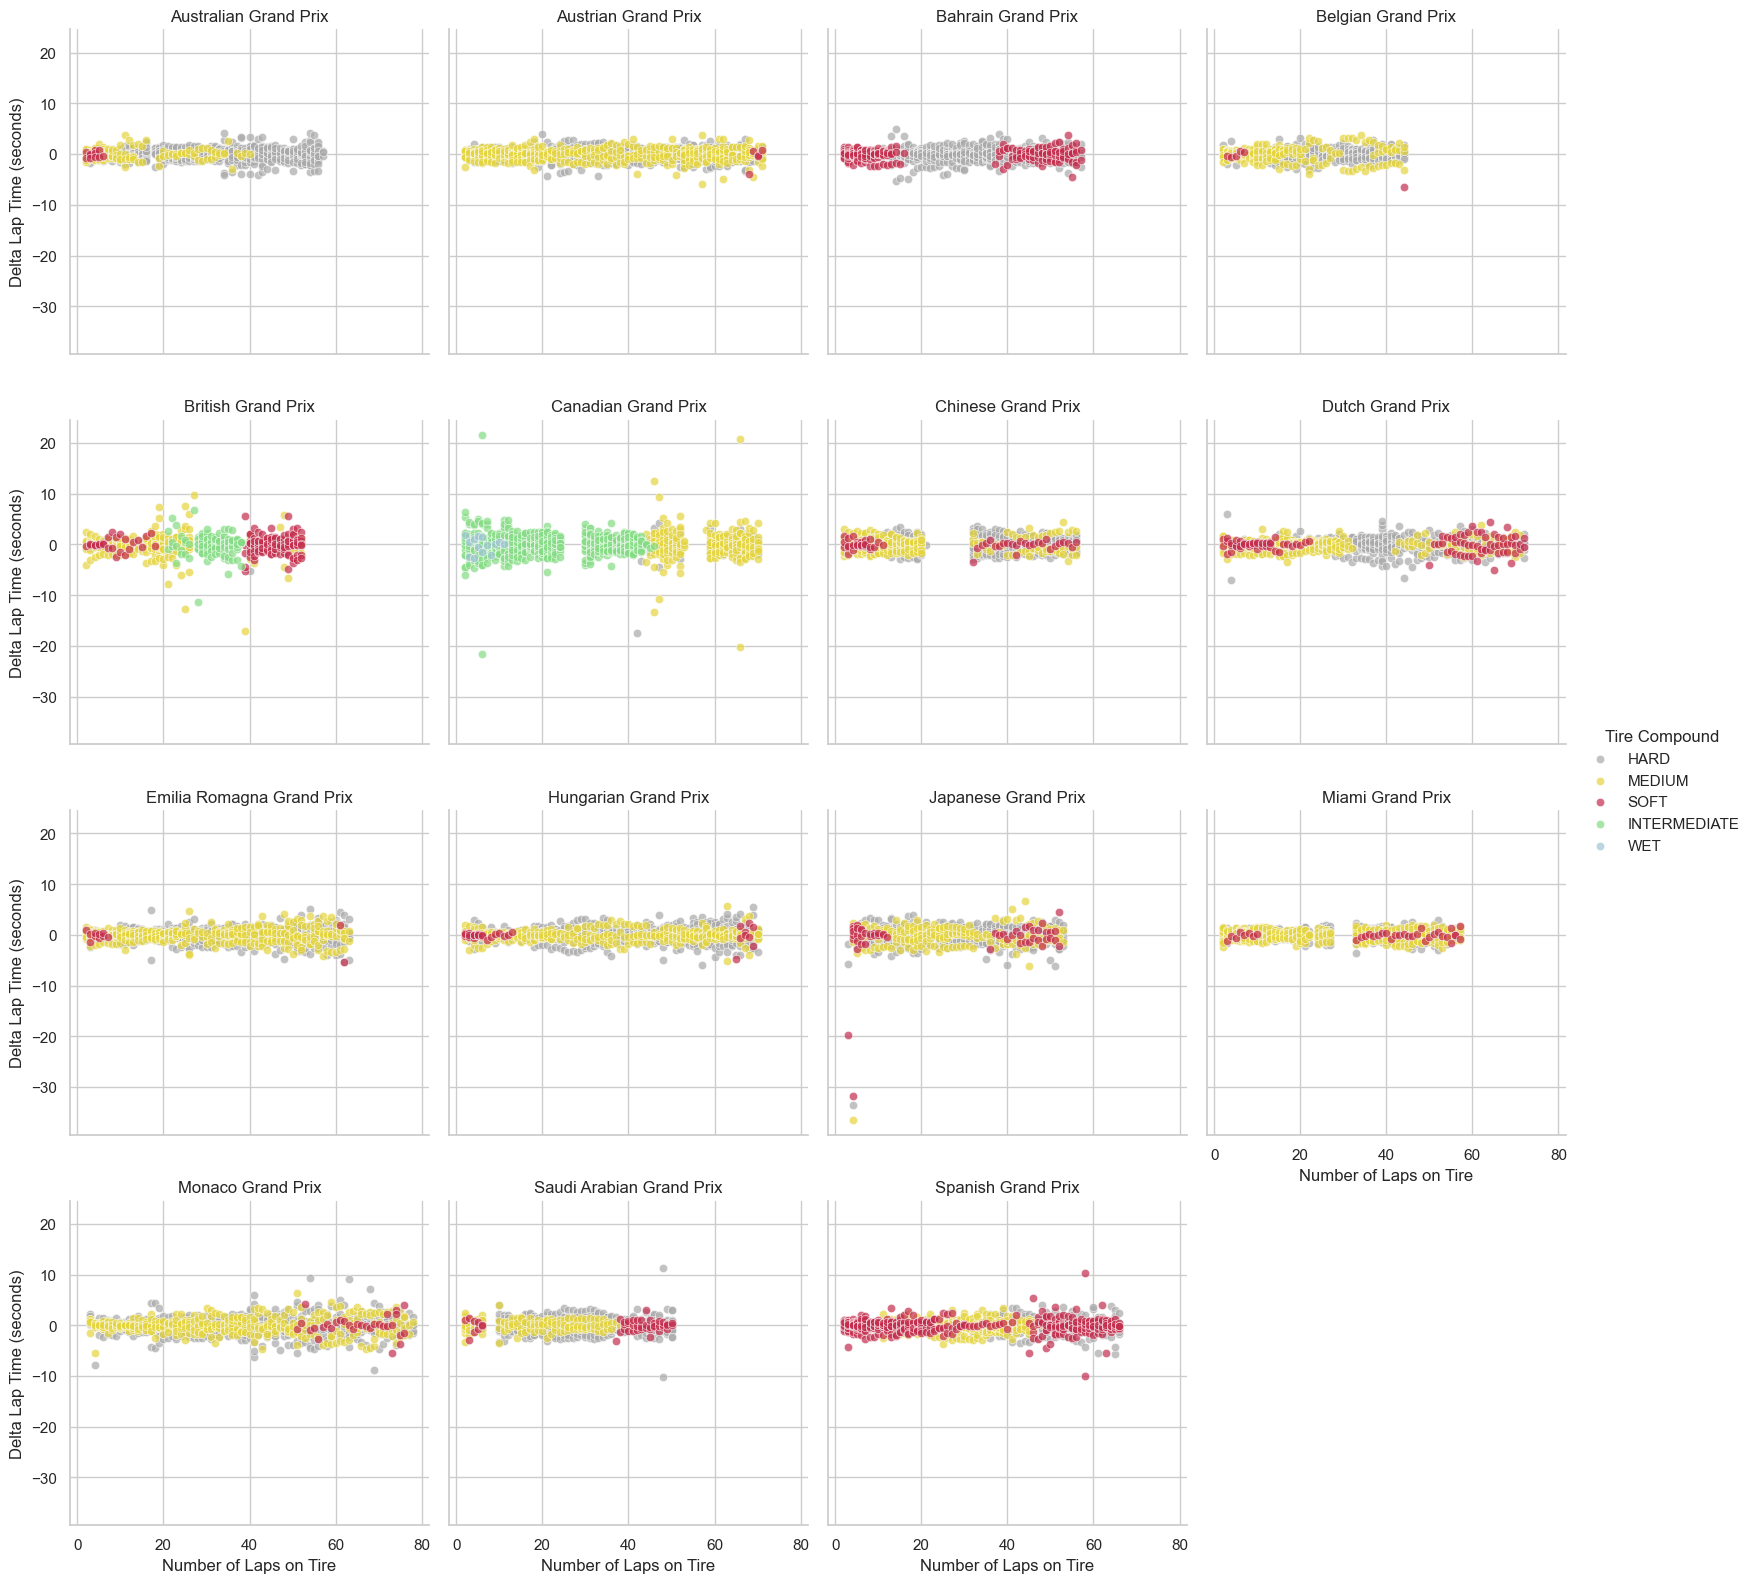

In [70]:
# Create a faceted scatter plot with color palette for tire compounds
g = sns.FacetGrid(tire_data_filtered, col='EventName', col_wrap=4, height=4, sharex=True, sharey=True, hue='Compound', palette=tire_colors)

# Add the scatter plot to each facet
g.map(sns.scatterplot, 'LapNumber', 'DeltaLapTime', alpha=0.7)

# Adjust labels and titles
g.set_axis_labels('Number of Laps on Tire', 'Delta Lap Time (seconds)')
g.set_titles(col_template="{col_name}")
g.add_legend(title='Tire Compound')

# Show the plot
plt.show()

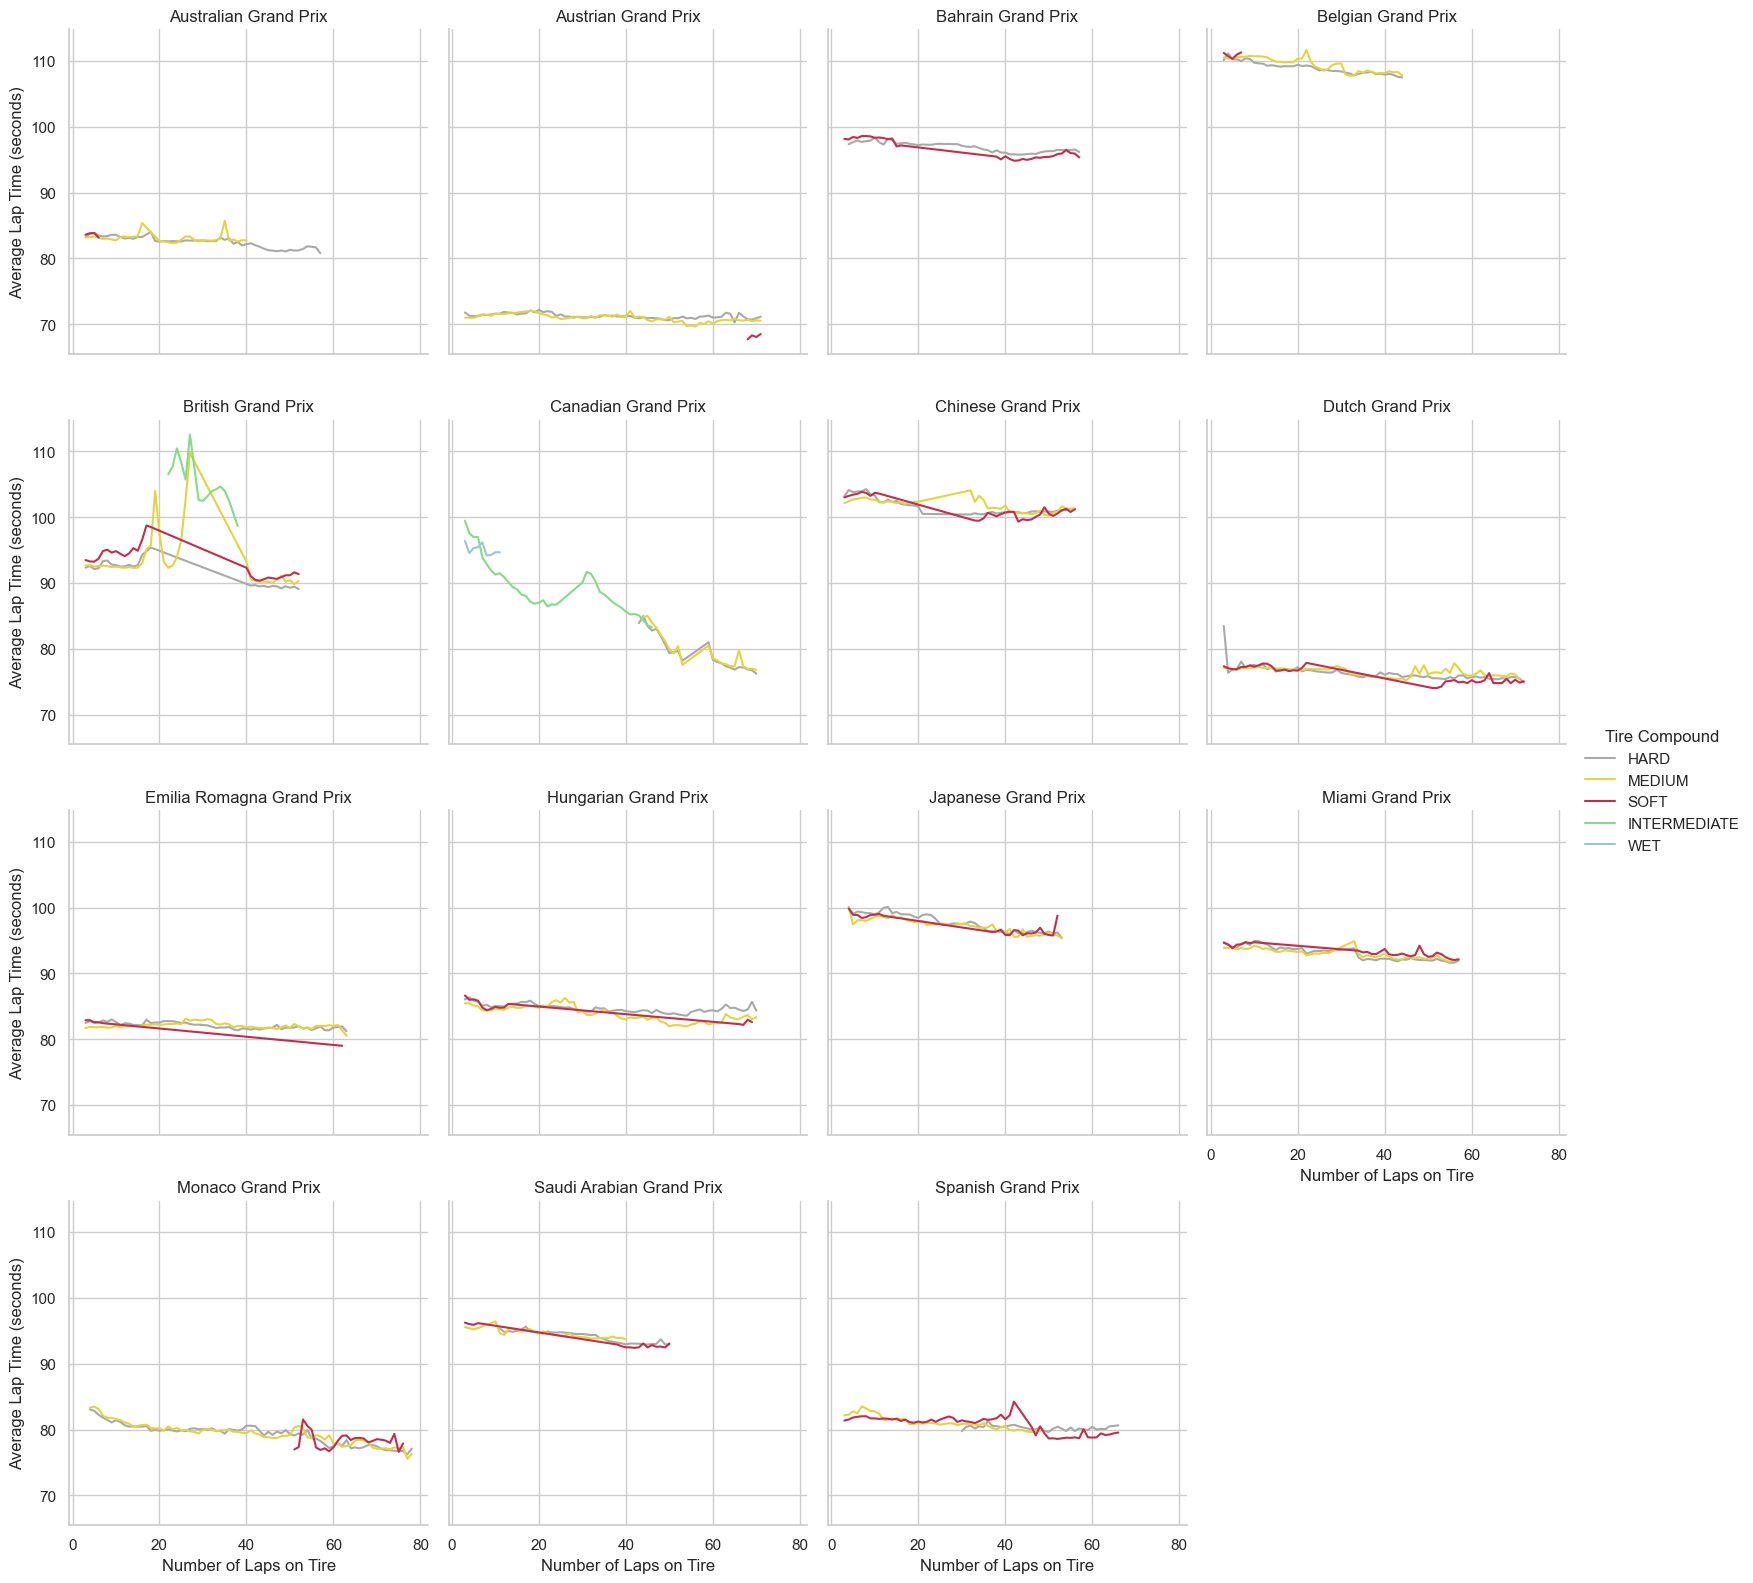

In [71]:
# First, group by event, tire compound, and lap number to get the average lap time
avg_lap_time_event = tire_data_sorted.groupby(['EventName', 'Compound', 'LapNumber'])['LapTime'].mean().reset_index()

g = sns.FacetGrid(avg_lap_time_event, col='EventName', col_wrap=4, height=4, hue='Compound', palette=tire_colors)

g.map(sns.lineplot, 'LapNumber', 'LapTime').add_legend(title='Tire Compound')

g.set_axis_labels('Number of Laps on Tire', 'Average Lap Time (seconds)')
g.set_titles(col_template="{col_name}")

plt.show()

## Number of Stops vs Final Position

In [72]:
result_df = pd.read_csv("../data/races_2024/result_2024.csv")

In [73]:
result_df.columns

Index(['EventName', 'DriverNumber', 'BroadcastName', 'Abbreviation',
       'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName',
       'FullName', 'HeadshotUrl', 'CountryCode', 'Position',
       'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time',
       'Status', 'Points'],
      dtype='object')

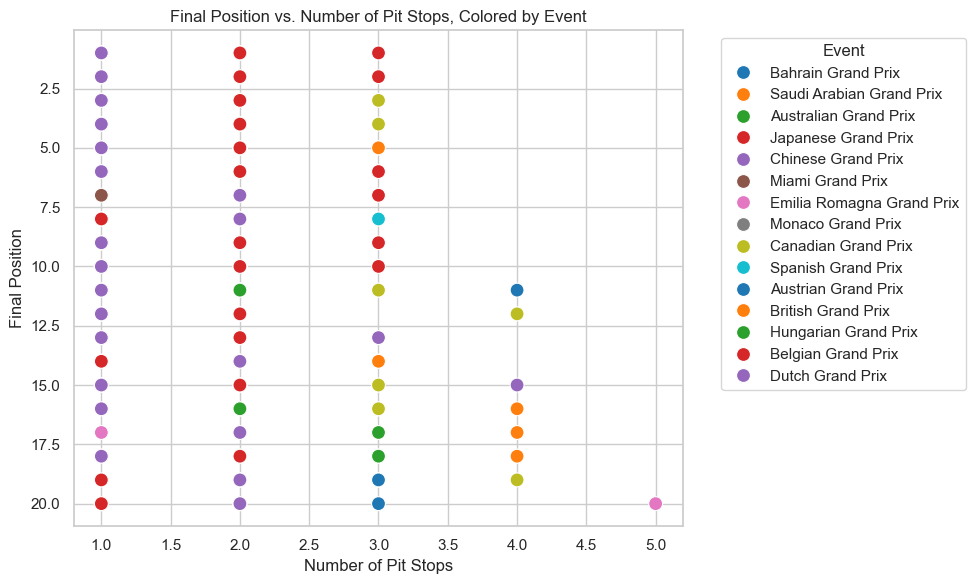

In [74]:
# Step 1: Count the number of pit stops for each driver in each event
pit_stop_counts = lap_data.dropna(subset=['PitInTime']).groupby(['EventName', 'Driver']).size().reset_index(name='PitStops')

# Step 2: Merge the result_df with the pit stop counts to include final positions and event info
merged_df = pd.merge(result_df, pit_stop_counts, left_on=['EventName', 'Abbreviation'], right_on=['EventName', 'Driver'], how='left')

# Step 3: Drop rows with missing final positions and pit stops
filtered_df = merged_df.dropna(subset=['Position', 'PitStops'])

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='PitStops', y='Position', hue='EventName', palette='tab10', s=100)

plt.title('Final Position vs. Number of Pit Stops, Colored by Event')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Final Position')
plt.gca().invert_yaxis()  # Invert y-axis to show 1st position at the top
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

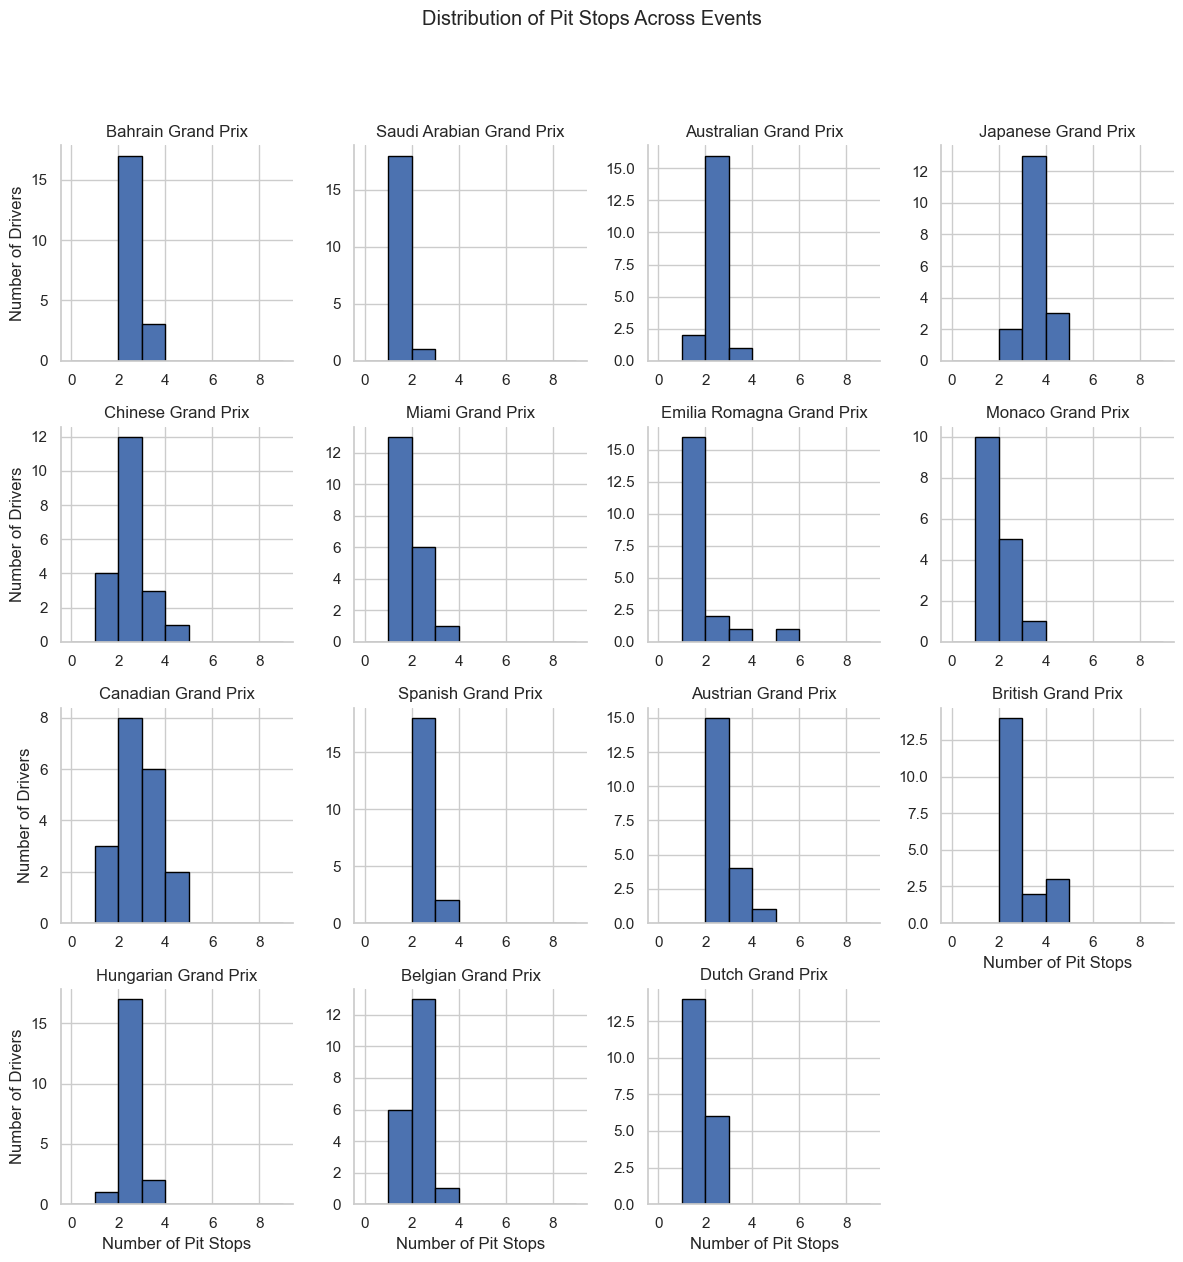

In [75]:
# Step 1: Plot the faceted histogram for each event
g = sns.FacetGrid(filtered_df, col="EventName", col_wrap=4, height=3, sharex=False, sharey=False)

# Step 2: Map a histogram to each facet
g.map(plt.hist, 'PitStops', bins=range(0, 10), color='b', edgecolor='black')

# Step 3: Customize the plot
g.set_titles("{col_name}")
g.set_axis_labels('Number of Pit Stops', 'Number of Drivers')
g.fig.suptitle('Distribution of Pit Stops Across Events', y=1.05)

plt.tight_layout()
plt.show()

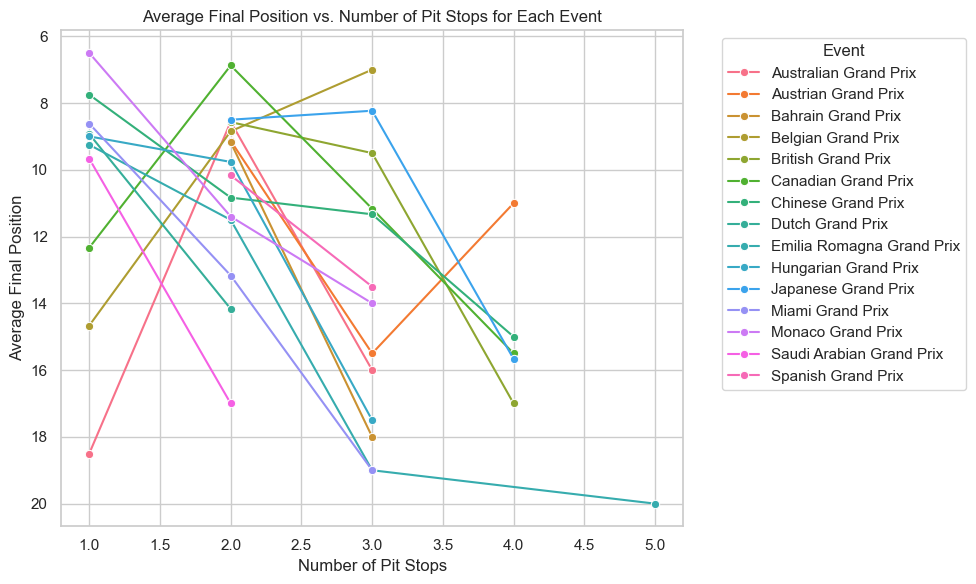

In [76]:
# Calculate the average final position for each number of pit stops in each event
average_position = filtered_df.groupby(['EventName', 'PitStops'])['Position'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=average_position, x='PitStops', y='Position', hue='EventName', marker='o')

plt.title('Average Final Position vs. Number of Pit Stops for Each Event')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Average Final Position')
plt.gca().invert_yaxis()  # Invert y-axis to show better positions (lower numbers) at the top
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

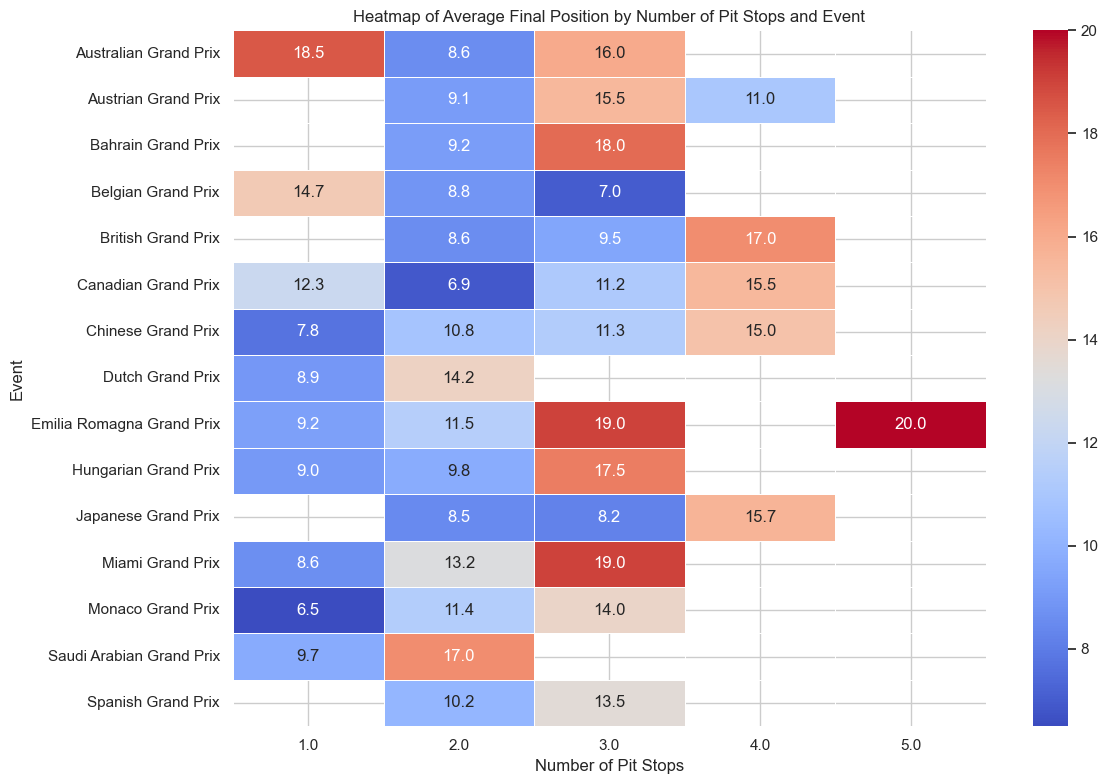

In [77]:
heatmap_data = average_position.pivot(index='EventName', columns='PitStops', values='Position')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)

plt.title('Heatmap of Average Final Position by Number of Pit Stops and Event')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Event')

plt.tight_layout()
plt.show()

In [78]:
heatmap_data

PitStops                         1.0        2.0        3.0        4.0   5.0
EventName                                                                  
Australian Grand Prix      18.500000   8.562500  16.000000        NaN   NaN
Austrian Grand Prix              NaN   9.133333  15.500000  11.000000   NaN
Bahrain Grand Prix               NaN   9.176471  18.000000        NaN   NaN
Belgian Grand Prix         14.666667   8.846154   7.000000        NaN   NaN
British Grand Prix               NaN   8.571429   9.500000  17.000000   NaN
Canadian Grand Prix        12.333333   6.875000  11.166667  15.500000   NaN
Chinese Grand Prix          7.750000  10.833333  11.333333  15.000000   NaN
Dutch Grand Prix            8.928571  14.166667        NaN        NaN   NaN
Emilia Romagna Grand Prix   9.250000  11.500000  19.000000        NaN  20.0
Hungarian Grand Prix        9.000000   9.764706  17.500000        NaN   NaN
Japanese Grand Prix              NaN   8.500000   8.230769  15.666667   NaN
Miami Grand Prix            8.615385  13.166667  19.000000        NaN   NaN
Monaco Grand Prix           6.500000  11.400000  14.000000        NaN   NaN
Saudi Arabian Grand Prix    9.666667  17.000000        NaN        NaN   NaN
Spanish Grand Prix               NaN  10.166667  13.500000        NaN   NaN

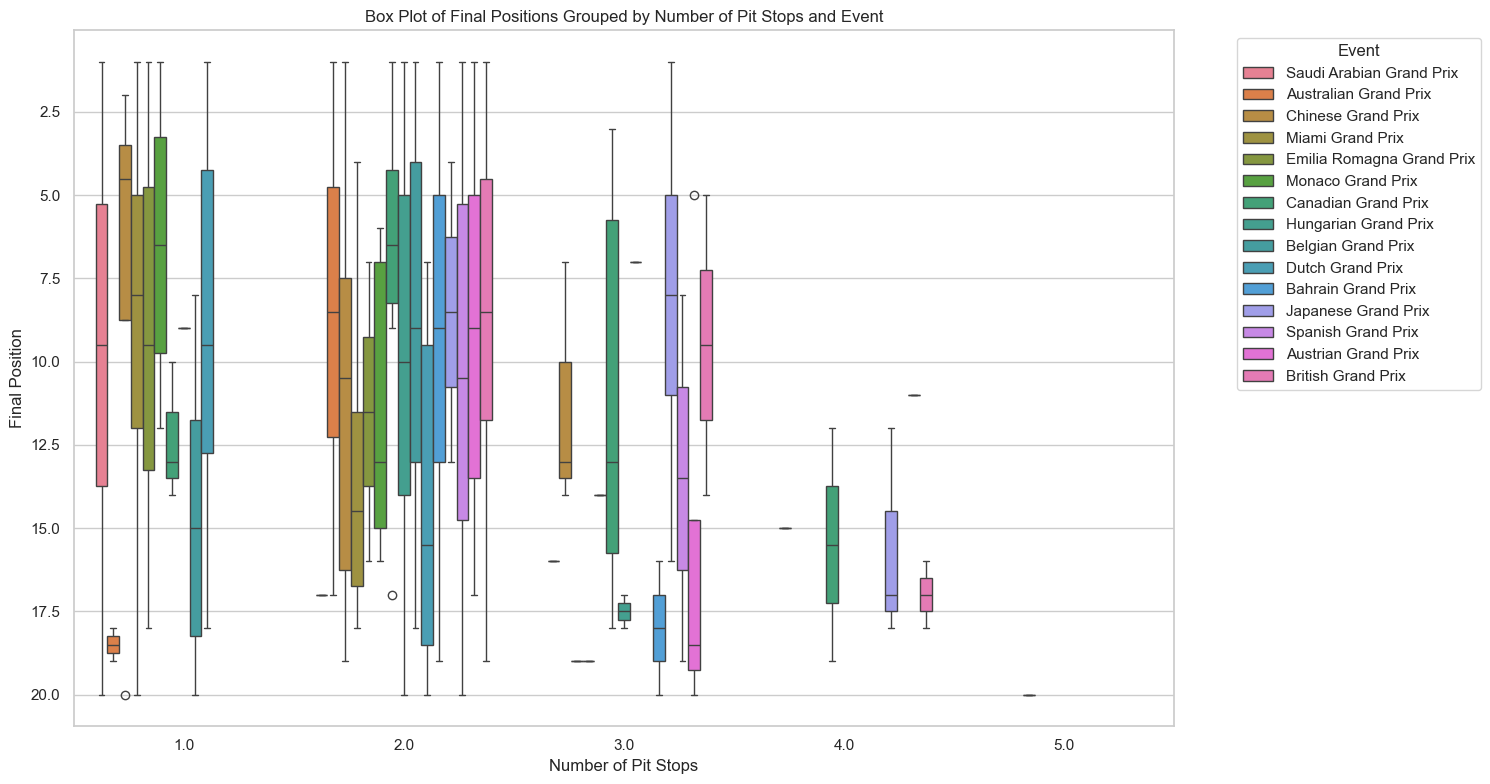

In [79]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=filtered_df, x='PitStops', y='Position', hue='EventName')

plt.title('Box Plot of Final Positions Grouped by Number of Pit Stops and Event')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Final Position')
plt.gca().invert_yaxis()  # Invert y-axis to show better positions at the top

plt.tight_layout()
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Race Length vs Strategy

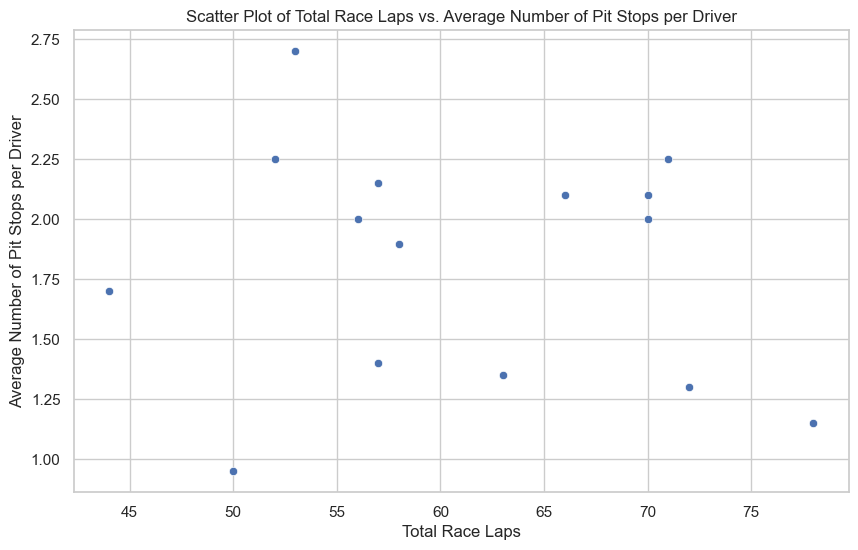

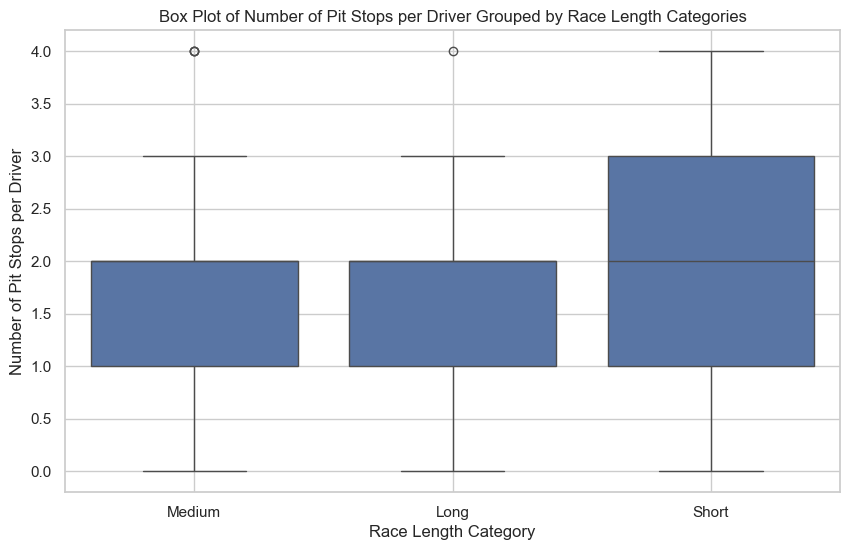

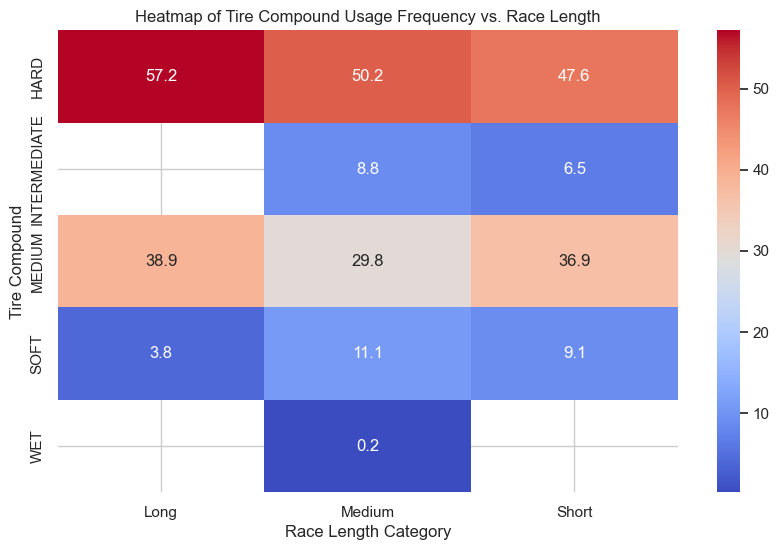

Columns in sankey_lap_data after merge: Index(['EventName', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate', 'RaceLengthCategory'],
      dtype='object')
Columns in compound_transitions: Index(['EventName', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapS

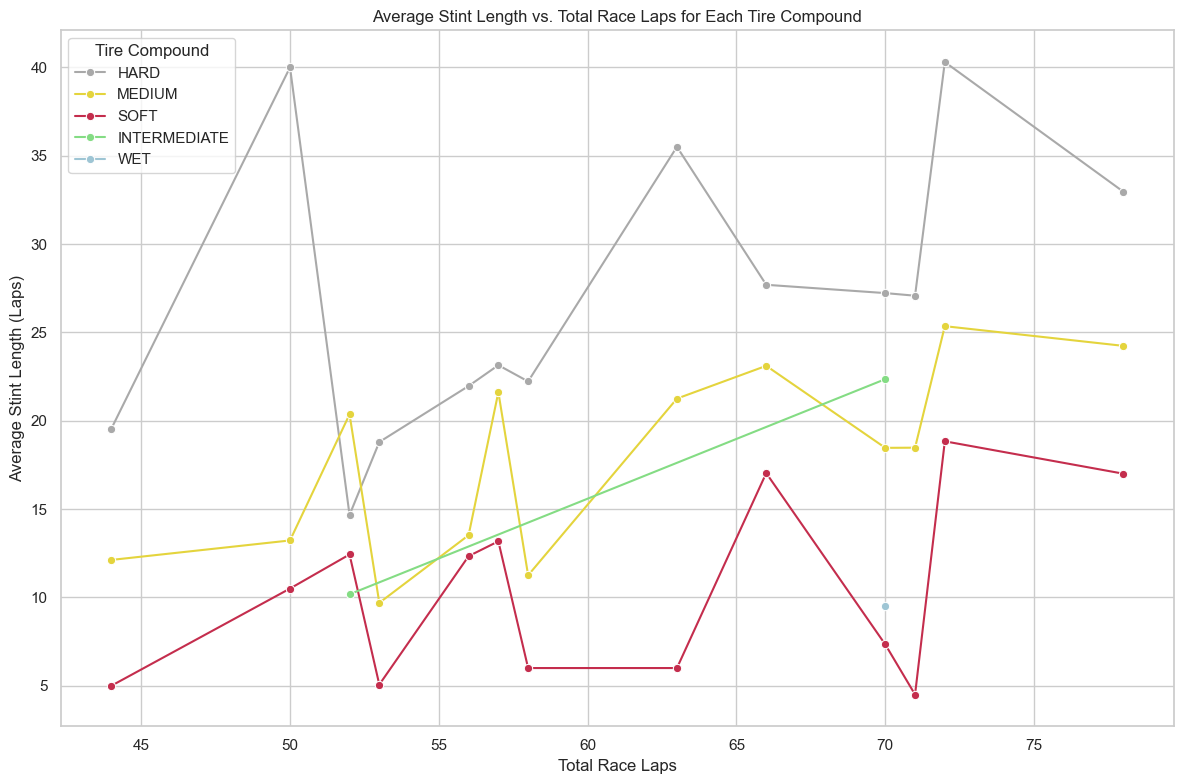

In [80]:
## Race Length vs Strategy
total_laps_per_race = lap_data.groupby('EventName')['LapNumber'].max().reset_index()
total_laps_per_race.columns = ['EventName', 'TotalLaps']

# Pit stops are defined as changes in stint, so we calculate pit stops per driver and then average per race.
# Subtract 1 from the stint count to get pit stops.
pit_stops_per_driver = lap_data.groupby(['EventName', 'Driver'])['Stint'].nunique().reset_index()
pit_stops_per_driver['PitStops'] = pit_stops_per_driver['Stint'] - 1

# Calculate the average number of pit stops per race
avg_pit_stops_per_race = pit_stops_per_driver.groupby('EventName')['PitStops'].mean().reset_index()
avg_pit_stops_per_race.columns = ['EventName', 'AvgPitStops']

race_stats = pd.merge(total_laps_per_race, avg_pit_stops_per_race, on='EventName')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalLaps', y='AvgPitStops', data=race_stats)

plt.title('Scatter Plot of Total Race Laps vs. Average Number of Pit Stops per Driver')
plt.xlabel('Total Race Laps')
plt.ylabel('Average Number of Pit Stops per Driver')
plt.grid(True)
plt.show()
total_laps_per_race.describe()
# Define Race Length Categories
def categorize_race_length(total_laps):
    if total_laps <= 54:
        return 'Short'
    elif 55 <= total_laps <= 70:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create a 'RaceLengthCategory' column in the total_laps_per_race DataFrame
total_laps_per_race['RaceLengthCategory'] = total_laps_per_race['TotalLaps'].apply(categorize_race_length)

pit_stops_with_length_category = pd.merge(pit_stops_per_driver, total_laps_per_race[['EventName', 'RaceLengthCategory']], on='EventName')

# Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='RaceLengthCategory', y='PitStops', data=pit_stops_with_length_category)

plt.title('Box Plot of Number of Pit Stops per Driver Grouped by Race Length Categories')
plt.xlabel('Race Length Category')
plt.ylabel('Number of Pit Stops per Driver')
plt.grid(True)
plt.show()
# Create a dataset to calculate the number of laps per tire compound in each race length category
# First, merge lap data with race length categories
lap_data_with_length_category = pd.merge(lap_data, total_laps_per_race[['EventName', 'RaceLengthCategory']], on='EventName')

# Group by race length category and tire compound to count laps
compound_usage = lap_data_with_length_category.groupby(['RaceLengthCategory', 'Compound'])['LapNumber'].count().reset_index()
compound_usage.columns = ['RaceLengthCategory', 'Compound', 'LapCount']

# Normalize frequencies (percentage of total laps within each race length category)
total_laps_per_category = lap_data_with_length_category.groupby('RaceLengthCategory')['LapNumber'].count().reset_index()
total_laps_per_category.columns = ['RaceLengthCategory', 'TotalLaps']

# Merge with the compound usage data
compound_usage = pd.merge(compound_usage, total_laps_per_category, on='RaceLengthCategory')
compound_usage['LapPercentage'] = (compound_usage['LapCount'] / compound_usage['TotalLaps']) * 100

# Pivot the data to create a matrix for the heatmap
compound_usage_pivot = compound_usage.pivot(index='Compound', columns='RaceLengthCategory', values='LapPercentage')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(compound_usage_pivot, annot=True, cmap='coolwarm', fmt=".1f")

plt.title('Heatmap of Tire Compound Usage Frequency vs. Race Length')
plt.xlabel('Race Length Category')
plt.ylabel('Tire Compound')
plt.show()
sankey_lap_data = lap_data.copy(deep=True)  
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Calculate Total Laps per Race
# Adjust column name if necessary
total_laps_per_race = sankey_lap_data.groupby('EventName')['LapNumber'].max().reset_index()
total_laps_per_race.columns = ['EventName', 'TotalLaps']

# Define Race Length Categories
conditions = [
    (total_laps_per_race['TotalLaps'] <= 50),
    (total_laps_per_race['TotalLaps'] > 50) & (total_laps_per_race['TotalLaps'] <= 70),
    (total_laps_per_race['TotalLaps'] > 70)
]
choices = ['Short', 'Medium', 'Long']
total_laps_per_race['RaceLengthCategory'] = np.select(conditions, choices, default='Unknown')

# Merge RaceLengthCategory back into sankey_lap_data
sankey_lap_data = sankey_lap_data.merge(
    total_laps_per_race[['EventName', 'RaceLengthCategory']],
    on='EventName',
    how='left'
)

# Verify 'RaceLengthCategory' is in sankey_lap_data
print("Columns in sankey_lap_data after merge:", sankey_lap_data.columns)

# Record Compound Transitions for each driver
lap_data_sorted = sankey_lap_data.sort_values(by=['EventName', 'Driver', 'LapNumber'])

# Ensure 'Compound' and 'NextCompound' are in uppercase to match tire_colors keys
lap_data_sorted['Compound'] = lap_data_sorted['Compound'].str.upper()
lap_data_sorted['NextCompound'] = lap_data_sorted.groupby(['EventName', 'Driver'])['Compound'].shift(-1)

# Filter for actual compound transitions
compound_transitions = lap_data_sorted[lap_data_sorted['Compound'] != lap_data_sorted['NextCompound']]

# Remove rows where NextCompound is NaN (last lap)
compound_transitions = compound_transitions.dropna(subset=['NextCompound'])

# Verify 'RaceLengthCategory' is in compound_transitions
print("Columns in compound_transitions:", compound_transitions.columns)

# Aggregate the transitions per race length category
transition_counts = compound_transitions.groupby(['RaceLengthCategory', 'Compound', 'NextCompound']).size().reset_index(name='Count')

# Create Sankey Diagrams for each race length category
def create_sankey_diagram(category):
    category_data = transition_counts[transition_counts['RaceLengthCategory'] == category]
    
    if category_data.empty:
        print(f"No data available for {category} races.")
        return
    
    # Get unique compounds to define nodes
    compounds = list(set(category_data['Compound']).union(set(category_data['NextCompound'])))
    # Create mapping from compound name to index
    compound_indices = {compound: i for i, compound in enumerate(compounds)}
    
    # Map compounds to colors
    node_colors = [tire_colors.get(compound, '#000000') for compound in compounds]  # Default to black if compound not found
    
    # Define the nodes
    node = dict(
        label = compounds,
        pad = 20,
        thickness = 20,
        color = node_colors
    )
    
    # Define the links
    source = category_data['Compound'].map(compound_indices)
    target = category_data['NextCompound'].map(compound_indices)
    value = category_data['Count']
    
    # Map link colors to source compound colors
    link_colors = category_data['Compound'].map(tire_colors).fillna('#888888')  # Default to grey if compound not found
    
    link = dict(
        source = source,
        target = target,
        value = value,
        color = link_colors
    )
    
    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=node,
        link=link
    )])
    
    fig.update_layout(title_text=f'Sankey Diagram of Tire Compound Transitions - {category} Races', font_size=12)
    fig.show()

# Generate Sankey Diagrams for each race length category
for category in ['Short', 'Medium', 'Long']:
    create_sankey_diagram(category)
def create_sankey_diagram_all():
    category_data = transition_counts
    
    if category_data.empty:
        print(f"No data available for {category} races.")
        return
    
    # Get unique compounds to define nodes
    compounds = list(set(category_data['Compound']).union(set(category_data['NextCompound'])))
    # Create mapping from compound name to index
    compound_indices = {compound: i for i, compound in enumerate(compounds)}
    
    # Map compounds to colors
    node_colors = [tire_colors.get(compound, '#000000') for compound in compounds]  # Default to black if compound not found
    
    # Define the nodes
    node = dict(
        label = compounds,
        pad = 20,
        thickness = 20,
        color = node_colors
    )
    
    # Define the links
    source = category_data['Compound'].map(compound_indices)
    target = category_data['NextCompound'].map(compound_indices)
    value = category_data['Count']
    
    # Map link colors to source compound colors
    link_colors = category_data['Compound'].map(tire_colors).fillna('#888888')  # Default to grey if compound not found
    
    link = dict(
        source = source,
        target = target,
        value = value,
        color = link_colors
    )
    
    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=node,
        link=link
    )])
    
    fig.update_layout(title_text=f'Sankey Diagram of Tire Compound Transitions - All Races', font_size=12)
    fig.show()

create_sankey_diagram_all()
sankey_lap_data = lap_data.copy(deep=True)  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorize_race_length function if not already defined
def categorize_race_length(total_laps):
    if total_laps <= 54:
        return 'Short'
    elif 55 <= total_laps <= 70:
        return 'Medium'
    else:
        return 'Long'

# Calculate Total Laps per Race
total_laps_per_race = sankey_lap_data.groupby('EventName')['LapNumber'].max().reset_index()
total_laps_per_race.columns = ['EventName', 'TotalLaps']

# Categorize race lengths
total_laps_per_race['RaceLengthCategory'] = total_laps_per_race['TotalLaps'].apply(categorize_race_length)

# Merge lap data with race length categories
lap_data_with_length_category = pd.merge(
    sankey_lap_data,
    total_laps_per_race[['EventName', 'TotalLaps', 'RaceLengthCategory']],
    on='EventName',
    how='left'
)

# Ensure 'Compound' is uppercase to match the tire colors dictionary
lap_data_with_length_category['Compound'] = lap_data_with_length_category['Compound'].str.upper()

# Calculate the length of each stint for each driver
# Use 'lap_data_with_length_category' instead of 'sankey_lap_data'
stint_lengths = lap_data_with_length_category.groupby(
    ['EventName', 'Driver', 'Stint', 'Compound', 'RaceLengthCategory', 'TotalLaps']
)['LapNumber'].count().reset_index()
stint_lengths.columns = [
    'EventName', 'Driver', 'Stint', 'Compound', 'RaceLengthCategory', 'TotalLaps', 'StintLength'
]

# Calculate the average stint length for each tire compound and total laps
average_stint_length = stint_lengths.groupby(
    ['TotalLaps', 'Compound']
)['StintLength'].mean().reset_index()
average_stint_length.rename(columns={'StintLength': 'AverageStintLength'}, inplace=True)

# Create the line plot with separate lines for each tire compound
plt.figure(figsize=(12, 8))

# Define your tire colors
tire_colors = {
    "MEDIUM": "#e4d43d",
    "INTERMEDIATE": "#84dc84",
    "HARD": "#A9A9A9",
    "WET": "#9ec5d4",
    "SOFT": "#c42d4d"
}

sns.lineplot(
    x='TotalLaps',
    y='AverageStintLength',
    hue='Compound',
    data=average_stint_length,
    marker='o',
    palette=tire_colors
)

plt.title('Average Stint Length vs. Total Race Laps for Each Tire Compound')
plt.xlabel('Total Race Laps')
plt.ylabel('Average Stint Length (Laps)')
plt.grid(True)
plt.legend(title='Tire Compound')
plt.tight_layout()
plt.show()

## Speed vs Tire Compounds

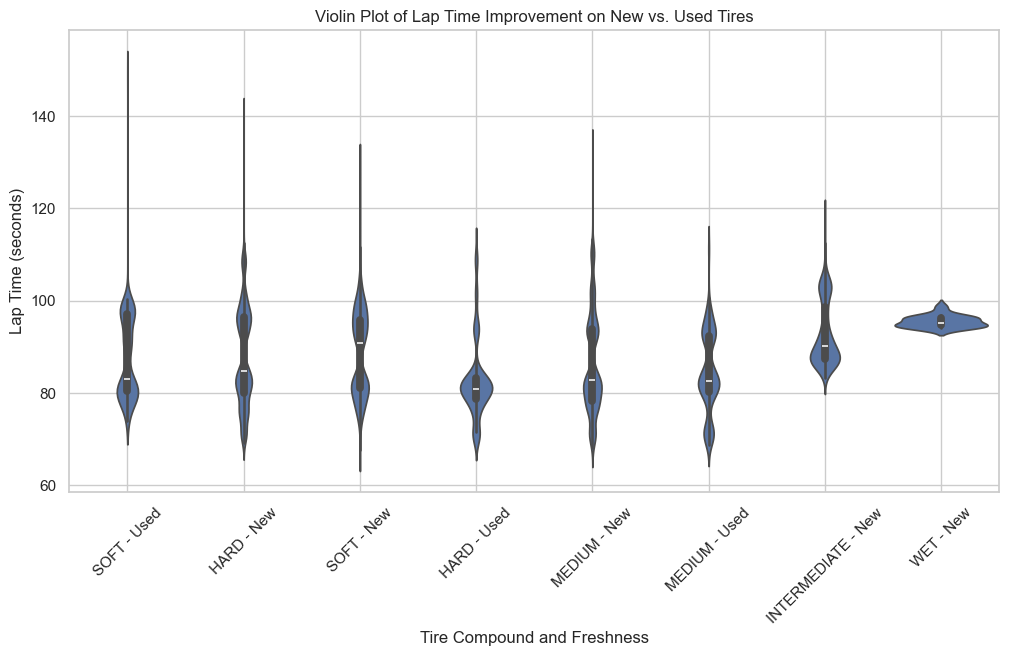

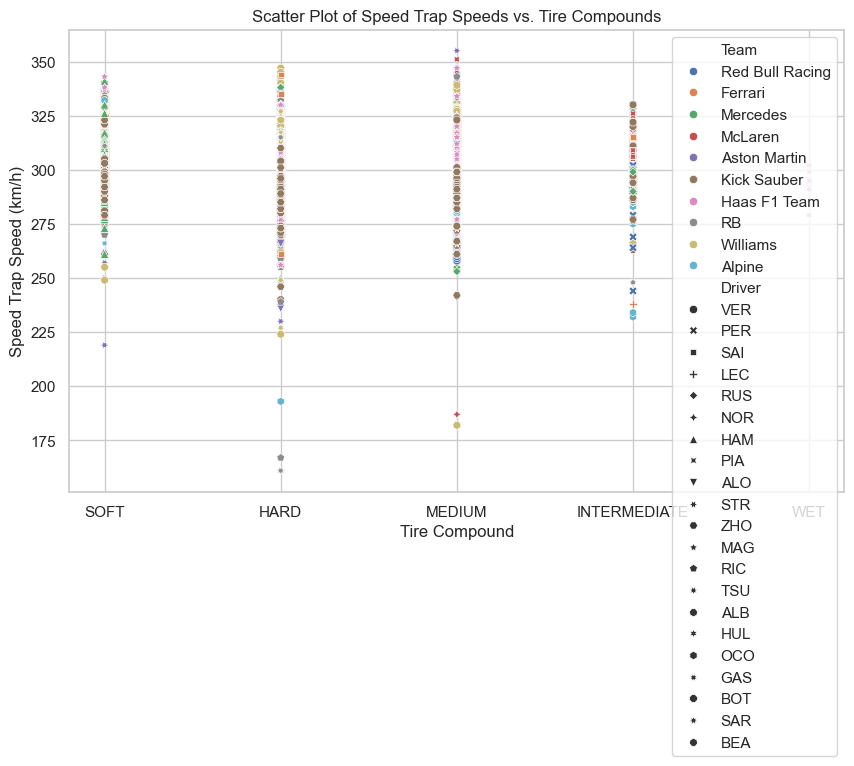

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2572807335.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2572807335.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zs/_wp7nlrd3nq3l3tsgwq3z86w0000gn/T/ipykernel_8147/2572807335.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

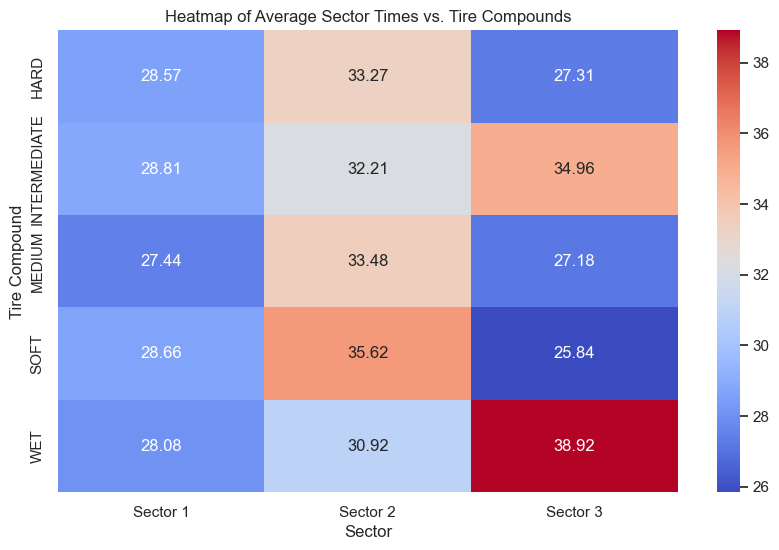

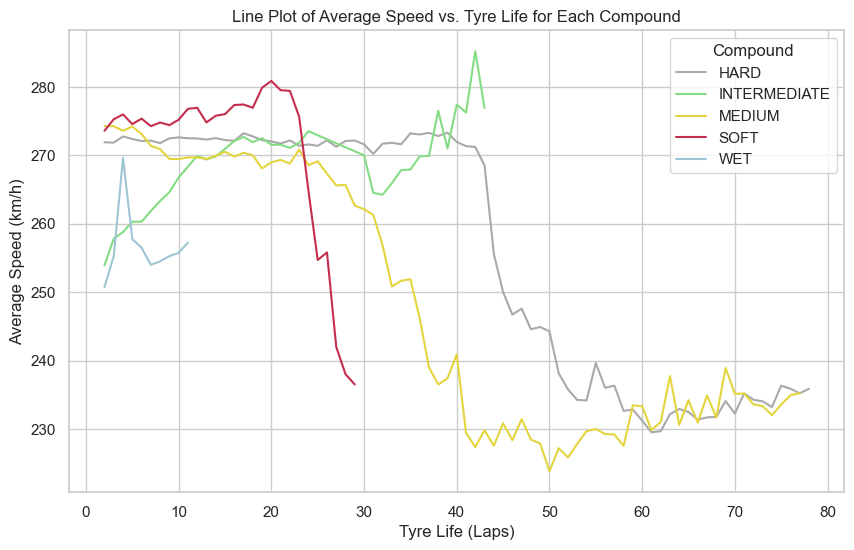

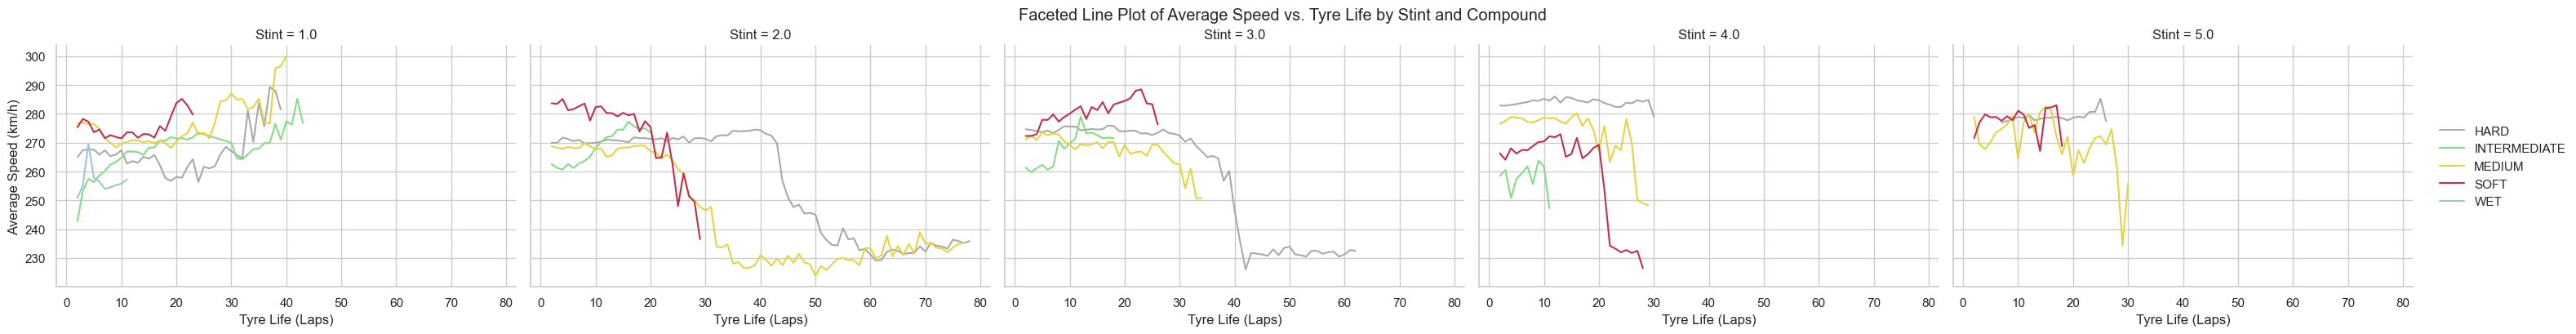

EventName DriverName                     Date    RPM  Speed   
0        Bahrain Grand Prix        VER  2024-03-02 15:03:42.390   9963      0  \
1        Bahrain Grand Prix        VER  2024-03-02 15:03:42.630   9755      0   
2        Bahrain Grand Prix        VER  2024-03-02 15:03:42.870   8495      3   
3        Bahrain Grand Prix        VER  2024-03-02 15:03:43.110   6815     11   
4        Bahrain Grand Prix        VER  2024-03-02 15:03:43.270   5695     17   
...                     ...        ...                      ...    ...    ...   
6064736    Dutch Grand Prix        ZHO  2024-08-25 14:34:32.883  10546    296   
6064737    Dutch Grand Prix        ZHO  2024-08-25 14:34:33.083  10546    298   
6064738    Dutch Grand Prix        ZHO  2024-08-25 14:34:33.283  10608    298   
6064739    Dutch Grand Prix        ZHO  2024-08-25 14:34:33.523  10644    298   
6064740    Dutch Grand Prix        ZHO  2024-08-25 14:34:33.763  10676    300   

         nGear  Throttle  Brake  DRS Source                    Time   
0            1        15   True    1    car  0 days 00:00:00.048000  \
1            1        15   True    1    car  0 days 00:00:00.288000   
2            1        15  False    1    car  0 days 00:00:00.528000   
3            1        15  False    1    car  0 days 00:00:00.768000   
4            1        15  False    1    car  0 days 00:00:00.928000   
...        ...       ...    ...  ...    ...                     ...   
6064736      8       100  False    0    car  0 days 01:31:20.811000   
6064737      8       100  False    0    car  0 days 01:31:21.011000   
6064738      8       100  False    0    car  0 days 01:31:21.211000   
6064739      8       100  False    0    car  0 days 01:31:21.451000   
6064740      8       100  False    0    car  0 days 01:31:21.691000   

                    SessionTime  
0        0 days 00:59:59.959000  
1        0 days 01:00:00.199000  
2        0 days 01:00:00.439000  
3        0 days 01:00:00.679000  
4        0 days 01:00:00.839000  
...                         ...  
6064736  0 days 02:28:56.245000  
6064737  0 days 02:28:56.445000  
6064738  0 days 02:28:56.645000  
6064739  0 days 02:28:56.885000  
6064740  0 days 02:28:57.125000  

[6064741 rows x 12 columns]

In [81]:
total_laps_per_race.columns
# Calculate Total Laps per Race
total_laps_per_race = lap_data_clean.groupby('EventName')['LapNumber'].max().reset_index()
total_laps_per_race.columns = ['EventName', 'TotalLaps']

# Define Race Length Categories
def categorize_race_length(total_laps):
    if total_laps <= 54:
        return 'Short'
    elif 55 <= total_laps <= 70:
        return 'Medium'
    else:
        return 'Long'

total_laps_per_race['RaceLengthCategory'] = total_laps_per_race['TotalLaps'].apply(categorize_race_length)

# Merge lap data with race length categories
lap_data_with_length_category = pd.merge(lap_data_clean, total_laps_per_race[['EventName', 'RaceLengthCategory']], on='EventName')

# Label tires as new or used based on the 'FreshTyre' column
lap_data_with_length_category['TyreStatus'] = lap_data_with_length_category['FreshTyre'].apply(lambda x: 'New' if x else 'Used')

# Combine tire compound and freshness into a single categorical variable
lap_data_with_length_category['CompoundAndStatus'] = lap_data_with_length_category['Compound'] + ' - ' + lap_data_with_length_category['TyreStatus']

# Convert LapTime from timedelta to seconds for easier plotting
lap_data_with_length_category['LapTimeSeconds'] = pd.to_timedelta(lap_data_with_length_category['LapTime']).dt.total_seconds()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='CompoundAndStatus', y='LapTimeSeconds', data=lap_data_with_length_category)

plt.title('Violin Plot of Lap Time Improvement on New vs. Used Tires')
plt.xlabel('Tire Compound and Freshness')
plt.ylabel('Lap Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Extract relevant data for the scatter plot (SpeedST and Compound)
speed_trap_data = lap_data_clean[['Compound', 'SpeedST', 'Driver', 'Team']].dropna()

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Compound', y='SpeedST', hue='Team', data=speed_trap_data, style='Driver', markers=True)

plt.title('Scatter Plot of Speed Trap Speeds vs. Tire Compounds')
plt.xlabel('Tire Compound')
plt.ylabel('Speed Trap Speed (km/h)')
plt.grid(True)
plt.show()


# Calculate the average sector times for each tire compound and sector
sector_times_data = lap_data[['Compound', 'Sector1Time', 'Sector2Time', 'Sector3Time']]

# Convert sector times from timedelta to seconds
sector_times_data['Sector1TimeSeconds'] = pd.to_timedelta(sector_times_data['Sector1Time']).dt.total_seconds()
sector_times_data['Sector2TimeSeconds'] = pd.to_timedelta(sector_times_data['Sector2Time']).dt.total_seconds()
sector_times_data['Sector3TimeSeconds'] = pd.to_timedelta(sector_times_data['Sector3Time']).dt.total_seconds()

# Group by compound and calculate the average times
average_sector_times = sector_times_data.groupby('Compound').agg({
    'Sector1TimeSeconds': 'mean',
    'Sector2TimeSeconds': 'mean',
    'Sector3TimeSeconds': 'mean'
}).reset_index()

# Pivot the data for the heatmap
average_sector_times_pivot = average_sector_times.melt(id_vars='Compound', var_name='Sector', value_name='AvgTime')
average_sector_times_pivot['Sector'] = average_sector_times_pivot['Sector'].replace({
    'Sector1TimeSeconds': 'Sector 1',
    'Sector2TimeSeconds': 'Sector 2',
    'Sector3TimeSeconds': 'Sector 3'
})

# Create the heatmap
heatmap_data = average_sector_times_pivot.pivot(index='Compound', columns='Sector', values='AvgTime')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Average Sector Times vs. Tire Compounds')
plt.xlabel('Sector')
plt.ylabel('Tire Compound')
plt.show()
# Calculate average speed for each lap by averaging SpeedI1, SpeedI2, SpeedFL, SpeedST (ignoring missing values)
lap_data_clean['AvgSpeed'] = lap_data_clean[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)

# Group by compound and tyre life to calculate the average speed
avg_speed_by_tyre_life = lap_data_clean.groupby(['Compound', 'TyreLife']).agg({'AvgSpeed': 'mean'}).reset_index()

# Create the line plot with separate lines for each tire compound
plt.figure(figsize=(10, 6))
sns.lineplot(x='TyreLife', y='AvgSpeed', hue='Compound', data=avg_speed_by_tyre_life, palette=tire_colors)

plt.title('Line Plot of Average Speed vs. Tyre Life for Each Compound')
plt.xlabel('Tyre Life (Laps)')
plt.ylabel('Average Speed (km/h)')
plt.grid(True)
plt.show()

# Group by compound, tyre life, and stint to calculate the average speed
avg_speed_by_tyre_life_stint = lap_data_clean.groupby(['Compound', 'TyreLife', 'Stint']).agg({'AvgSpeed': 'mean'}).reset_index()

# Create the faceted line plot with separate lines for each tire compound and facet by stint
g = sns.FacetGrid(avg_speed_by_tyre_life_stint, col='Stint', col_wrap=5, height=4, aspect=1.5)
g.map(sns.lineplot, 'TyreLife', 'AvgSpeed', 'Compound', palette=tire_colors)

g.add_legend()
g.set_axis_labels('Tyre Life (Laps)', 'Average Speed (km/h)')
g.fig.suptitle('Faceted Line Plot of Average Speed vs. Tyre Life by Stint and Compound', y=1.02)
plt.show()
car_data = pd.read_csv("../data/races_2024/car_data_2024.csv")
car_data